In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import os
import ipywidgets as widgets
from ipywidgets import interact

from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# for interactivity
import ipywidgets
from ipywidgets import interact


plt.rcParams ['figure.figsize'] = [20,8]

In [ ]:
Data_allgame = pd.read_csv("/content/Data Nba Benar.csv",delimiter=",")


print(Data_allgame)
Data_allgame.describe()

          Tanggal            Team Home/Visitor       Starters   Age Position  \
0      19-10-2021   Brooklyn Nets      Visitor     Joe Harris  30.0       SF   
1      19-10-2021   Brooklyn Nets      Visitor   James Harden  32.0       PG   
2      19-10-2021   Brooklyn Nets      Visitor   Kevin Durant  33.0       PF   
3      19-10-2021   Brooklyn Nets      Visitor    Nic Claxton  22.0        C   
4      19-10-2021   Brooklyn Nets      Visitor  Blake Griffin  32.0        C   
...           ...             ...          ...            ...   ...      ...   
36440  16-06-2022  Boston Celtics         Home   Nik Stauskas  28.0       SG   
36441  16-06-2022  Boston Celtics         Home   Juwan Morgan  24.0       PF   
36442  16-06-2022  Boston Celtics         Home   Daniel Theis  29.0        C   
36443  16-06-2022  Boston Celtics         Home    Malik Fitts  24.0       PF   
36444  16-06-2022  Boston Celtics         Home    Team Totals   NaN      NaN   

               MP  FG  FGA    FG%  ... 

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (30,31,33,34,35,37) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,Age,FG,FGA,FG%,3P,3PA,3P%,FT,FTA,FT%,...,STL,BLK,TOV,PF,PTS,plus/minus,Total Point,Opponent Pts,Age.1,PTS.1
count,33756.000000,36445.000000,36445.000000,34975.000000,36445.000000,36445.000000,30334.000000,36445.000000,36445.000000,23886.000000,...,36445.000000,36445.000000,36445.000000,36445.000000,36445.000000,33413.000000,36445.000000,36445.000000,812.000000,2646.000000
mean,25.974671,5.873618,12.748772,0.377019,1.803457,5.099355,0.266218,2.466676,3.182165,0.581916,...,1.102017,0.682426,1.894032,2.871450,16.017369,-0.006135,110.289313,110.189464,26.051724,110.314437
std,4.315300,10.263983,21.935006,0.268205,3.423310,9.074832,0.279439,4.813680,6.108330,0.399879,...,2.155050,1.478363,3.523058,5.069197,27.911540,10.598469,12.608138,12.581765,4.059640,12.611520
min,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,-56.000000,75.000000,75.000000,19.000000,75.000000
25%,23.000000,0.000000,2.000000,0.167000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,-6.000000,102.000000,102.000000,23.000000,102.000000
50%,25.000000,3.000000,6.000000,0.412000,0.000000,2.000000,0.250000,0.000000,0.000000,0.714000,...,0.000000,0.000000,1.000000,1.000000,8.000000,0.000000,110.000000,110.000000,25.000000,110.000000
75%,29.000000,6.000000,12.000000,0.538000,2.000000,5.000000,0.444000,3.000000,4.000000,1.000000,...,1.000000,1.000000,2.000000,3.000000,16.000000,5.000000,118.000000,118.000000,29.000000,118.000000
max,41.000000,60.000000,120.000000,1.000000,27.000000,58.000000,1.000000,42.000000,49.000000,1.000000,...,21.000000,16.000000,30.000000,34.000000,158.000000,52.000000,158.000000,158.000000,41.000000,158.000000


**Check Dataframe Null**

In [ ]:
Data_allgame.isnull().sum() 

Tanggal               0
Team                  0
Home/Visitor          1
Starters              0
Age                2689
Position           2689
MP                    0
FG                    0
FGA                   0
FG%                1470
3P                    0
3PA                   0
3P%                6111
FT                    0
FTA                   0
FT%               12559
ORB                   0
DRB                   0
TRB                   0
AST                   0
STL                   0
BLK                   0
TOV                   0
PF                    0
PTS                   0
plus/minus         3032
Total Point           0
Home/Visitor.1       99
Opponent              0
Opponent Pts          0
Player            35633
Pos               35633
Age.1             35633
Tanggal.1         33799
Team.1            33799
Cek1              33799
PTS.1             33799
Team Opponent     33799
dtype: int64

In [ ]:
Data_allgame=Data_allgame.fillna(0)

In [ ]:
Data_allgame.isnull().sum() 

Tanggal           0
Team              0
Home/Visitor      0
Starters          0
Age               0
Position          0
MP                0
FG                0
FGA               0
FG%               0
3P                0
3PA               0
3P%               0
FT                0
FTA               0
FT%               0
ORB               0
DRB               0
TRB               0
AST               0
STL               0
BLK               0
TOV               0
PF                0
PTS               0
plus/minus        0
Total Point       0
Home/Visitor.1    0
Opponent          0
Opponent Pts      0
Player            0
Pos               0
Age.1             0
Tanggal.1         0
Team.1            0
Cek1              0
PTS.1             0
Team Opponent     0
dtype: int64

In [ ]:
Data_allgame.isnull().sum() 

Tanggal           0
Team              0
Home/Visitor      0
Starters          0
Age               0
Position          0
MP                0
FG                0
FGA               0
FG%               0
3P                0
3PA               0
3P%               0
FT                0
FTA               0
FT%               0
ORB               0
DRB               0
TRB               0
AST               0
STL               0
BLK               0
TOV               0
PF                0
PTS               0
plus/minus        0
Total Point       0
Home/Visitor.1    0
Opponent          0
Opponent Pts      0
Player            0
Pos               0
Age.1             0
Tanggal.1         0
Team.1            0
Cek1              0
PTS.1             0
Team Opponent     0
dtype: int64

**Hapus baris pada Tulisan Starter**

In [ ]:
filter1=Data_allgame['Starters']=='Team Totals'
Data_allgame=Data_allgame.drop(index=Data_allgame[filter1].index)

In [ ]:
Data_allgame.reset_index(drop=True, inplace=True)
Data_allgame

,Tanggal,Team,Home/Visitor,Starters,Age,Position,MP,FG,FGA,FG%,...,Opponent,Opponent Pts,Player,Pos,Age.1,Tanggal.1,Team.1,Cek1,PTS.1,Team Opponent
0,19-10-2021,Brooklyn Nets,Visitor,Joe Harris,30.0,SF,30:46:00,3,9,0.333,...,Milwaukee Bucks,127,Precious Achiuwa,C,22.0,19-10-2021,Brooklyn Nets,Home,127.0,Milwaukee Bucks
1,19-10-2021,Brooklyn Nets,Visitor,James Harden,32.0,PG,30:38:00,6,16,0.375,...,Milwaukee Bucks,127,Steven Adams,C,28.0,19-10-2021,Milwaukee Bucks,Visitor,104.0,Brooklyn Nets
2,19-10-2021,Brooklyn Nets,Visitor,Kevin Durant,33.0,PF,30:15:00,13,25,0.520,...,Milwaukee Bucks,127,Bam Adebayo,C,24.0,19-10-2021,Golden State Warriors,Home,114.0,Los Angeles Lakers
3,19-10-2021,Brooklyn Nets,Visitor,Nic Claxton,22.0,C,24:10:00,6,9,0.667,...,Milwaukee Bucks,127,Santi Aldama,PF,21.0,19-10-2021,Los Angeles Lakers,Visitor,121.0,Golden State Warriors
4,19-10-2021,Brooklyn Nets,Visitor,Blake Griffin,32.0,C,22:59:00,2,5,0.400,...,Milwaukee Bucks,127,LaMarcus Aldridge,C,36.0,20-10-2021,Indiana Pacers,Home,123.0,Charlotte Hornets
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33794,16-06-2022,Boston Celtics,Home,Aaron Nesmith,22.0,SF,1:03:00,0,0,0.000,...,Golden State Warriors,103,0,0,0.0,0,0,0,0.0,0
33795,16-06-2022,Boston Celtics,Home,Nik Stauskas,28.0,SG,1:03:00,0,1,0.000,...,Golden State Warriors,103,0,0,0.0,0,0,0,0.0,0
33796,16-06-2022,Boston Celtics,Home,Juwan Morgan,24.0,PF,1:01:00,0,0,0.000,...,Golden State Warriors,103,0,0,0.0,0,0,0,0.0,0
33797,16-06-2022,Boston Celtics,Home,Daniel Theis,29.0,C,0:00:00,0,0,0.000,...,Golden State Warriors,103,0,0,0.0,0,0,0,0.0,0


In [ ]:
Data_allgame.columns

Index(['Tanggal', 'Team', 'Home/Visitor', 'Starters', 'Age', 'Position', 'MP',
       'FG', 'FGA', 'FG%', '3P', '3PA', '3P%', 'FT', 'FTA', 'FT%', 'ORB',
       'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS', 'plus/minus',
       'Total Point', 'Home/Visitor.1', 'Opponent', 'Opponent Pts', 'Player',
       'Pos', 'Age.1', 'Tanggal.1', 'Team.1', 'Cek1', 'PTS.1',
       'Team Opponent'],
      dtype='object')

In [ ]:
Data_allgame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33799 entries, 0 to 33798
Data columns (total 38 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Tanggal         33799 non-null  object 
 1   Team            33799 non-null  object 
 2   Home/Visitor    33799 non-null  object 
 3   Starters        33799 non-null  object 
 4   Age             33799 non-null  float64
 5   Position        33799 non-null  object 
 6   MP              33799 non-null  object 
 7   FG              33799 non-null  int64  
 8   FGA             33799 non-null  int64  
 9   FG%             33799 non-null  float64
 10  3P              33799 non-null  int64  
 11  3PA             33799 non-null  int64  
 12  3P%             33799 non-null  float64
 13  FT              33799 non-null  int64  
 14  FTA             33799 non-null  int64  
 15  FT%             33799 non-null  float64
 16  ORB             33799 non-null  int64  
 17  DRB             33799 non-null 

**Ubah apda column MP Menjadi Detik**

In [ ]:
Data_allgame['MP'] = [int(a) * 60 + int(b) + int(c) / 1000 for a,b,c in Data_allgame['MP'].str.split(':')]

In [ ]:
Data_allgame['MP']

0        1846.0
1        1838.0
2        1815.0
3        1450.0
4        1379.0
          ...  
33794      63.0
33795      63.0
33796      61.0
33797       0.0
33798       0.0
Name: MP, Length: 33799, dtype: float64

In [ ]:
Data_allgame['Tanggal'] = pd.to_datetime(Data_allgame['Tanggal'])

In [ ]:
Data_allgame['Tanggal']

0       2021-10-19
1       2021-10-19
2       2021-10-19
3       2021-10-19
4       2021-10-19
           ...    
33794   2022-06-16
33795   2022-06-16
33796   2022-06-16
33797   2022-06-16
33798   2022-06-16
Name: Tanggal, Length: 33799, dtype: datetime64[ns]

In [ ]:
Data_allgame

,Tanggal,Team,Home/Visitor,Starters,Age,Position,MP,FG,FGA,FG%,...,Opponent,Opponent Pts,Player,Pos,Age.1,Tanggal.1,Team.1,Cek1,PTS.1,Team Opponent
0,2021-10-19,Brooklyn Nets,Visitor,Joe Harris,30.0,SF,1846.0,3,9,0.333,...,Milwaukee Bucks,127,Precious Achiuwa,C,22.0,19-10-2021,Brooklyn Nets,Home,127.0,Milwaukee Bucks
1,2021-10-19,Brooklyn Nets,Visitor,James Harden,32.0,PG,1838.0,6,16,0.375,...,Milwaukee Bucks,127,Steven Adams,C,28.0,19-10-2021,Milwaukee Bucks,Visitor,104.0,Brooklyn Nets
2,2021-10-19,Brooklyn Nets,Visitor,Kevin Durant,33.0,PF,1815.0,13,25,0.520,...,Milwaukee Bucks,127,Bam Adebayo,C,24.0,19-10-2021,Golden State Warriors,Home,114.0,Los Angeles Lakers
3,2021-10-19,Brooklyn Nets,Visitor,Nic Claxton,22.0,C,1450.0,6,9,0.667,...,Milwaukee Bucks,127,Santi Aldama,PF,21.0,19-10-2021,Los Angeles Lakers,Visitor,121.0,Golden State Warriors
4,2021-10-19,Brooklyn Nets,Visitor,Blake Griffin,32.0,C,1379.0,2,5,0.400,...,Milwaukee Bucks,127,LaMarcus Aldridge,C,36.0,20-10-2021,Indiana Pacers,Home,123.0,Charlotte Hornets
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33794,2022-06-16,Boston Celtics,Home,Aaron Nesmith,22.0,SF,63.0,0,0,0.000,...,Golden State Warriors,103,0,0,0.0,0,0,0,0.0,0
33795,2022-06-16,Boston Celtics,Home,Nik Stauskas,28.0,SG,63.0,0,1,0.000,...,Golden State Warriors,103,0,0,0.0,0,0,0,0.0,0
33796,2022-06-16,Boston Celtics,Home,Juwan Morgan,24.0,PF,61.0,0,0,0.000,...,Golden State Warriors,103,0,0,0.0,0,0,0,0.0,0
33797,2022-06-16,Boston Celtics,Home,Daniel Theis,29.0,C,0.0,0,0,0.000,...,Golden State Warriors,103,0,0,0.0,0,0,0,0.0,0


In [ ]:
Data_allgame['Team'].unique()

array(['Brooklyn Nets', 'Milwaukee Bucks', 'Golden State Warriors',
       'Los Angeles Lakers', 'Indiana Pacers', 'Charlotte Hornets',
       'Chicago Bulls', 'Detroit Pistons', 'Boston Celtics',
       'New York Knicks', 'Washington Wizards', 'Toronto Raptors',
       'Cleveland Cavaliers', 'Memphis Grizzlies', 'Houston Rockets',
       'Minnesota Timberwolves', 'Philadelphia 76ers',
       'New Orleans Pelicans', 'Orlando Magic', 'San Antonio Spurs',
       'Oklahoma City Thunder', 'Utah Jazz', 'Sacramento Kings',
       'Portland Trail Blazers', 'Denver Nuggets', 'Phoenix Suns',
       'Dallas Mavericks', 'Atlanta Hawks', 'Miami Heat',
       'Los Angeles Clippers'], dtype=object)

In [ ]:
Data_allgame.columns

Index(['Tanggal', 'Team', 'Home/Visitor', 'Starters', 'Age', 'Position', 'MP',
       'FG', 'FGA', 'FG%', '3P', '3PA', '3P%', 'FT', 'FTA', 'FT%', 'ORB',
       'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS', 'plus/minus',
       'Total Point', 'Home/Visitor.1', 'Opponent', 'Opponent Pts', 'Player',
       'Pos', 'Age.1', 'Tanggal.1', 'Team.1', 'Cek1', 'PTS.1',
       'Team Opponent'],
      dtype='object')

# Bikin kolom baru team code

In [ ]:
new_label = {"Team": {"Utah Jazz": 1, "Phoenix Suns": 2,"Philadelphia 76ers":3,'Brooklyn Nets':4,'Denver Nuggets':5,"Los Angeles Clippers":6,"Milwaukee Bucks":7,"Dallas Mavericks":8,"Los Angeles Lakers":9,"Portland Trail Blazers":10,
                     "Atlanta Hawks":11,"New York Knicks":12,"Miami Heat":13,"Golden State Warriors":14,"Memphis Grizzlies":15,"Boston Celtics":16,"Washington Wizards":17,"Indiana Pacers":18,"Charlotte Hornets":19,"San Antonio Spurs":20,
                     "Chicago Bulls":21,"New Orleans Pelicans":22,"Sacramento Kings":23,"Toronto Raptors":24,"Minnesota Timberwolves":25,"Cleveland Cavaliers":26,"Oklahoma City Thunder":27,"Orlando Magic":28,"Detroit Pistons":29,"Houston Rockets":30}}
Data_allgame.replace(new_label , inplace = True)
Data_allgame

,Tanggal,Team,Home/Visitor,Starters,Age,Position,MP,FG,FGA,FG%,...,Opponent,Opponent Pts,Player,Pos,Age.1,Tanggal.1,Team.1,Cek1,PTS.1,Team Opponent
0,2021-10-19,4,Visitor,Joe Harris,30.0,SF,1846.0,3,9,0.333,...,Milwaukee Bucks,127,Precious Achiuwa,C,22.0,19-10-2021,Brooklyn Nets,Home,127.0,Milwaukee Bucks
1,2021-10-19,4,Visitor,James Harden,32.0,PG,1838.0,6,16,0.375,...,Milwaukee Bucks,127,Steven Adams,C,28.0,19-10-2021,Milwaukee Bucks,Visitor,104.0,Brooklyn Nets
2,2021-10-19,4,Visitor,Kevin Durant,33.0,PF,1815.0,13,25,0.520,...,Milwaukee Bucks,127,Bam Adebayo,C,24.0,19-10-2021,Golden State Warriors,Home,114.0,Los Angeles Lakers
3,2021-10-19,4,Visitor,Nic Claxton,22.0,C,1450.0,6,9,0.667,...,Milwaukee Bucks,127,Santi Aldama,PF,21.0,19-10-2021,Los Angeles Lakers,Visitor,121.0,Golden State Warriors
4,2021-10-19,4,Visitor,Blake Griffin,32.0,C,1379.0,2,5,0.400,...,Milwaukee Bucks,127,LaMarcus Aldridge,C,36.0,20-10-2021,Indiana Pacers,Home,123.0,Charlotte Hornets
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33794,2022-06-16,16,Home,Aaron Nesmith,22.0,SF,63.0,0,0,0.000,...,Golden State Warriors,103,0,0,0.0,0,0,0,0.0,0
33795,2022-06-16,16,Home,Nik Stauskas,28.0,SG,63.0,0,1,0.000,...,Golden State Warriors,103,0,0,0.0,0,0,0,0.0,0
33796,2022-06-16,16,Home,Juwan Morgan,24.0,PF,61.0,0,0,0.000,...,Golden State Warriors,103,0,0,0.0,0,0,0,0.0,0
33797,2022-06-16,16,Home,Daniel Theis,29.0,C,0.0,0,0,0.000,...,Golden State Warriors,103,0,0,0.0,0,0,0,0.0,0


In [ ]:
new_label = {"Opponent": {"Utah Jazz": 1, "Phoenix Suns": 2,"Philadelphia 76ers":3,'Brooklyn Nets':4,'Denver Nuggets':5,"Los Angeles Clippers":6,"Milwaukee Bucks":7,"Dallas Mavericks":8,"Los Angeles Lakers":9,"Portland Trail Blazers":10,
                     "Atlanta Hawks":11,"New York Knicks":12,"Miami Heat":13,"Golden State Warriors":14,"Memphis Grizzlies":15,"Boston Celtics":16,"Washington Wizards":17,"Indiana Pacers":18,"Charlotte Hornets":19,"San Antonio Spurs":20,
                     "Chicago Bulls":21,"New Orleans Pelicans":22,"Sacramento Kings":23,"Toronto Raptors":24,"Minnesota Timberwolves":25,"Cleveland Cavaliers":26,"Oklahoma City Thunder":27,"Orlando Magic":28,"Detroit Pistons":29,"Houston Rockets":30}}
Data_allgame.replace(new_label , inplace = True)
Data_allgame

,Tanggal,Team,Home/Visitor,Starters,Age,Position,MP,FG,FGA,FG%,...,Opponent,Opponent Pts,Player,Pos,Age.1,Tanggal.1,Team.1,Cek1,PTS.1,Team Opponent
0,2021-10-19,4,Visitor,Joe Harris,30.0,SF,1846.0,3,9,0.333,...,7,127,Precious Achiuwa,C,22.0,19-10-2021,Brooklyn Nets,Home,127.0,Milwaukee Bucks
1,2021-10-19,4,Visitor,James Harden,32.0,PG,1838.0,6,16,0.375,...,7,127,Steven Adams,C,28.0,19-10-2021,Milwaukee Bucks,Visitor,104.0,Brooklyn Nets
2,2021-10-19,4,Visitor,Kevin Durant,33.0,PF,1815.0,13,25,0.520,...,7,127,Bam Adebayo,C,24.0,19-10-2021,Golden State Warriors,Home,114.0,Los Angeles Lakers
3,2021-10-19,4,Visitor,Nic Claxton,22.0,C,1450.0,6,9,0.667,...,7,127,Santi Aldama,PF,21.0,19-10-2021,Los Angeles Lakers,Visitor,121.0,Golden State Warriors
4,2021-10-19,4,Visitor,Blake Griffin,32.0,C,1379.0,2,5,0.400,...,7,127,LaMarcus Aldridge,C,36.0,20-10-2021,Indiana Pacers,Home,123.0,Charlotte Hornets
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33794,2022-06-16,16,Home,Aaron Nesmith,22.0,SF,63.0,0,0,0.000,...,14,103,0,0,0.0,0,0,0,0.0,0
33795,2022-06-16,16,Home,Nik Stauskas,28.0,SG,63.0,0,1,0.000,...,14,103,0,0,0.0,0,0,0,0.0,0
33796,2022-06-16,16,Home,Juwan Morgan,24.0,PF,61.0,0,0,0.000,...,14,103,0,0,0.0,0,0,0,0.0,0
33797,2022-06-16,16,Home,Daniel Theis,29.0,C,0.0,0,0,0.000,...,14,103,0,0,0.0,0,0,0,0.0,0


In [ ]:
Data_allgame['Team'].unique()

array([ 4,  7, 14,  9, 18, 19, 21, 29, 16, 12, 17, 24, 26, 15, 30, 25,  3,
       22, 28, 20, 27,  1, 23, 10,  5,  2,  8, 11, 13,  6])

In [ ]:
Data_allgame['Opponent'].unique()

array([ 7,  4,  9, 14, 19, 18, 29, 21, 12, 16, 24, 17, 15, 26, 25, 30, 22,
        3, 20, 28,  1, 27, 10, 23,  2,  5, 11,  8, 13,  6])

**Drop Column**

In [ ]:
data_modul = Data_allgame.drop([ 'Age', 'FG','FG%', '3P', '3P%','FT','FT%', 'TRB','PTS','plus/minus',
                                'Home/Visitor.1', 'Player','AST',
                                   'Pos', 'Age.1', 'Tanggal.1', 'Team.1', 'Cek1', 'PTS.1','Team Opponent'
                                   ], axis=1)
data_modul

,Tanggal,Team,Home/Visitor,Starters,Position,MP,FGA,3PA,FTA,ORB,DRB,STL,BLK,TOV,PF,Total Point,Opponent,Opponent Pts
0,2021-10-19,4,Visitor,Joe Harris,SF,1846.0,9,5,0,0,2,0,0,2,1,104,7,127
1,2021-10-19,4,Visitor,James Harden,PG,1838.0,16,8,4,3,5,1,2,4,3,104,7,127
2,2021-10-19,4,Visitor,Kevin Durant,PF,1815.0,25,7,6,0,11,0,2,1,2,104,7,127
3,2021-10-19,4,Visitor,Nic Claxton,C,1450.0,9,0,3,0,7,0,0,0,3,104,7,127
4,2021-10-19,4,Visitor,Blake Griffin,C,1379.0,5,1,2,1,4,1,0,1,1,104,7,127
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33794,2022-06-16,16,Home,Aaron Nesmith,SF,63.0,0,0,0,0,0,0,0,0,1,90,14,103
33795,2022-06-16,16,Home,Nik Stauskas,SG,63.0,1,1,0,0,0,0,0,0,0,90,14,103
33796,2022-06-16,16,Home,Juwan Morgan,PF,61.0,0,0,0,0,0,0,0,0,0,90,14,103
33797,2022-06-16,16,Home,Daniel Theis,C,0.0,0,0,0,0,0,0,0,0,0,90,14,103


In [ ]:
data_modul.columns

Index(['Tanggal', 'Team', 'Home/Visitor', 'Starters', 'Position', 'MP', 'FGA',
       '3PA', 'FTA', 'ORB', 'DRB', 'STL', 'BLK', 'TOV', 'PF', 'Total Point',
       'Opponent', 'Opponent Pts'],
      dtype='object')

**data_modul_tambah3 Campur 3 kolom**

In [ ]:
data_modul_tambah3 = Data_allgame.drop([ 'Age','FG%', '3P%','FT%', 'TRB','PTS','plus/minus',
                                'Home/Visitor.1', 'Player',
                                   'Pos', 'Age.1', 'Tanggal.1', 'Team.1', 'Cek1', 'PTS.1','Team Opponent'
                                   ], axis=1)
data_modul_tambah3

,Tanggal,Team,Home/Visitor,Starters,Position,MP,FG,FGA,3P,3PA,...,ORB,DRB,AST,STL,BLK,TOV,PF,Total Point,Opponent,Opponent Pts
0,2021-10-19,4,Visitor,Joe Harris,SF,1846.0,3,9,3,5,...,0,2,2,0,0,2,1,104,7,127
1,2021-10-19,4,Visitor,James Harden,PG,1838.0,6,16,4,8,...,3,5,8,1,2,4,3,104,7,127
2,2021-10-19,4,Visitor,Kevin Durant,PF,1815.0,13,25,3,7,...,0,11,4,0,2,1,2,104,7,127
3,2021-10-19,4,Visitor,Nic Claxton,C,1450.0,6,9,0,0,...,0,7,0,0,0,0,3,104,7,127
4,2021-10-19,4,Visitor,Blake Griffin,C,1379.0,2,5,0,1,...,1,4,0,1,0,1,1,104,7,127
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33794,2022-06-16,16,Home,Aaron Nesmith,SF,63.0,0,0,0,0,...,0,0,0,0,0,0,1,90,14,103
33795,2022-06-16,16,Home,Nik Stauskas,SG,63.0,0,1,0,1,...,0,0,0,0,0,0,0,90,14,103
33796,2022-06-16,16,Home,Juwan Morgan,PF,61.0,0,0,0,0,...,0,0,0,0,0,0,0,90,14,103
33797,2022-06-16,16,Home,Daniel Theis,C,0.0,0,0,0,0,...,0,0,0,0,0,0,0,90,14,103


In [ ]:
data_modul_tambah3.columns

Index(['Tanggal', 'Team', 'Home/Visitor', 'Starters', 'Position', 'MP', 'FG',
       'FGA', '3P', '3PA', 'FT', 'FTA', 'ORB', 'DRB', 'AST', 'STL', 'BLK',
       'TOV', 'PF', 'Total Point', 'Opponent', 'Opponent Pts'],
      dtype='object')

In [ ]:
new_label = {"Home/Visitor": {"Visitor": 1, "Home": 0}}
data_modul.replace(new_label , inplace = True)
data_modul.head(40)


,Tanggal,Team,Home/Visitor,Starters,Position,MP,FGA,3PA,FTA,ORB,DRB,STL,BLK,TOV,PF,Total Point,Opponent,Opponent Pts
0,2021-10-19,4,1,Joe Harris,SF,1846.0,9,5,0,0,2,0,0,2,1,104,7,127
1,2021-10-19,4,1,James Harden,PG,1838.0,16,8,4,3,5,1,2,4,3,104,7,127
2,2021-10-19,4,1,Kevin Durant,PF,1815.0,25,7,6,0,11,0,2,1,2,104,7,127
3,2021-10-19,4,1,Nic Claxton,C,1450.0,9,0,3,0,7,0,0,0,3,104,7,127
4,2021-10-19,4,1,Blake Griffin,C,1379.0,5,1,2,1,4,1,0,1,1,104,7,127
5,2021-10-19,4,1,Patty Mills,SG,1762.0,11,7,0,0,2,1,1,0,1,104,7,127
6,2021-10-19,4,1,James Johnson,PF,1243.0,2,1,2,0,0,0,1,0,3,104,7,127
7,2021-10-19,4,1,Jevon Carter,PG,1137.0,3,2,0,0,2,0,0,1,1,104,7,127
8,2021-10-19,4,1,LaMarcus Aldridge,C,942.0,2,0,4,0,3,0,1,1,2,104,7,127
9,2021-10-19,4,1,Paul Millsap,C,313.0,0,0,0,1,2,0,1,1,0,104,7,127


In [ ]:
new_label = {"Home/Visitor": {"Visitor": 1, "Home": 0}}
data_modul_tambah3.replace(new_label , inplace = True)
data_modul_tambah3


,Tanggal,Team,Home/Visitor,Starters,Position,MP,FG,FGA,3P,3PA,...,ORB,DRB,AST,STL,BLK,TOV,PF,Total Point,Opponent,Opponent Pts
0,2021-10-19,4,1,Joe Harris,SF,1846.0,3,9,3,5,...,0,2,2,0,0,2,1,104,7,127
1,2021-10-19,4,1,James Harden,PG,1838.0,6,16,4,8,...,3,5,8,1,2,4,3,104,7,127
2,2021-10-19,4,1,Kevin Durant,PF,1815.0,13,25,3,7,...,0,11,4,0,2,1,2,104,7,127
3,2021-10-19,4,1,Nic Claxton,C,1450.0,6,9,0,0,...,0,7,0,0,0,0,3,104,7,127
4,2021-10-19,4,1,Blake Griffin,C,1379.0,2,5,0,1,...,1,4,0,1,0,1,1,104,7,127
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33794,2022-06-16,16,0,Aaron Nesmith,SF,63.0,0,0,0,0,...,0,0,0,0,0,0,1,90,14,103
33795,2022-06-16,16,0,Nik Stauskas,SG,63.0,0,1,0,1,...,0,0,0,0,0,0,0,90,14,103
33796,2022-06-16,16,0,Juwan Morgan,PF,61.0,0,0,0,0,...,0,0,0,0,0,0,0,90,14,103
33797,2022-06-16,16,0,Daniel Theis,C,0.0,0,0,0,0,...,0,0,0,0,0,0,0,90,14,103


In [ ]:

data_modul["Tanggal"] = pd.to_datetime(data_modul["Tanggal"], format="%Y-%m-%d")

data_modul["Tanggal"] = data_modul["Tanggal"].dt.strftime("%d-%m-%Y")


data_modul_tambah3["Tanggal"] = pd.to_datetime(data_modul_tambah3["Tanggal"], format="%Y-%m-%d")

data_modul_tambah3["Tanggal"] = data_modul_tambah3["Tanggal"].dt.strftime("%d-%m-%Y")


data_modul.dtypes

Tanggal          object
Team              int64
Home/Visitor      int64
Starters         object
Position         object
MP              float64
FGA               int64
3PA               int64
FTA               int64
ORB               int64
DRB               int64
STL               int64
BLK               int64
TOV               int64
PF                int64
Total Point       int64
Opponent          int64
Opponent Pts      int64
dtype: object

In [ ]:
data_modul.head(50)

,Tanggal,Team,Home/Visitor,Starters,Position,MP,FGA,3PA,FTA,ORB,DRB,STL,BLK,TOV,PF,Total Point,Opponent,Opponent Pts
0,19-10-2021,4,1,Joe Harris,SF,1846.0,9,5,0,0,2,0,0,2,1,104,7,127
1,19-10-2021,4,1,James Harden,PG,1838.0,16,8,4,3,5,1,2,4,3,104,7,127
2,19-10-2021,4,1,Kevin Durant,PF,1815.0,25,7,6,0,11,0,2,1,2,104,7,127
3,19-10-2021,4,1,Nic Claxton,C,1450.0,9,0,3,0,7,0,0,0,3,104,7,127
4,19-10-2021,4,1,Blake Griffin,C,1379.0,5,1,2,1,4,1,0,1,1,104,7,127
5,19-10-2021,4,1,Patty Mills,SG,1762.0,11,7,0,0,2,1,1,0,1,104,7,127
6,19-10-2021,4,1,James Johnson,PF,1243.0,2,1,2,0,0,0,1,0,3,104,7,127
7,19-10-2021,4,1,Jevon Carter,PG,1137.0,3,2,0,0,2,0,0,1,1,104,7,127
8,19-10-2021,4,1,LaMarcus Aldridge,C,942.0,2,0,4,0,3,0,1,1,2,104,7,127
9,19-10-2021,4,1,Paul Millsap,C,313.0,0,0,0,1,2,0,1,1,0,104,7,127


In [ ]:
data_modul_tambah3

,Tanggal,Team,Home/Visitor,Starters,Position,MP,FG,FGA,3P,3PA,...,ORB,DRB,AST,STL,BLK,TOV,PF,Total Point,Opponent,Opponent Pts
0,19-10-2021,4,1,Joe Harris,SF,1846.0,3,9,3,5,...,0,2,2,0,0,2,1,104,7,127
1,19-10-2021,4,1,James Harden,PG,1838.0,6,16,4,8,...,3,5,8,1,2,4,3,104,7,127
2,19-10-2021,4,1,Kevin Durant,PF,1815.0,13,25,3,7,...,0,11,4,0,2,1,2,104,7,127
3,19-10-2021,4,1,Nic Claxton,C,1450.0,6,9,0,0,...,0,7,0,0,0,0,3,104,7,127
4,19-10-2021,4,1,Blake Griffin,C,1379.0,2,5,0,1,...,1,4,0,1,0,1,1,104,7,127
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33794,16-06-2022,16,0,Aaron Nesmith,SF,63.0,0,0,0,0,...,0,0,0,0,0,0,1,90,14,103
33795,16-06-2022,16,0,Nik Stauskas,SG,63.0,0,1,0,1,...,0,0,0,0,0,0,0,90,14,103
33796,16-06-2022,16,0,Juwan Morgan,PF,61.0,0,0,0,0,...,0,0,0,0,0,0,0,90,14,103
33797,16-06-2022,16,0,Daniel Theis,C,0.0,0,0,0,0,...,0,0,0,0,0,0,0,90,14,103


In [ ]:
data_modul['Tanggal']= pd.to_datetime(data_modul['Tanggal'])
data_modul_tambah3['Tanggal']= pd.to_datetime(data_modul_tambah3['Tanggal'])
 
# Check the format of 'Date' column
data_modul.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33799 entries, 0 to 33798
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Tanggal       33799 non-null  datetime64[ns]
 1   Team          33799 non-null  int64         
 2   Home/Visitor  33799 non-null  int64         
 3   Starters      33799 non-null  object        
 4   Position      33799 non-null  object        
 5   MP            33799 non-null  float64       
 6   FGA           33799 non-null  int64         
 7   3PA           33799 non-null  int64         
 8   FTA           33799 non-null  int64         
 9   ORB           33799 non-null  int64         
 10  DRB           33799 non-null  int64         
 11  STL           33799 non-null  int64         
 12  BLK           33799 non-null  int64         
 13  TOV           33799 non-null  int64         
 14  PF            33799 non-null  int64         
 15  Total Point   33799 non-null  int64 

In [ ]:
data_modul

,Tanggal,Team,Home/Visitor,Starters,Position,MP,FGA,3PA,FTA,ORB,DRB,STL,BLK,TOV,PF,Total Point,Opponent,Opponent Pts
0,2021-10-19,4,1,Joe Harris,SF,1846.0,9,5,0,0,2,0,0,2,1,104,7,127
1,2021-10-19,4,1,James Harden,PG,1838.0,16,8,4,3,5,1,2,4,3,104,7,127
2,2021-10-19,4,1,Kevin Durant,PF,1815.0,25,7,6,0,11,0,2,1,2,104,7,127
3,2021-10-19,4,1,Nic Claxton,C,1450.0,9,0,3,0,7,0,0,0,3,104,7,127
4,2021-10-19,4,1,Blake Griffin,C,1379.0,5,1,2,1,4,1,0,1,1,104,7,127
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33794,2022-06-16,16,0,Aaron Nesmith,SF,63.0,0,0,0,0,0,0,0,0,1,90,14,103
33795,2022-06-16,16,0,Nik Stauskas,SG,63.0,1,1,0,0,0,0,0,0,0,90,14,103
33796,2022-06-16,16,0,Juwan Morgan,PF,61.0,0,0,0,0,0,0,0,0,0,90,14,103
33797,2022-06-16,16,0,Daniel Theis,C,0.0,0,0,0,0,0,0,0,0,0,90,14,103


Data1 adalah data tanggal main tim asli

In [ ]:
data1 = data_modul[["Tanggal","Team"]].drop_duplicates()
data1 = data1.reset_index(drop=True)
data1

,Tanggal,Team
0,2021-10-19,4
1,2021-10-19,7
2,2021-10-19,14
3,2021-10-19,9
4,2021-10-20,18
...,...,...
2641,2022-06-10,16
2642,2022-06-13,16
2643,2022-06-13,14
2644,2022-06-16,14


**Mengambil 5 baris dari MP paling besar**

In [ ]:
# Menggrupkan dataframe berdasarkan kolom 'tanggal' dan 'tim'
df_grouped = data_modul_tambah3.groupby(['Tanggal', 'Team'])

# Membuat dataframe baru dengan 5 baris teratas dari masing-masing kelompok
modultambah3 = pd.concat([group.sort_values(by='MP', ascending=False).iloc[:5] for _, group in df_grouped])

modultambah3.head(40)


,Tanggal,Team,Home/Visitor,Starters,Position,MP,FG,FGA,3P,3PA,...,ORB,DRB,AST,STL,BLK,TOV,PF,Total Point,Opponent,Opponent Pts
0,2021-10-19,4,1,Joe Harris,SF,1846.0,3,9,3,5,...,0,2,2,0,0,2,1,104,7,127
1,2021-10-19,4,1,James Harden,PG,1838.0,6,16,4,8,...,3,5,8,1,2,4,3,104,7,127
2,2021-10-19,4,1,Kevin Durant,PF,1815.0,13,25,3,7,...,0,11,4,0,2,1,2,104,7,127
5,2021-10-19,4,1,Patty Mills,SG,1762.0,7,11,7,7,...,0,2,2,1,1,0,1,104,7,127
3,2021-10-19,4,1,Nic Claxton,C,1450.0,6,9,0,0,...,0,7,0,0,0,0,3,104,7,127
15,2021-10-19,7,0,Giannis Antetokounmpo,PF,1857.0,12,25,1,4,...,5,9,7,1,2,4,4,127,4,104
16,2021-10-19,7,0,Khris Middleton,SF,1857.0,8,17,1,4,...,0,9,3,1,0,1,3,127,4,104
20,2021-10-19,7,0,Pat Connaughton,SF,1798.0,8,13,4,9,...,0,3,2,1,1,0,0,127,4,104
17,2021-10-19,7,0,Brook Lopez,C,1690.0,3,9,2,4,...,2,3,0,1,3,0,3,127,4,104
18,2021-10-19,7,0,Grayson Allen,SG,1663.0,3,10,3,10,...,0,4,6,2,0,0,0,127,4,104


**Mengambil 5 baris dari MP paling besar**

In [ ]:
# Menggrupkan dataframe berdasarkan kolom 'tanggal' dan 'tim'
df_grouped = data_modul.groupby(['Tanggal', 'Team'])

# Membuat dataframe baru dengan 5 baris teratas dari masing-masing kelompok
top_5_rows_per_group = pd.concat([group.sort_values(by='MP', ascending=False).iloc[:5] for _, group in df_grouped])

top_5_rows_per_group.head(40)


,Tanggal,Team,Home/Visitor,Starters,Position,MP,FGA,3PA,FTA,ORB,DRB,STL,BLK,TOV,PF,Total Point,Opponent,Opponent Pts
0,2021-10-19,4,1,Joe Harris,SF,1846.0,9,5,0,0,2,0,0,2,1,104,7,127
1,2021-10-19,4,1,James Harden,PG,1838.0,16,8,4,3,5,1,2,4,3,104,7,127
2,2021-10-19,4,1,Kevin Durant,PF,1815.0,25,7,6,0,11,0,2,1,2,104,7,127
5,2021-10-19,4,1,Patty Mills,SG,1762.0,11,7,0,0,2,1,1,0,1,104,7,127
3,2021-10-19,4,1,Nic Claxton,C,1450.0,9,0,3,0,7,0,0,0,3,104,7,127
15,2021-10-19,7,0,Giannis Antetokounmpo,PF,1857.0,25,4,9,5,9,1,2,4,4,127,4,104
16,2021-10-19,7,0,Khris Middleton,SF,1857.0,17,4,4,0,9,1,0,1,3,127,4,104
20,2021-10-19,7,0,Pat Connaughton,SF,1798.0,13,9,0,0,3,1,1,0,0,127,4,104
17,2021-10-19,7,0,Brook Lopez,C,1690.0,9,4,0,2,3,1,3,0,3,127,4,104
18,2021-10-19,7,0,Grayson Allen,SG,1663.0,10,10,1,0,4,2,0,0,0,127,4,104


In [ ]:
position_map = {'C': 1, 'PF': 2, 'SF': 3, 'SG': 4, 'PG': 5}


# create a new column 'position_value' with the integer values from the mapping
modultambah3['position_value'] = modultambah3['Position'].map(position_map)

# group the dataframe by 'tanggal' and 'tim'
df_grouped = modultambah3.groupby(['Tanggal', 'Team'])

# create a new dataframe with the top 5 rows of each group sorted by 'position_value'
modultambah3 = pd.concat([group.sort_values(by='position_value').iloc[:5] for _, group in df_grouped])

# drop the 'position_value' column
modultambah3 = modultambah3.drop(columns=['position_value'])

modultambah3

modultambah3.head(10)


,Tanggal,Team,Home/Visitor,Starters,Position,MP,FG,FGA,3P,3PA,...,ORB,DRB,AST,STL,BLK,TOV,PF,Total Point,Opponent,Opponent Pts
3,2021-10-19,4,1,Nic Claxton,C,1450.0,6,9,0,0,...,0,7,0,0,0,0,3,104,7,127
2,2021-10-19,4,1,Kevin Durant,PF,1815.0,13,25,3,7,...,0,11,4,0,2,1,2,104,7,127
0,2021-10-19,4,1,Joe Harris,SF,1846.0,3,9,3,5,...,0,2,2,0,0,2,1,104,7,127
5,2021-10-19,4,1,Patty Mills,SG,1762.0,7,11,7,7,...,0,2,2,1,1,0,1,104,7,127
1,2021-10-19,4,1,James Harden,PG,1838.0,6,16,4,8,...,3,5,8,1,2,4,3,104,7,127
17,2021-10-19,7,0,Brook Lopez,C,1690.0,3,9,2,4,...,2,3,0,1,3,0,3,127,4,104
15,2021-10-19,7,0,Giannis Antetokounmpo,PF,1857.0,12,25,1,4,...,5,9,7,1,2,4,4,127,4,104
16,2021-10-19,7,0,Khris Middleton,SF,1857.0,8,17,1,4,...,0,9,3,1,0,1,3,127,4,104
20,2021-10-19,7,0,Pat Connaughton,SF,1798.0,8,13,4,9,...,0,3,2,1,1,0,0,127,4,104
18,2021-10-19,7,0,Grayson Allen,SG,1663.0,3,10,3,10,...,0,4,6,2,0,0,0,127,4,104


In [ ]:


position_map = {'C': 1, 'PF': 2, 'SF': 3, 'SG': 4, 'PG': 5}


# create a new column 'position_value' with the integer values from the mapping
top_5_rows_per_group['position_value'] = top_5_rows_per_group['Position'].map(position_map)

# group the dataframe by 'tanggal' and 'tim'
df_grouped = top_5_rows_per_group.groupby(['Tanggal', 'Team'])

# create a new dataframe with the top 5 rows of each group sorted by 'position_value'
top_5_rows_per_group1 = pd.concat([group.sort_values(by='position_value').iloc[:5] for _, group in df_grouped])

# drop the 'position_value' column
top_5_rows_per_group1 = top_5_rows_per_group1.drop(columns=['position_value'])

top_5_rows_per_group1



,Tanggal,Team,Home/Visitor,Starters,Position,MP,FGA,3PA,FTA,ORB,DRB,STL,BLK,TOV,PF,Total Point,Opponent,Opponent Pts
3,2021-10-19,4,1,Nic Claxton,C,1450.0,9,0,3,0,7,0,0,0,3,104,7,127
2,2021-10-19,4,1,Kevin Durant,PF,1815.0,25,7,6,0,11,0,2,1,2,104,7,127
0,2021-10-19,4,1,Joe Harris,SF,1846.0,9,5,0,0,2,0,0,2,1,104,7,127
5,2021-10-19,4,1,Patty Mills,SG,1762.0,11,7,0,0,2,1,1,0,1,104,7,127
1,2021-10-19,4,1,James Harden,PG,1838.0,16,8,4,3,5,1,2,4,3,104,7,127
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33786,2022-06-16,16,0,Al Horford,C,2353.0,8,5,3,3,11,2,1,3,1,90,14,103
33788,2022-06-16,16,0,Robert Williams,C,1957.0,8,0,2,5,2,0,5,2,2,90,14,103
33784,2022-06-16,16,0,Jaylen Brown,SF,2640.0,23,11,6,1,6,1,0,5,2,90,14,103
33785,2022-06-16,16,0,Jayson Tatum,SF,2413.0,18,4,0,0,3,3,1,5,3,90,14,103


In [ ]:
modultambah3.columns

Index(['Tanggal', 'Team', 'Home/Visitor', 'Starters', 'Position', 'MP', 'FG',
       'FGA', '3P', '3PA', 'FT', 'FTA', 'ORB', 'DRB', 'AST', 'STL', 'BLK',
       'TOV', 'PF', 'Total Point', 'Opponent', 'Opponent Pts'],
      dtype='object')

**Menggabungkan Semua baris tim menjadi 1 baris**

In [ ]:
def combine_rows(group):
    # Create a new row with the desired format
    row = {
        'Tanggal': group['Tanggal'].iloc[0],
        'Team': group['Team'].iloc[0],
        'Total Point': group['Total Point'].iloc[0],
        'Opponent': group['Opponent'].iloc[0],
        'Opponent Pts': group['Opponent Pts'].iloc[0],
    }
    
    # Iterate through the group and add player information to the row
    for i in range(group.shape[0]):
        row[f'Home/Visitor{i+1}'] = group.iloc[i]['Home/Visitor']
        row[f'Starters{i+1}'] = group.iloc[i]['Starters']
        row[f'Position{i+1}'] = group.iloc[i]['Position']
        row[f'MP{i+1}'] = group.iloc[i]['MP']
        row[f'FG{i+1}'] = group.iloc[i]['FG']
        row[f'FGA{i+1}'] = group.iloc[i]['FGA']
        row[f'3P{i+1}'] = group.iloc[i]['3P']
        row[f'3PA{i+1}'] = group.iloc[i]['3PA']
        row[f'FT{i+1}'] = group.iloc[i]['FT']
        row[f'FTA{i+1}'] = group.iloc[i]['FTA']
        row[f'ORB{i+1}'] = group.iloc[i]['ORB']
        row[f'DRB{i+1}'] = group.iloc[i]['DRB']
        row[f'AST{i+1}'] = group.iloc[i]['AST']
        row[f'STL{i+1}'] = group.iloc[i]['STL']
        row[f'BLK{i+1}'] = group.iloc[i]['BLK']
        row[f'TOV{i+1}'] = group.iloc[i]['TOV']
        row[f'PF{i+1}'] = group.iloc[i]['PF']
        row[f'TOV{i+1}'] = group.iloc[i]['TOV']
      
    
    return pd.DataFrame(row, index=[0])
result3Cl = modultambah3.groupby(['Tanggal', 'Team','Total Point','Opponent','Opponent Pts']).apply(combine_rows)

# Reset the index of the resulting DataFrame
result3Cl = result3Cl.reset_index(drop=True)
result3Cl.head(10)

,Tanggal,Team,Total Point,Opponent,Opponent Pts,Home/Visitor1,Starters1,Position1,MP1,FG1,...,3PA5,FT5,FTA5,ORB5,DRB5,AST5,STL5,BLK5,TOV5,PF5
0,2021-10-19,4,104,7,127,1,Nic Claxton,C,1450.0,6,...,8,4,4,3,5,8,1,2,4,3
1,2021-10-19,7,127,4,104,0,Brook Lopez,C,1690.0,3,...,10,1,1,0,4,6,2,0,0,0
2,2021-10-19,9,114,14,121,0,Anthony Davis,C,2335.0,15,...,4,0,0,1,4,4,0,0,4,4
3,2021-10-19,14,121,9,114,1,Nemanja Bjelica,C,1555.0,6,...,8,9,9,1,9,10,3,0,4,1
4,2021-10-20,1,107,27,86,0,Rudy Gobert,C,1769.0,6,...,6,4,4,1,0,1,0,0,3,2
5,2021-10-20,2,98,5,110,0,Deandre Ayton,C,1956.0,6,...,4,1,2,2,2,10,2,1,3,3
6,2021-10-20,3,117,22,97,1,Joel Embiid,C,1542.0,8,...,3,2,2,0,7,5,0,0,1,2
7,2021-10-20,5,110,2,98,1,Nikola Jokić,C,2083.0,13,...,6,0,2,0,2,3,0,0,1,1
8,2021-10-20,10,121,23,124,0,Jusuf Nurkić,C,1725.0,6,...,9,4,5,0,6,11,1,0,1,3
9,2021-10-20,12,138,16,134,0,Mitchell Robinson,C,2068.0,5,...,4,1,2,0,8,3,1,0,4,4


In [ ]:
data1 = data1.reset_index(drop=True)
result3Cl = pd.merge(data1, result3Cl, on=['Tanggal','Team'], how='inner')
result3Cl.head(6)

,Tanggal,Team,Total Point,Opponent,Opponent Pts,Home/Visitor1,Starters1,Position1,MP1,FG1,...,3PA5,FT5,FTA5,ORB5,DRB5,AST5,STL5,BLK5,TOV5,PF5
0,2021-10-19,4,104,7,127,1,Nic Claxton,C,1450.0,6,...,8,4,4,3,5,8,1,2,4,3
1,2021-10-19,7,127,4,104,0,Brook Lopez,C,1690.0,3,...,10,1,1,0,4,6,2,0,0,0
2,2021-10-19,14,121,9,114,1,Nemanja Bjelica,C,1555.0,6,...,8,9,9,1,9,10,3,0,4,1
3,2021-10-19,9,114,14,121,0,Anthony Davis,C,2335.0,15,...,4,0,0,1,4,4,0,0,4,4
4,2021-10-20,18,122,19,123,1,Myles Turner,C,1549.0,3,...,10,9,9,0,4,11,0,1,1,2
5,2021-10-20,19,123,18,122,0,Mason Plumlee,C,1947.0,4,...,9,2,2,2,7,7,2,0,2,3


In [ ]:
def combine_rows(group):
    # Create a new row with the desired format
    row = {
        'Tanggal': group['Tanggal'].iloc[0],
        'Team': group['Team'].iloc[0],
        'Total Point': group['Total Point'].iloc[0],
        'Opponent': group['Opponent'].iloc[0],
        'Opponent Pts': group['Opponent Pts'].iloc[0],
    }
    
    # Iterate through the group and add player information to the row
    for i in range(group.shape[0]):
        row[f'Home/Visitor{i+1}'] = group.iloc[i]['Home/Visitor']
        row[f'Starters{i+1}'] = group.iloc[i]['Starters']
        row[f'Position{i+1}'] = group.iloc[i]['Position']
        row[f'MP{i+1}'] = group.iloc[i]['MP']
        row[f'FGA{i+1}'] = group.iloc[i]['FGA']
        row[f'3PA{i+1}'] = group.iloc[i]['3PA']
        row[f'FTA{i+1}'] = group.iloc[i]['FTA']
        row[f'ORB{i+1}'] = group.iloc[i]['ORB']
        row[f'DRB{i+1}'] = group.iloc[i]['DRB']
        row[f'STL{i+1}'] = group.iloc[i]['STL']
        row[f'BLK{i+1}'] = group.iloc[i]['BLK']
        row[f'TOV{i+1}'] = group.iloc[i]['TOV']
        row[f'PF{i+1}'] = group.iloc[i]['PF']
        row[f'TOV{i+1}'] = group.iloc[i]['TOV']
      
    
    return pd.DataFrame(row, index=[0])
result1 = top_5_rows_per_group1.groupby(['Tanggal', 'Team','Total Point','Opponent','Opponent Pts']).apply(combine_rows)

# Reset the index of the resulting DataFrame
result1 = result1.reset_index(drop=True)
result1

,Tanggal,Team,Total Point,Opponent,Opponent Pts,Home/Visitor1,Starters1,Position1,MP1,FGA1,...,MP5,FGA5,3PA5,FTA5,ORB5,DRB5,STL5,BLK5,TOV5,PF5
0,2021-10-19,4,104,7,127,1,Nic Claxton,C,1450.0,9,...,1838.0,16,8,4,3,5,1,2,4,3
1,2021-10-19,7,127,4,104,0,Brook Lopez,C,1690.0,9,...,1663.0,10,10,1,0,4,2,0,0,0
2,2021-10-19,9,114,14,121,0,Anthony Davis,C,2335.0,26,...,2108.0,13,4,0,1,4,0,0,4,4
3,2021-10-19,14,121,9,114,1,Nemanja Bjelica,C,1555.0,7,...,2171.0,21,8,9,1,9,3,0,4,1
4,2021-10-20,1,107,27,86,0,Rudy Gobert,C,1769.0,9,...,1600.0,11,6,4,1,0,0,0,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2641,2022-06-10,16,97,14,107,0,Robert Williams,C,1887.0,3,...,2397.0,18,9,1,2,2,4,0,2,2
2642,2022-06-13,14,104,16,94,0,Draymond Green,PF,2099.0,6,...,2228.0,22,9,3,0,4,2,0,1,2
2643,2022-06-13,16,94,14,104,1,Al Horford,C,1970.0,6,...,2383.0,15,6,4,0,3,0,0,4,4
2644,2022-06-16,14,103,16,90,1,Kevon Looney,C,1300.0,2,...,2396.0,21,11,4,0,7,2,1,2,4


In [ ]:
result1.columns

Index(['Tanggal', 'Team', 'Total Point', 'Opponent', 'Opponent Pts',
       'Home/Visitor1', 'Starters1', 'Position1', 'MP1', 'FGA1', '3PA1',
       'FTA1', 'ORB1', 'DRB1', 'STL1', 'BLK1', 'TOV1', 'PF1', 'Home/Visitor2',
       'Starters2', 'Position2', 'MP2', 'FGA2', '3PA2', 'FTA2', 'ORB2', 'DRB2',
       'STL2', 'BLK2', 'TOV2', 'PF2', 'Home/Visitor3', 'Starters3',
       'Position3', 'MP3', 'FGA3', '3PA3', 'FTA3', 'ORB3', 'DRB3', 'STL3',
       'BLK3', 'TOV3', 'PF3', 'Home/Visitor4', 'Starters4', 'Position4', 'MP4',
       'FGA4', '3PA4', 'FTA4', 'ORB4', 'DRB4', 'STL4', 'BLK4', 'TOV4', 'PF4',
       'Home/Visitor5', 'Starters5', 'Position5', 'MP5', 'FGA5', '3PA5',
       'FTA5', 'ORB5', 'DRB5', 'STL5', 'BLK5', 'TOV5', 'PF5'],
      dtype='object')

In [ ]:
data1.head(6)

,Tanggal,Team
0,2021-10-19,4
1,2021-10-19,7
2,2021-10-19,14
3,2021-10-19,9
4,2021-10-20,18
5,2021-10-20,19


In [ ]:
data1 = data1.reset_index(drop=True)
result1 = pd.merge(data1, result1, on=['Tanggal','Team'], how='inner')
result1.head(6)

,Tanggal,Team,Total Point,Opponent,Opponent Pts,Home/Visitor1,Starters1,Position1,MP1,FGA1,...,MP5,FGA5,3PA5,FTA5,ORB5,DRB5,STL5,BLK5,TOV5,PF5
0,2021-10-19,4,104,7,127,1,Nic Claxton,C,1450.0,9,...,1838.0,16,8,4,3,5,1,2,4,3
1,2021-10-19,7,127,4,104,0,Brook Lopez,C,1690.0,9,...,1663.0,10,10,1,0,4,2,0,0,0
2,2021-10-19,14,121,9,114,1,Nemanja Bjelica,C,1555.0,7,...,2171.0,21,8,9,1,9,3,0,4,1
3,2021-10-19,9,114,14,121,0,Anthony Davis,C,2335.0,26,...,2108.0,13,4,0,1,4,0,0,4,4
4,2021-10-20,18,122,19,123,1,Myles Turner,C,1549.0,6,...,2418.0,20,10,9,0,4,0,1,1,2
5,2021-10-20,19,123,18,122,0,Mason Plumlee,C,1947.0,10,...,1737.0,23,9,2,2,7,2,0,2,3


**Hapus KOLOM posisi dan Starter**

In [ ]:
import re

# Use a regular expression to select only the columns that do not match the pattern "posisi_*" or "pemain_*"
columns_to_keep = result3Cl.columns.to_list()
columns_to_drop = [col for col in columns_to_keep if re.match(r'Position\d+|Starters\d+', col)]
columns_to_keep = [col for col in columns_to_keep if col not in columns_to_drop]

resultakhir3cl = result3Cl.drop(columns=columns_to_drop)
resultakhir3cl

,Tanggal,Team,Total Point,Opponent,Opponent Pts,Home/Visitor1,MP1,FG1,FGA1,3P1,...,3PA5,FT5,FTA5,ORB5,DRB5,AST5,STL5,BLK5,TOV5,PF5
0,2021-10-19,4,104,7,127,1,1450.0,6,9,0,...,8,4,4,3,5,8,1,2,4,3
1,2021-10-19,7,127,4,104,0,1690.0,3,9,2,...,10,1,1,0,4,6,2,0,0,0
2,2021-10-19,14,121,9,114,1,1555.0,6,7,1,...,8,9,9,1,9,10,3,0,4,1
3,2021-10-19,9,114,14,121,0,2335.0,15,26,1,...,4,0,0,1,4,4,0,0,4,4
4,2021-10-20,18,122,19,123,1,1549.0,3,6,1,...,10,9,9,0,4,11,0,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2641,2022-06-10,16,97,14,107,0,1887.0,3,3,0,...,9,1,1,2,2,5,4,0,2,2
2642,2022-06-13,16,94,14,104,1,1970.0,3,6,2,...,6,3,4,0,3,2,0,0,4,4
2643,2022-06-13,14,104,16,94,0,2099.0,3,6,0,...,9,2,3,0,4,8,2,0,1,2
2644,2022-06-16,14,103,16,90,1,1300.0,0,2,0,...,11,4,4,0,7,7,2,1,2,4


In [ ]:
import re

# Use a regular expression to select only the columns that do not match the pattern "posisi_*" or "pemain_*"
columns_to_keep = result1.columns.to_list()
columns_to_drop = [col for col in columns_to_keep if re.match(r'Position\d+|Starters\d+', col)]
columns_to_keep = [col for col in columns_to_keep if col not in columns_to_drop]

resultakhir = result1.drop(columns=columns_to_drop)
resultakhir

,Tanggal,Team,Total Point,Opponent,Opponent Pts,Home/Visitor1,MP1,FGA1,3PA1,FTA1,...,MP5,FGA5,3PA5,FTA5,ORB5,DRB5,STL5,BLK5,TOV5,PF5
0,2021-10-19,4,104,7,127,1,1450.0,9,0,3,...,1838.0,16,8,4,3,5,1,2,4,3
1,2021-10-19,7,127,4,104,0,1690.0,9,4,0,...,1663.0,10,10,1,0,4,2,0,0,0
2,2021-10-19,14,121,9,114,1,1555.0,7,1,2,...,2171.0,21,8,9,1,9,3,0,4,1
3,2021-10-19,9,114,14,121,0,2335.0,26,5,7,...,2108.0,13,4,0,1,4,0,0,4,4
4,2021-10-20,18,122,19,123,1,1549.0,6,3,4,...,2418.0,20,10,9,0,4,0,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2641,2022-06-10,16,97,14,107,0,1887.0,3,0,2,...,2397.0,18,9,1,2,2,4,0,2,2
2642,2022-06-13,16,94,14,104,1,1970.0,6,3,2,...,2383.0,15,6,4,0,3,0,0,4,4
2643,2022-06-13,14,104,16,94,0,2099.0,6,2,2,...,2228.0,22,9,3,0,4,2,0,1,2
2644,2022-06-16,14,103,16,90,1,1300.0,2,0,0,...,2396.0,21,11,4,0,7,2,1,2,4


**Drop Kolom Tanggal**

In [ ]:
dfmasukin = resultakhir3cl.drop(columns=['Tanggal'])
dfmasukin

,Team,Total Point,Opponent,Opponent Pts,Home/Visitor1,MP1,FG1,FGA1,3P1,3PA1,...,3PA5,FT5,FTA5,ORB5,DRB5,AST5,STL5,BLK5,TOV5,PF5
0,4,104,7,127,1,1450.0,6,9,0,0,...,8,4,4,3,5,8,1,2,4,3
1,7,127,4,104,0,1690.0,3,9,2,4,...,10,1,1,0,4,6,2,0,0,0
2,14,121,9,114,1,1555.0,6,7,1,1,...,8,9,9,1,9,10,3,0,4,1
3,9,114,14,121,0,2335.0,15,26,1,5,...,4,0,0,1,4,4,0,0,4,4
4,18,122,19,123,1,1549.0,3,6,1,3,...,10,9,9,0,4,11,0,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2641,16,97,14,107,0,1887.0,3,3,0,0,...,9,1,1,2,2,5,4,0,2,2
2642,16,94,14,104,1,1970.0,3,6,2,3,...,6,3,4,0,3,2,0,0,4,4
2643,14,104,16,94,0,2099.0,3,6,0,2,...,9,2,3,0,4,8,2,0,1,2
2644,14,103,16,90,1,1300.0,0,2,0,0,...,11,4,4,0,7,7,2,1,2,4


In [ ]:
medelakhir = resultakhir.drop(columns=['Tanggal'])
medelakhir

,Team,Total Point,Opponent,Opponent Pts,Home/Visitor1,MP1,FGA1,3PA1,FTA1,ORB1,...,MP5,FGA5,3PA5,FTA5,ORB5,DRB5,STL5,BLK5,TOV5,PF5
0,4,104,7,127,1,1450.0,9,0,3,0,...,1838.0,16,8,4,3,5,1,2,4,3
1,7,127,4,104,0,1690.0,9,4,0,2,...,1663.0,10,10,1,0,4,2,0,0,0
2,14,121,9,114,1,1555.0,7,1,2,2,...,2171.0,21,8,9,1,9,3,0,4,1
3,9,114,14,121,0,2335.0,26,5,7,2,...,2108.0,13,4,0,1,4,0,0,4,4
4,18,122,19,123,1,1549.0,6,3,4,1,...,2418.0,20,10,9,0,4,0,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2641,16,97,14,107,0,1887.0,3,0,2,4,...,2397.0,18,9,1,2,2,4,0,2,2
2642,16,94,14,104,1,1970.0,6,3,2,1,...,2383.0,15,6,4,0,3,0,0,4,4
2643,14,104,16,94,0,2099.0,6,2,2,1,...,2228.0,22,9,3,0,4,2,0,1,2
2644,14,103,16,90,1,1300.0,2,0,0,6,...,2396.0,21,11,4,0,7,2,1,2,4


**Normilaze Dataframe**

In [ ]:
modeltestmasukin3 = dfmasukin.drop(columns=['Total Point','Opponent Pts'])
modellinear22=modeltestmasukin3
modeltestmasukin3

,Team,Opponent,Home/Visitor1,MP1,FG1,FGA1,3P1,3PA1,FT1,FTA1,...,3PA5,FT5,FTA5,ORB5,DRB5,AST5,STL5,BLK5,TOV5,PF5
0,4,7,1,1450.0,6,9,0,0,0,3,...,8,4,4,3,5,8,1,2,4,3
1,7,4,0,1690.0,3,9,2,4,0,0,...,10,1,1,0,4,6,2,0,0,0
2,14,9,1,1555.0,6,7,1,1,2,2,...,8,9,9,1,9,10,3,0,4,1
3,9,14,0,2335.0,15,26,1,5,2,7,...,4,0,0,1,4,4,0,0,4,4
4,18,19,1,1549.0,3,6,1,3,2,4,...,10,9,9,0,4,11,0,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2641,16,14,0,1887.0,3,3,0,0,1,2,...,9,1,1,2,2,5,4,0,2,2
2642,16,14,1,1970.0,3,6,2,3,1,2,...,6,3,4,0,3,2,0,0,4,4
2643,14,16,0,2099.0,3,6,0,2,2,2,...,9,2,3,0,4,8,2,0,1,2
2644,14,16,1,1300.0,0,2,0,0,0,0,...,11,4,4,0,7,7,2,1,2,4


In [ ]:
modeltest = medelakhir.drop(columns=['Total Point','Opponent Pts'])
modellinear19=modeltest
modeltest

,Team,Opponent,Home/Visitor1,MP1,FGA1,3PA1,FTA1,ORB1,DRB1,STL1,...,MP5,FGA5,3PA5,FTA5,ORB5,DRB5,STL5,BLK5,TOV5,PF5
0,4,7,1,1450.0,9,0,3,0,7,0,...,1838.0,16,8,4,3,5,1,2,4,3
1,7,4,0,1690.0,9,4,0,2,3,1,...,1663.0,10,10,1,0,4,2,0,0,0
2,14,9,1,1555.0,7,1,2,2,9,1,...,2171.0,21,8,9,1,9,3,0,4,1
3,9,14,0,2335.0,26,5,7,2,9,1,...,2108.0,13,4,0,1,4,0,0,4,4
4,18,19,1,1549.0,6,3,4,1,6,0,...,2418.0,20,10,9,0,4,0,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2641,16,14,0,1887.0,3,0,2,4,8,1,...,2397.0,18,9,1,2,2,4,0,2,2
2642,16,14,1,1970.0,6,3,2,1,8,0,...,2383.0,15,6,4,0,3,0,0,4,4
2643,14,16,0,2099.0,6,2,2,1,6,1,...,2228.0,22,9,3,0,4,2,0,1,2
2644,14,16,1,1300.0,2,0,0,6,1,0,...,2396.0,21,11,4,0,7,2,1,2,4


In [ ]:
modeltestasli = medelakhir

**Mengkalikan Semua kolom per tiap Kolom**




In [ ]:
columns = list(modeltestmasukin3.columns)

for i, col_name in enumerate(columns):
  for j in range(i,len(columns)):
    new_col_name = f"{col_name}_{columns[j]}"
    modeltestmasukin3[new_col_name] = modeltestmasukin3[col_name] * modeltestmasukin3[columns[j]]
modeltestmasukin3

<ipython-input-77-263cfb27d5e5>:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  modeltestmasukin3[new_col_name] = modeltestmasukin3[col_name] * modeltestmasukin3[columns[j]]


,Team,Opponent,Home/Visitor1,MP1,FG1,FGA1,3P1,3PA1,FT1,FTA1,...,STL5_STL5,STL5_BLK5,STL5_TOV5,STL5_PF5,BLK5_BLK5,BLK5_TOV5,BLK5_PF5,TOV5_TOV5,TOV5_PF5,PF5_PF5
0,4,7,1,1450.0,6,9,0,0,0,3,...,1,2,4,3,4,8,6,16,12,9
1,7,4,0,1690.0,3,9,2,4,0,0,...,4,0,0,0,0,0,0,0,0,0
2,14,9,1,1555.0,6,7,1,1,2,2,...,9,0,12,3,0,0,0,16,4,1
3,9,14,0,2335.0,15,26,1,5,2,7,...,0,0,0,0,0,0,0,16,16,16
4,18,19,1,1549.0,3,6,1,3,2,4,...,0,0,0,0,1,1,2,1,2,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2641,16,14,0,1887.0,3,3,0,0,1,2,...,16,0,8,8,0,0,0,4,4,4
2642,16,14,1,1970.0,3,6,2,3,1,2,...,0,0,0,0,0,0,0,16,16,16
2643,14,16,0,2099.0,3,6,0,2,2,2,...,4,0,2,4,0,0,0,1,2,4
2644,14,16,1,1300.0,0,2,0,0,0,0,...,4,2,4,8,1,2,4,4,8,16


In [ ]:
modeltestmasukin3

,Team,Opponent,Home/Visitor1,MP1,FG1,FGA1,3P1,3PA1,FT1,FTA1,...,STL5_STL5,STL5_BLK5,STL5_TOV5,STL5_PF5,BLK5_BLK5,BLK5_TOV5,BLK5_PF5,TOV5_TOV5,TOV5_PF5,PF5_PF5
0,4,7,1,1450.0,6,9,0,0,0,3,...,1,2,4,3,4,8,6,16,12,9
1,7,4,0,1690.0,3,9,2,4,0,0,...,4,0,0,0,0,0,0,0,0,0
2,14,9,1,1555.0,6,7,1,1,2,2,...,9,0,12,3,0,0,0,16,4,1
3,9,14,0,2335.0,15,26,1,5,2,7,...,0,0,0,0,0,0,0,16,16,16
4,18,19,1,1549.0,3,6,1,3,2,4,...,0,0,0,0,1,1,2,1,2,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2641,16,14,0,1887.0,3,3,0,0,1,2,...,16,0,8,8,0,0,0,4,4,4
2642,16,14,1,1970.0,3,6,2,3,1,2,...,0,0,0,0,0,0,0,16,16,16
2643,14,16,0,2099.0,3,6,0,2,2,2,...,4,0,2,4,0,0,0,1,2,4
2644,14,16,1,1300.0,0,2,0,0,0,0,...,4,2,4,8,1,2,4,4,8,16


In [ ]:
columns = list(modeltest.columns)

for i, col_name in enumerate(columns):
  for j in range(i,len(columns)):
    new_col_name = f"{col_name}_{columns[j]}"
    modeltest[new_col_name] = modeltest[col_name] * modeltest[columns[j]]
modeltest

<ipython-input-79-570dce1e2865>:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  modeltest[new_col_name] = modeltest[col_name] * modeltest[columns[j]]


,Team,Opponent,Home/Visitor1,MP1,FGA1,3PA1,FTA1,ORB1,DRB1,STL1,...,STL5_STL5,STL5_BLK5,STL5_TOV5,STL5_PF5,BLK5_BLK5,BLK5_TOV5,BLK5_PF5,TOV5_TOV5,TOV5_PF5,PF5_PF5
0,4,7,1,1450.0,9,0,3,0,7,0,...,1,2,4,3,4,8,6,16,12,9
1,7,4,0,1690.0,9,4,0,2,3,1,...,4,0,0,0,0,0,0,0,0,0
2,14,9,1,1555.0,7,1,2,2,9,1,...,9,0,12,3,0,0,0,16,4,1
3,9,14,0,2335.0,26,5,7,2,9,1,...,0,0,0,0,0,0,0,16,16,16
4,18,19,1,1549.0,6,3,4,1,6,0,...,0,0,0,0,1,1,2,1,2,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2641,16,14,0,1887.0,3,0,2,4,8,1,...,16,0,8,8,0,0,0,4,4,4
2642,16,14,1,1970.0,6,3,2,1,8,0,...,0,0,0,0,0,0,0,16,16,16
2643,14,16,0,2099.0,6,2,2,1,6,1,...,4,0,2,4,0,0,0,1,2,4
2644,14,16,1,1300.0,2,0,0,6,1,0,...,4,2,4,8,1,2,4,4,8,16


In [ ]:
modeltest

,Team,Opponent,Home/Visitor1,MP1,FGA1,3PA1,FTA1,ORB1,DRB1,STL1,...,STL5_STL5,STL5_BLK5,STL5_TOV5,STL5_PF5,BLK5_BLK5,BLK5_TOV5,BLK5_PF5,TOV5_TOV5,TOV5_PF5,PF5_PF5
0,4,7,1,1450.0,9,0,3,0,7,0,...,1,2,4,3,4,8,6,16,12,9
1,7,4,0,1690.0,9,4,0,2,3,1,...,4,0,0,0,0,0,0,0,0,0
2,14,9,1,1555.0,7,1,2,2,9,1,...,9,0,12,3,0,0,0,16,4,1
3,9,14,0,2335.0,26,5,7,2,9,1,...,0,0,0,0,0,0,0,16,16,16
4,18,19,1,1549.0,6,3,4,1,6,0,...,0,0,0,0,1,1,2,1,2,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2641,16,14,0,1887.0,3,0,2,4,8,1,...,16,0,8,8,0,0,0,4,4,4
2642,16,14,1,1970.0,6,3,2,1,8,0,...,0,0,0,0,0,0,0,16,16,16
2643,14,16,0,2099.0,6,2,2,1,6,1,...,4,0,2,4,0,0,0,1,2,4
2644,14,16,1,1300.0,2,0,0,6,1,0,...,4,2,4,8,1,2,4,4,8,16


**Mengambil Data yang punya korelasi Tinggal**

In [ ]:
from scipy.stats import pearsonr
# select the target variable
target = medelakhir['Total Point']

# create an empty list to store the correlation values
corr_values = []

# loop through each feature column in the dataset
for col in modeltest.columns:
    if col != 'Total Point':
        # calculate the Pearson correlation coefficient between the feature and the target variable
        corr, _ = pearsonr(modeltest[col], target)
        corr_values.append((col, corr))

# sort the correlation values in descending order
corr_values.sort(key=lambda x: -x[1])

# print the sorted correlation values
corr_values

[('FGA1_FTA4', 0.1323412142538336),
 ('Opponent_FGA5', 0.12585497977805324),
 ('FTA1_FTA2', 0.12365867423236239),
 ('FTA1_FTA4', 0.12339788763612776),
 ('FGA1_3PA4', 0.12333188323995077),
 ('FTA2_3PA4', 0.1222387033916031),
 ('Opponent_FTA5', 0.12223242625933249),
 ('Opponent_FGA1', 0.12010706897368517),
 ('FTA1_DRB5', 0.11976694118061398),
 ('Opponent_3PA4', 0.11855951632585944),
 ('PF1_FTA4', 0.11810588274836564),
 ('FTA2_FTA5', 0.11796038065362018),
 ('Opponent_FTA4', 0.11731435144161281),
 ('3PA4_FTA4', 0.11710692566952004),
 ('FGA1_FTA2', 0.11662094943136274),
 ('Opponent_DRB5', 0.11617570735638315),
 ('FTA4_DRB5', 0.11508506058001104),
 ('FTA1_3PA4', 0.11487354642364311),
 ('FGA2_FTA5', 0.1145555585101494),
 ('Opponent_FGA4', 0.11354086675820631),
 ('FTA2_FTA4', 0.11330262022471918),
 ('Opponent_FTA1', 0.11307842834708864),
 ('FGA1_FGA4', 0.11297908207741171),
 ('Opponent_Opponent', 0.11250462838594116),
 ('Opponent_FTA2', 0.1122500430116444),
 ('FTA1_FGA4', 0.1100472226491632),


In [ ]:
from scipy.stats import pearsonr
# select the target variable
target = medelakhir['Opponent Pts']

# create an empty list to store the correlation values
corr_values = []

# loop through each feature column in the dataset
for col in modeltest.columns:
    if col != 'Opponent Pts':
        # calculate the Pearson correlation coefficient between the feature and the target variable
        corr, _ = pearsonr(modeltest[col], target)
        corr_values.append((col, corr))

# sort the correlation values in descending order
corr_values.sort(key=lambda x: -x[1])

# print the sorted correlation values
corr_values

[('Team_FGA1', 0.14001873953812427),
 ('Team_FTA1', 0.13066291804042046),
 ('Team_3PA1', 0.11739109287189793),
 ('Team_FGA5', 0.11657931431258445),
 ('Team_PF4', 0.11354533245570105),
 ('Team_Team', 0.11250462838594116),
 ('PF3_PF4', 0.11135892292199354),
 ('Team_Home/Visitor1', 0.11119432755158092),
 ('Team_Home/Visitor2', 0.11119432755158092),
 ('Team_Home/Visitor3', 0.11119432755158092),
 ('Team_Home/Visitor4', 0.11119432755158092),
 ('Team_Home/Visitor5', 0.1099429495333855),
 ('Team_MP1', 0.10993664600681118),
 ('Team_3PA2', 0.1089881786454801),
 ('FGA1_PF4', 0.10867668794008598),
 ('Team_MP5', 0.10768162748871994),
 ('Team', 0.10764695387374716),
 ('Team_FTA5', 0.10629263685138324),
 ('Team_MP2', 0.10610270662639962),
 ('Team_MP4', 0.10603098600705706),
 ('Team_MP3', 0.10383974215965233),
 ('FGA2_FTA5', 0.10371688692508457),
 ('Team_3PA3', 0.10366795922567888),
 ('FTA2_FTA4', 0.1033061412231662),
 ('FGA1_FGA5', 0.103220744108634),
 ('Home/Visitor1_3PA1', 0.10286179931267066),
 ('

**modeltestmasukin3**

In [ ]:
from scipy.stats import pearsonr
# select the target variable
target = medelakhir['Total Point']

# create an empty list to store the correlation values
corr_values = []

# loop through each feature column in the dataset
for col in modeltestmasukin3.columns:
    if col != 'Total Point':
        # calculate the Pearson correlation coefficient between the feature and the target variable
        corr, _ = pearsonr(modeltestmasukin3[col], target)
        corr_values.append((col, corr))

# sort the correlation values in descending order
corr_values.sort(key=lambda x: -x[1])

# print the sorted correlation values
corr_values

[('FG1_FG5', 0.3084496210152965),
 ('AST4_AST5', 0.30193130682346836),
 ('FG1_FG4', 0.30189122762677906),
 ('FG5_AST5', 0.2984991089379687),
 ('FG1_AST5', 0.29827729574917544),
 ('FG2_FG5', 0.29667212589979775),
 ('FG4_FG5', 0.29182052403904557),
 ('FG2_FG4', 0.2903298467229227),
 ('FG4_AST5', 0.2898350166569198),
 ('AST1_AST5', 0.2880986019897399),
 ('FG1_3P4', 0.28487449992107383),
 ('FG2_AST5', 0.283178686155242),
 ('3P4_AST5', 0.27803061825054526),
 ('3P5_AST5', 0.27510718192913935),
 ('FG1_FG2', 0.27240543447775506),
 ('FG2_3P4', 0.27171165631330463),
 ('3P4_FG5', 0.27145017785505354),
 ('AST5', 0.27006131921729776),
 ('AST4_FG5', 0.2678793620739544),
 ('FG3_AST5', 0.2648383707424371),
 ('3P4_AST4', 0.26090959676944375),
 ('FG3_FG5', 0.2598134089393676),
 ('AST5_AST5', 0.2583578476000265),
 ('MP1_AST5', 0.2553248416928562),
 ('3P3_AST5', 0.2521560152504919),
 ('Opponent_AST5', 0.2512549907577721),
 ('FG4_3P5', 0.2506086993001615),
 ('FG1_3P5', 0.2503936288475706),
 ('FG2_3P5', 0.2

In [ ]:
from scipy.stats import pearsonr
# select the target variable
target = medelakhir['Opponent Pts']

# create an empty list to store the correlation values
corr_values = []

# loop through each feature column in the dataset
for col in modeltestmasukin3.columns:
    if col != 'Opponent Pts':
        # calculate the Pearson correlation coefficient between the feature and the target variable
        corr, _ = pearsonr(modeltestmasukin3[col], target)
        corr_values.append((col, corr))

# sort the correlation values in descending order
corr_values.sort(key=lambda x: -x[1])

# print the sorted correlation values
corr_values

[('Team_FGA1', 0.14001873953812427),
 ('Team_FG1', 0.1384630888134246),
 ('Team_FG5', 0.13478447768461932),
 ('Team_FTA1', 0.13066291804042046),
 ('FG1_FG5', 0.1288171070219504),
 ('FGA1_FG5', 0.12039609500138981),
 ('Team_3PA1', 0.11739109287189793),
 ('Team_FT1', 0.1167117372784315),
 ('Team_FGA5', 0.11657931431258445),
 ('FG1_FGA5', 0.11626493903624029),
 ('FG1_PF4', 0.1161576800149425),
 ('Team_PF4', 0.11354533245570105),
 ('PF4_FG5', 0.11281016687034223),
 ('Team_Team', 0.11250462838594116),
 ('PF3_PF4', 0.11135892292199354),
 ('Team_Home/Visitor1', 0.11119432755158092),
 ('Team_Home/Visitor2', 0.11119432755158092),
 ('Team_Home/Visitor3', 0.11119432755158092),
 ('Team_Home/Visitor4', 0.11119432755158092),
 ('Team_Home/Visitor5', 0.1099429495333855),
 ('Team_MP1', 0.10993664600681118),
 ('Team_3PA2', 0.1089881786454801),
 ('FGA1_PF4', 0.10867668794008598),
 ('FG2_FTA5', 0.10794258998874387),
 ('Team_MP5', 0.10768162748871994),
 ('Team', 0.10764695387374716),
 ('FT2_FTA4', 0.107441

**Mengambil Kolom Yang korelasi 
pada total team lebih
Opponent pts -0,1 sampai 0,1**

In [ ]:
# create an empty list to store the columns with correlation values between -0.1 to -1
low_corr_cols = []
target = medelakhir['Total Point']
# loop through each feature column in the dataset
for col in modeltest.columns:
  
  if col != 'target':
        
        # calculate the Pearson correlation coefficient between the feature and the target variable
        corr, _ = pearsonr(modeltest[col], target)
        if corr >= 0.1 :
            
            low_corr_cols.append(col)
        elif corr <= -0.1:
            low_corr_cols.append(col)
print(low_corr_cols)

# create the new dataframe with only the columns with low correlation
testTP19 = modeltest[low_corr_cols]
testTP19

['Opponent', 'Team_TOV3', 'Opponent_Opponent', 'Opponent_MP1', 'Opponent_FGA1', 'Opponent_FTA1', 'Opponent_MP2', 'Opponent_FTA2', 'Opponent_FGA4', 'Opponent_3PA4', 'Opponent_FTA4', 'Opponent_MP5', 'Opponent_FGA5', 'Opponent_3PA5', 'Opponent_FTA5', 'Opponent_DRB5', 'MP1_FTA4', 'FGA1_FTA1', 'FGA1_FTA2', 'FGA1_FGA4', 'FGA1_3PA4', 'FGA1_FTA4', 'FTA1_FTA2', 'FTA1_FGA4', 'FTA1_3PA4', 'FTA1_FTA4', 'FTA1_FGA5', 'FTA1_3PA5', 'FTA1_FTA5', 'FTA1_DRB5', 'FTA1_STL5', 'DRB1_FTA5', 'PF1_FTA4', 'MP2_FTA4', 'FGA2_FTA4', 'FGA2_FTA5', 'FTA2_FGA4', 'FTA2_3PA4', 'FTA2_FTA4', 'FTA2_FGA5', 'FTA2_FTA5', 'FTA2_DRB5', '3PA3_FTA5', 'TOV3_TOV4', 'FGA4_FTA4', '3PA4_FTA4', '3PA4_FTA5', 'FTA4_FGA5', 'FTA4_FTA5', 'FTA4_DRB5']


,Opponent,Team_TOV3,Opponent_Opponent,Opponent_MP1,Opponent_FGA1,Opponent_FTA1,Opponent_MP2,Opponent_FTA2,Opponent_FGA4,Opponent_3PA4,...,FTA2_FTA5,FTA2_DRB5,3PA3_FTA5,TOV3_TOV4,FGA4_FTA4,3PA4_FTA4,3PA4_FTA5,FTA4_FGA5,FTA4_FTA5,FTA4_DRB5
0,7,8,49,10150.0,63,21,12705.0,42,77,49,...,24,30,20,0,0,0,28,0,0,0
1,4,7,16,6760.0,36,0,7428.0,36,52,36,...,9,36,4,0,0,0,9,0,0,0
2,9,28,81,13995.0,63,18,16164.0,36,90,45,...,36,36,45,0,60,30,45,126,54,54
3,14,9,196,32690.0,364,98,30856.0,84,126,112,...,0,24,0,1,0,0,0,0,0,0
4,19,18,361,29431.0,114,76,44821.0,76,285,171,...,36,16,36,1,45,27,81,60,27,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2641,14,32,196,26418.0,42,28,35840.0,70,168,70,...,5,10,6,6,60,25,5,90,5,10
2642,14,64,196,27580.0,84,28,25410.0,28,252,70,...,8,6,36,20,180,50,20,150,40,30
2643,16,14,256,33584.0,96,32,40832.0,48,128,48,...,9,12,33,0,16,6,9,44,6,8
2644,16,42,256,20800.0,32,0,40144.0,0,320,128,...,0,0,36,9,0,0,32,0,0,0


In [ ]:
# create an empty list to store the columns with correlation values between -0.1 to -1
low_corr_cols = []
target = medelakhir['Opponent Pts']
# loop through each feature column in the dataset
for col in modeltest.columns:
  
  if col != 'target':
        
        # calculate the Pearson correlation coefficient between the feature and the target variable
        corr, _ = pearsonr(modeltest[col], target)
        if corr >= 0.1 :
            
            low_corr_cols.append(col)
        elif corr <= -0.1:
            low_corr_cols.append(col)
print(low_corr_cols)

# create the new dataframe with only the columns with low correlation
testOp19 = modeltest[low_corr_cols]
testOp19

['Team', 'DRB1', 'DRB2', 'DRB3', 'DRB4', 'DRB5', 'Team_Team', 'Team_Home/Visitor1', 'Team_MP1', 'Team_FGA1', 'Team_3PA1', 'Team_FTA1', 'Team_PF1', 'Team_Home/Visitor2', 'Team_MP2', 'Team_FGA2', 'Team_3PA2', 'Team_Home/Visitor3', 'Team_MP3', 'Team_3PA3', 'Team_PF3', 'Team_Home/Visitor4', 'Team_MP4', 'Team_PF4', 'Team_Home/Visitor5', 'Team_MP5', 'Team_FGA5', 'Team_FTA5', 'Opponent_DRB1', 'Opponent_DRB2', 'Opponent_DRB3', 'Opponent_DRB4', 'Opponent_DRB5', 'Home/Visitor1_3PA1', 'MP1_DRB1', 'MP1_DRB4', 'FGA1_PF4', 'FGA1_FGA5', '3PA1_Home/Visitor2', '3PA1_Home/Visitor3', '3PA1_Home/Visitor4', '3PA1_Home/Visitor5', 'DRB1_DRB1', 'DRB1_BLK1', 'DRB1_MP2', 'DRB1_DRB2', 'DRB1_BLK2', 'DRB1_MP3', 'DRB1_DRB3', 'DRB1_MP4', 'DRB1_DRB4', 'DRB1_MP5', 'DRB1_DRB5', 'BLK1_DRB2', 'BLK1_DRB4', 'MP2_DRB4', 'FGA2_FTA5', 'FTA2_FTA4', 'DRB2_DRB2', 'DRB2_DRB3', 'DRB2_DRB4', 'DRB2_DRB5', 'MP3_DRB4', 'FGA3_DRB4', 'DRB3_DRB3', 'DRB3_DRB4', 'DRB3_DRB5', 'PF3_PF4', 'MP4_DRB4', 'DRB4_DRB4', 'DRB4_MP5', 'DRB4_DRB5', 'DRB

,Team,DRB1,DRB2,DRB3,DRB4,DRB5,Team_Team,Team_Home/Visitor1,Team_MP1,Team_FGA1,...,DRB3_DRB3,DRB3_DRB4,DRB3_DRB5,PF3_PF4,MP4_DRB4,DRB4_DRB4,DRB4_MP5,DRB4_DRB5,DRB5_DRB5,DRB5_STL5
0,4,7,11,2,2,5,16,4,5800.0,36,...,4,4,10,1,3524.0,4,3676.0,10,25,5
1,7,3,9,9,3,4,49,0,11830.0,63,...,81,27,36,0,5394.0,9,4989.0,12,16,8
2,14,9,5,6,1,9,196,14,21770.0,98,...,36,6,54,9,1743.0,1,2171.0,9,81,27
3,9,9,10,4,2,4,81,0,21015.0,234,...,16,8,16,8,3674.0,4,4216.0,8,16,0
4,18,6,12,5,5,4,324,18,27882.0,108,...,25,25,20,16,9810.0,25,12090.0,20,16,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2641,16,8,8,4,1,2,256,0,30192.0,48,...,16,4,8,0,2133.0,1,2397.0,2,4,8
2642,16,8,5,10,6,3,256,16,31520.0,96,...,100,60,30,6,15858.0,36,14298.0,18,9,0
2643,14,6,12,3,4,4,196,0,29386.0,84,...,9,12,12,12,6280.0,16,8912.0,16,16,8
2644,14,1,8,3,5,7,196,14,18200.0,28,...,9,15,21,0,12395.0,25,11980.0,35,49,14


**modeltestmasukin3** cek hasil

**buat model 22 dataframe**

In [ ]:
# create an empty list to store the columns with correlation values between -0.1 to -1
low_corr_cols = []
target = medelakhir['Total Point']
# loop through each feature column in the dataset
for col in modeltestmasukin3.columns:
  
  if col != 'target':
        
        # calculate the Pearson correlation coefficient between the feature and the target variable
        corr, _ = pearsonr(modeltestmasukin3[col], target)
        if corr >= 0.1 :
            
            low_corr_cols.append(col)
        elif corr <= -0.1:
            low_corr_cols.append(col)
print(low_corr_cols)

# create the new dataframe with only the columns with low correlation
modelTP22= modeltestmasukin3[low_corr_cols]
modelTP22

['Opponent', 'FG1', 'AST1', 'FG2', '3P2', 'FT2', 'AST2', 'FG3', '3P3', 'FG4', '3P4', 'FT4', 'AST4', 'FG5', '3P5', 'FT5', 'AST5', 'Team_AST1', 'Team_3P3', 'Team_TOV3', 'Team_3P4', 'Team_FG5', 'Team_3P5', 'Team_AST5', 'Opponent_Opponent', 'Opponent_MP1', 'Opponent_FG1', 'Opponent_FGA1', 'Opponent_3P1', 'Opponent_FT1', 'Opponent_FTA1', 'Opponent_AST1', 'Opponent_MP2', 'Opponent_FG2', 'Opponent_3P2', 'Opponent_FT2', 'Opponent_FTA2', 'Opponent_AST2', 'Opponent_FG3', 'Opponent_3P3', 'Opponent_AST3', 'Opponent_FG4', 'Opponent_FGA4', 'Opponent_3P4', 'Opponent_3PA4', 'Opponent_FT4', 'Opponent_FTA4', 'Opponent_AST4', 'Opponent_MP5', 'Opponent_FG5', 'Opponent_FGA5', 'Opponent_3P5', 'Opponent_3PA5', 'Opponent_FT5', 'Opponent_FTA5', 'Opponent_DRB5', 'Opponent_AST5', 'MP1_FG1', 'MP1_AST1', 'MP1_FG2', 'MP1_3P2', 'MP1_FT2', 'MP1_AST2', 'MP1_FG3', 'MP1_3P3', 'MP1_FG4', 'MP1_3P4', 'MP1_FT4', 'MP1_FTA4', 'MP1_AST4', 'MP1_FG5', 'MP1_3P5', 'MP1_FT5', 'MP1_AST5', 'FG1_FG1', 'FG1_FGA1', 'FG1_3P1', 'FG1_FT1',

,Opponent,FG1,AST1,FG2,3P2,FT2,AST2,FG3,3P3,FG4,...,3P5_PF5,3PA5_FT5,3PA5_AST5,FT5_AST5,FTA5_AST5,DRB5_AST5,AST5_AST5,AST5_STL5,AST5_TOV5,AST5_PF5
0,7,6,0,13,3,3,4,3,3,7,...,12,32,64,32,32,40,64,8,32,24
1,4,3,0,12,1,7,7,8,1,8,...,0,10,60,6,6,24,36,12,0,0
2,9,6,4,2,0,2,6,5,2,4,...,2,72,80,90,90,90,100,30,40,10
3,14,15,2,13,5,3,5,3,2,3,...,0,0,16,0,0,16,16,0,16,16
4,19,3,1,13,4,3,2,1,1,9,...,6,90,110,99,99,44,121,0,11,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2641,14,3,4,8,4,3,6,9,2,4,...,6,9,45,5,5,10,25,20,10,10
2642,14,3,1,4,0,2,2,10,5,5,...,12,18,12,6,8,6,4,0,8,8
2643,16,3,6,12,0,2,2,7,5,6,...,0,18,72,16,24,32,64,16,8,16
2644,16,0,1,5,2,0,8,7,4,5,...,24,44,77,28,28,49,49,14,14,28


In [ ]:
# create an empty list to store the columns with correlation values between -0.1 to -1
low_corr_cols = []
target = medelakhir['Opponent Pts']
# loop through each feature column in the dataset
for col in modeltestmasukin3.columns:
  
  if col != 'target':
        
        # calculate the Pearson correlation coefficient between the feature and the target variable
        corr, _ = pearsonr(modeltestmasukin3[col], target)
        if corr >= 0.1 :
            
            low_corr_cols.append(col)
        elif corr <= -0.1:
            low_corr_cols.append(col)
print(low_corr_cols)

# create the new dataframe with only the columns with low correlation
modelOP22= modeltestmasukin3[low_corr_cols]
modelOP22

['Team', 'DRB1', 'DRB2', 'DRB3', 'DRB4', 'DRB5', 'Team_Team', 'Team_Home/Visitor1', 'Team_MP1', 'Team_FG1', 'Team_FGA1', 'Team_3PA1', 'Team_FT1', 'Team_FTA1', 'Team_PF1', 'Team_Home/Visitor2', 'Team_MP2', 'Team_FG2', 'Team_FGA2', 'Team_3PA2', 'Team_Home/Visitor3', 'Team_MP3', 'Team_3P3', 'Team_3PA3', 'Team_PF3', 'Team_Home/Visitor4', 'Team_MP4', 'Team_AST4', 'Team_PF4', 'Team_Home/Visitor5', 'Team_MP5', 'Team_FG5', 'Team_FGA5', 'Team_FTA5', 'Opponent_DRB1', 'Opponent_DRB2', 'Opponent_DRB3', 'Opponent_DRB4', 'Opponent_DRB5', 'Home/Visitor1_3PA1', 'MP1_DRB1', 'MP1_DRB4', 'FG1_PF1', 'FG1_PF3', 'FG1_PF4', 'FG1_FG5', 'FG1_FGA5', 'FG1_FTA5', 'FGA1_PF4', 'FGA1_FG5', 'FGA1_FGA5', '3PA1_Home/Visitor2', '3PA1_Home/Visitor3', '3PA1_Home/Visitor4', '3PA1_Home/Visitor5', 'DRB1_DRB1', 'DRB1_BLK1', 'DRB1_MP2', 'DRB1_DRB2', 'DRB1_BLK2', 'DRB1_MP3', 'DRB1_DRB3', 'DRB1_MP4', 'DRB1_DRB4', 'DRB1_MP5', 'DRB1_DRB5', 'BLK1_DRB2', 'BLK1_DRB4', 'MP2_DRB4', 'FG2_PF4', 'FG2_FT5', 'FG2_FTA5', 'FGA2_FTA5', 'FT2_FT

,Team,DRB1,DRB2,DRB3,DRB4,DRB5,Team_Team,Team_Home/Visitor1,Team_MP1,Team_FG1,...,DRB3_DRB4,DRB3_DRB5,PF3_PF4,MP4_DRB4,DRB4_DRB4,DRB4_MP5,DRB4_DRB5,PF4_FG5,DRB5_DRB5,DRB5_STL5
0,4,7,11,2,2,5,16,4,5800.0,24,...,4,10,1,3524.0,4,3676.0,10,6,25,5
1,7,3,9,9,3,4,49,0,11830.0,21,...,27,36,0,5394.0,9,4989.0,12,0,16,8
2,14,9,5,6,1,9,196,14,21770.0,84,...,6,54,9,1743.0,1,2171.0,9,15,81,27
3,9,9,10,4,2,4,81,0,21015.0,135,...,8,16,8,3674.0,4,4216.0,8,16,16,0
4,18,6,12,5,5,4,324,18,27882.0,54,...,25,20,16,9810.0,25,12090.0,20,32,16,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2641,16,8,8,4,1,2,256,0,30192.0,48,...,4,8,0,2133.0,1,2397.0,2,0,4,8
2642,16,8,5,10,6,3,256,16,31520.0,48,...,60,30,6,15858.0,36,14298.0,18,14,9,0
2643,14,6,12,3,4,4,196,0,29386.0,42,...,12,12,12,6280.0,16,8912.0,16,21,16,8
2644,14,1,8,3,5,7,196,14,18200.0,0,...,15,21,0,12395.0,25,11980.0,35,36,49,14


# **Ceklinear 19**

In [ ]:
banding = resultakhir[["Total Point","Opponent Pts","Tanggal","Team"]]


In [ ]:
banding

,Total Point,Opponent Pts,Tanggal,Team
0,104,127,2021-10-19,4
1,127,104,2021-10-19,7
2,121,114,2021-10-19,14
3,114,121,2021-10-19,9
4,122,123,2021-10-20,18
...,...,...,...,...
2641,97,107,2022-06-10,16
2642,94,104,2022-06-13,16
2643,104,94,2022-06-13,14
2644,103,90,2022-06-16,14


In [ ]:
from sklearn.linear_model import LinearRegression
import pandas as pd
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split
import numpy as np

X = testTP19
y = medelakhir["Total Point"]

# Split the data into a training set (70%) and a test set (30%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create the linear regression model
modeltp19 = LinearRegression()

# Fit the model to the training data
modeltp19.fit(X_train, y_train)

# Make predictions on the test set
predictions = modeltp19.predict(X_test)
predictionstrainscoretp19 = modeltp19.predict(X_train)

# Calculate the R2 score
r2modeltp19 = r2_score(y_test, predictions)
print("R2 score: ", r2modeltp19)
print(modeltp19.intercept_)

r2modeltp19train = r2_score(y_train, predictionstrainscoretp19)
print("R2 score train: ", r2modeltp19train)


# Calculate mean absolute error
meamodeltp19 = mean_absolute_error(y_test, predictions)
print("Mean Absolute Error: ", meamodeltp19)


R2 score:  0.08209743458858709
101.50160364848463
R2 score train:  0.1210734984361076
Mean Absolute Error:  8.928009619797157


In [ ]:
banding1=banding.iloc[y_test.index]
banding1['predictions']=predictions
banding1

<ipython-input-92-bca7380fc746>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  banding1['predictions']=predictions


,Total Point,Opponent Pts,Tanggal,Team,predictions
1616,114,109,2022-02-08,2,111.887869
869,126,128,2021-12-17,1,116.975644
254,102,101,2021-11-05,26,107.857049
1146,122,130,2022-01-07,17,109.285466
188,118,131,2021-11-01,20,106.998947
...,...,...,...,...,...
862,133,115,2021-12-17,5,106.867982
1093,103,89,2022-01-03,8,111.416539
802,116,111,2021-12-12,25,117.824624
2512,110,111,2022-04-22,13,108.900941


In [ ]:
from sklearn.linear_model import LinearRegression
import pandas as pd
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
X = testOp19
y = medelakhir["Opponent Pts"]
# Split the data into a training set (70%) and a test set (30%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create the linear regression model
modelop19 = LinearRegression()

# Fit the model to the training data
modelop19.fit(X_train, y_train)

# Make predictions on the test set
predictions1 = modelop19.predict(X_test)
predictionsR2modelop19train = modelop19.predict(X_train)

# Calculate the R2 score
r2modelop19 = r2_score(y_test, predictions1)
print("R2 score: ", r2modelop19)


# Calculate the R2 score
r2modelop19train = r2_score(y_train, predictionsR2modelop19train)
print("R2 score train : ", r2modelop19train)


print(modelop19.intercept_)

# Calculate root mean squared error

# Calculate mean absolute error
meamodelop19 = mean_absolute_error(y_test, predictions1)
print("Mean Absolute Error: ", meamodelop19)


R2 score:  0.21781963418312345
R2 score train :  0.2281481705316306
131.60211814033667
Mean Absolute Error:  9.070062402383945


In [ ]:
banding1['predictions1']=predictions1
banding1


<ipython-input-94-ad5f3213cf3b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  banding1['predictions1']=predictions1


,Total Point,Opponent Pts,Tanggal,Team,predictions,predictions1
1616,114,109,2022-02-08,2,111.887869,104.222662
869,126,128,2021-12-17,1,116.975644,104.599881
254,102,101,2021-11-05,26,107.857049,108.992094
1146,122,130,2022-01-07,17,109.285466,111.232425
188,118,131,2021-11-01,20,106.998947,112.589727
...,...,...,...,...,...,...
862,133,115,2021-12-17,5,106.867982,103.117067
1093,103,89,2022-01-03,8,111.416539,106.340190
802,116,111,2021-12-12,25,117.824624,117.322685
2512,110,111,2022-04-22,13,108.900941,107.206853


In [ ]:
banding1['nilai_asli']=banding1['Total Point']>banding1['Opponent Pts']
banding1['nilai_prediksi']=banding1['predictions']>banding1['predictions1']
banding1["persen_model"]=banding1['nilai_asli'] ==banding1['nilai_prediksi']
banding1

<ipython-input-95-5cc3fa9d33df>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  banding1['nilai_asli']=banding1['Total Point']>banding1['Opponent Pts']
<ipython-input-95-5cc3fa9d33df>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  banding1['nilai_prediksi']=banding1['predictions']>banding1['predictions1']
<ipython-input-95-5cc3fa9d33df>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in

,Total Point,Opponent Pts,Tanggal,Team,predictions,predictions1,nilai_asli,nilai_prediksi,persen_model
1616,114,109,2022-02-08,2,111.887869,104.222662,True,True,True
869,126,128,2021-12-17,1,116.975644,104.599881,False,True,False
254,102,101,2021-11-05,26,107.857049,108.992094,True,False,False
1146,122,130,2022-01-07,17,109.285466,111.232425,False,False,True
188,118,131,2021-11-01,20,106.998947,112.589727,False,False,True
...,...,...,...,...,...,...,...,...,...
862,133,115,2021-12-17,5,106.867982,103.117067,True,True,True
1093,103,89,2022-01-03,8,111.416539,106.340190,True,True,True
802,116,111,2021-12-12,25,117.824624,117.322685,True,True,True
2512,110,111,2022-04-22,13,108.900941,107.206853,False,True,False


In [ ]:
prediksimodeltp19danop19testsplit=banding1['persen_model'].sum()/530
prediksimodeltp19danop19testsplit

0.6773584905660377

# **Perkalian model Prediksi**

In [ ]:

from sklearn.linear_model import LinearRegression
import pandas as pd
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
X = modeltest
y = medelakhir["Opponent Pts"]
# Split the data into a training set (70%) and a test set (30%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create the linear regression model
modelOp19S = LinearRegression()

# Fit the model to the training data
modelOp19S.fit(X_train, y_train)

# Make predictions on the test set
predictions = modelOp19S.predict(X_test)

# Calculate the R2 score
r2 = r2_score(y_test, predictions)
print("R2 score: ", r2)
print(modelOp19S.intercept_)
print(modelOp19S.coef_)


R2 score:  -1.509872860770201
218.54937654648302
[-1.17973958 -0.35695649  0.79907471 ...  0.10586817  0.26026269
 -0.12170349]


In [ ]:

from sklearn.linear_model import LinearRegression
import pandas as pd
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
X = modeltest
y = medelakhir["Total Point"]
# Split the data into a training set (70%) and a test set (30%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create the linear regression model
modeltp19S = LinearRegression()

# Fit the model to the training data
modeltp19S.fit(X_train, y_train)

# Make predictions on the test set
predictions = modeltp19S.predict(X_test)

# Calculate the R2 score
r2 = r2_score(y_test, predictions)
print("R2 score: ", r2)
print(modeltp19S.intercept_)
print(modeltp19S.coef_)


R2 score:  -3.259727512787234
163.65186497835685
[-1.35923061  0.23012495 -0.64487426 ...  0.03429375  0.05858562
 -0.19710467]


In [ ]:
#modeltp19csv = pd.DataFrame({'Intercept': [modeltp19.intercept_],
#                   'Coefficients': [modeltp19.coef_]})

# save the dataframe to a CSV file
#modeltp19csv.to_csv('modeltp19.csv', index=False)


In [ ]:
X = testTP19
y = medelakhir["Total Point"]
modeltp19.fit(X, y)
banding['predictions'] = modeltp19.predict(X)
banding

<ipython-input-100-beb8a049b446>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  banding['predictions'] = modeltp19.predict(X)


,Total Point,Opponent Pts,Tanggal,Team,predictions
0,104,127,2021-10-19,4,111.649218
1,127,104,2021-10-19,7,109.092529
2,121,114,2021-10-19,14,112.791915
3,114,121,2021-10-19,9,113.234192
4,122,123,2021-10-20,18,113.332350
...,...,...,...,...,...
2641,97,107,2022-06-10,16,104.161784
2642,94,104,2022-06-13,16,101.651081
2643,104,94,2022-06-13,14,109.652591
2644,103,90,2022-06-16,14,104.478204


In [ ]:
asil1 = pd.DataFrame(banding['Total Point'].values.reshape(-1, 2), columns=['Totalpoint', 'Opponent'])

prediksi = pd.DataFrame(banding['predictions'].values.reshape(-1, 2), columns=['Prediksi_Totalpoint', 'Prediksi_Opponentt'])
asil2 = pd.DataFrame(banding['Team'].values.reshape(-1, 2), columns=['Team', 'Opponent teamn'])
tanggal = pd.DataFrame(banding['Tanggal'].values.reshape(-1, 2), columns=['Tanggalhome', 'Tanggalaway'])
bandingnilai = pd.concat([prediksi, asil1,asil2,tanggal], axis=1)
bandingnilai

,Prediksi_Totalpoint,Prediksi_Opponentt,Totalpoint,Opponent,Team,Opponent teamn,Tanggalhome,Tanggalaway
0,111.649218,109.092529,104,127,4,7,2021-10-19,2021-10-19
1,112.791915,113.234192,121,114,14,9,2021-10-19,2021-10-19
2,113.332350,113.710824,122,123,18,19,2021-10-20,2021-10-20
3,113.410142,105.202445,94,88,21,29,2021-10-20,2021-10-20
4,108.382228,110.111980,134,138,16,12,2021-10-20,2021-10-20
...,...,...,...,...,...,...,...,...
1318,103.897308,114.355359,88,107,16,14,2022-06-05,2022-06-05
1319,106.400890,109.171498,100,116,14,16,2022-06-08,2022-06-08
1320,109.408029,104.161784,107,97,14,16,2022-06-10,2022-06-10
1321,101.651081,109.652591,94,104,16,14,2022-06-13,2022-06-13


In [ ]:
bandingnilai['nilai_asli']=bandingnilai['Totalpoint']>bandingnilai['Opponent']
bandingnilai['nilai_prediksi']=bandingnilai['Prediksi_Totalpoint']>bandingnilai['Prediksi_Opponentt']
bandingnilai["persen_model"]=bandingnilai['nilai_asli'] ==bandingnilai['nilai_prediksi']
bandingnilai.head(20)

,Prediksi_Totalpoint,Prediksi_Opponentt,Totalpoint,Opponent,Team,Opponent teamn,Tanggalhome,Tanggalaway,nilai_asli,nilai_prediksi,persen_model
0,111.649218,109.092529,104,127,4,7,2021-10-19,2021-10-19,False,True,False
1,112.791915,113.234192,121,114,14,9,2021-10-19,2021-10-19,True,False,False
2,113.332350,113.710824,122,123,18,19,2021-10-20,2021-10-20,False,False,True
3,113.410142,105.202445,94,88,21,29,2021-10-20,2021-10-20,True,True,True
4,108.382228,110.111980,134,138,16,12,2021-10-20,2021-10-20,False,False,True
5,108.164459,107.260699,98,83,17,24,2021-10-20,2021-10-20,True,True,True
6,107.208974,114.966146,121,132,26,15,2021-10-20,2021-10-20,False,False,True
7,111.990345,117.225447,106,124,30,25,2021-10-20,2021-10-20,False,False,True
8,109.863517,110.341825,117,97,3,22,2021-10-20,2021-10-20,True,False,False
9,107.890434,115.962648,97,123,28,20,2021-10-20,2021-10-20,False,False,True


In [ ]:
col_sum = bandingnilai['Prediksi_Totalpoint'].sum() + bandingnilai['Prediksi_Opponentt'].sum()

# Create the percentage_A column
bandingnilai['percentage Tim'] = (bandingnilai['Prediksi_Totalpoint'] / (bandingnilai['Prediksi_Totalpoint'] + bandingnilai['Prediksi_Opponentt'])) * 100

# Create the percentage_B column
bandingnilai['percentage_Opponent'] = (bandingnilai['Prediksi_Opponentt'] /  (bandingnilai['Prediksi_Totalpoint'] + bandingnilai['Prediksi_Opponentt'])) * 100

# Print the updated DataFrame
bandingnilai

,Prediksi_Totalpoint,Prediksi_Opponentt,Totalpoint,Opponent,Team,Opponent teamn,Tanggalhome,Tanggalaway,nilai_asli,nilai_prediksi,persen_model,percentage Tim,percentage_Opponent
0,111.649218,109.092529,104,127,4,7,2021-10-19,2021-10-19,False,True,False,50.579113,49.420887
1,112.791915,113.234192,121,114,14,9,2021-10-19,2021-10-19,True,False,False,49.902162,50.097838
2,113.332350,113.710824,122,123,18,19,2021-10-20,2021-10-20,False,False,True,49.916651,50.083349
3,113.410142,105.202445,94,88,21,29,2021-10-20,2021-10-20,True,True,True,51.877224,48.122776
4,108.382228,110.111980,134,138,16,12,2021-10-20,2021-10-20,False,False,True,49.604165,50.395835
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1318,103.897308,114.355359,88,107,16,14,2022-06-05,2022-06-05,False,False,True,47.604141,52.395859
1319,106.400890,109.171498,100,116,14,16,2022-06-08,2022-06-08,False,False,True,49.357383,50.642617
1320,109.408029,104.161784,107,97,14,16,2022-06-10,2022-06-10,True,True,True,51.228227,48.771773
1321,101.651081,109.652591,94,104,16,14,2022-06-13,2022-06-13,False,False,True,48.106632,51.893368


In [ ]:
GrafikTp19=bandingnilai

In [ ]:
prediksimodeltp19bagi2=bandingnilai['persen_model'].sum()/1323
prediksimodeltp19bagi2statistic=bandingnilai['persen_model']
prediksimodeltp19bagi2

0.6077097505668935

In [ ]:
prediksimodeltp19bagi2statistic

0       False
1       False
2        True
3        True
4        True
        ...  
1318     True
1319     True
1320     True
1321     True
1322     True
Name: persen_model, Length: 1323, dtype: bool

In [ ]:

# Convert the persen_model column to integer values (True = 1, False = 0)
prediksimodeltp19bagi2statistic = prediksimodeltp19bagi2statistic.astype(int)

# Calculate the minimum value
min_persen_model = prediksimodeltp19bagi2statistic.min()
print("Minimum value of persen_model: ", min_persen_model)

# Calculate the maximum value
max_persen_model = prediksimodeltp19bagi2statistic.max()
print("Maximum value of persen_model: ", max_persen_model)

# Calculate the standard deviation
std_persen_model = prediksimodeltp19bagi2statistic.std()
print("Standard deviation of persen_model: ", std_persen_model)

# Calculate the mean
mean_persen_model = prediksimodeltp19bagi2statistic.mean()
print("Mean of persen_model: ", mean_persen_model)


Minimum value of persen_model:  0
Maximum value of persen_model:  1
Standard deviation of persen_model:  0.48844543340085544
Mean of persen_model:  0.6077097505668935


# **Mencoba hasil model T19 untuk test klasemen prediksi**

In [ ]:
kalsemenmodelTPbagi2=bandingnilai

df_filtered = kalsemenmodelTPbagi2[bandingnilai['Tanggalhome'].between('2021-10-19', '2022-4-10')]
df_filtered1 = kalsemenmodelTPbagi2[bandingnilai['Tanggalaway'].between('2021-10-19', '2022-4-10')]
grouped = df_filtered.groupby(['Team']).agg({'nilai_asli': 'sum', 'Totalpoint': 'count'})
grouped1 = df_filtered1.groupby(['Opponent teamn']).agg({'nilai_asli': 'sum', 'Opponent teamn': 'count'})

grouped["Menanghome"] = grouped1["Opponent teamn"] - grouped1["nilai_asli"]
grouped["Kalahhomel"] = grouped1["nilai_asli"]
grouped["Semua gmhome"] = grouped["Menanghome"] + grouped["Kalahhomel"]
grouped['gmhomeMenang_persen'] =(grouped['Menanghome'] / (grouped['Semua gmhome'] )) * 100

grouped["Menangaway"] = grouped['nilai_asli']
grouped["Kalahaway"] = grouped["Totalpoint"] - grouped['nilai_asli']
grouped["Semua gmaway"] = grouped["Menangaway"] + grouped["Kalahaway"]
grouped['gmawayMenang_persen'] =(grouped['Menangaway'] / (grouped['Semua gmaway'] )) * 100


grouped["Menang"]=grouped["Menanghome"] +grouped["Menangaway"]
grouped["Kalah"]=grouped["Kalahhomel"] +grouped["Kalahaway"]
grouped = grouped.drop(columns=["nilai_asli", "Totalpoint"])
grouped1 = grouped1.drop(columns=["nilai_asli", "Opponent teamn"])
grouped["Semua"] = grouped["Menang"] + grouped["Kalah"]


grouped['Menang_persen'] =(grouped['Menang'] / (grouped['Semua'] )) * 100


# Create the desired dataframe
resultasli = grouped.reset_index()
resultasli = resultasli.sort_values(by=['Menang_persen', 'gmhomeMenang_persen'], ascending=[False, False])
resultasli['Team'].replace({1: "Utah Jazz", 2: "Phoenix Suns", 3: "Philadelphia 76ers", 4: "Brooklyn Nets", 5: "Denver Nuggets", 6: "Los Angeles Clippers", 7: "Milwaukee Bucks", 8: "Dallas Mavericks", 9: "Los Angeles Lakers", 10: "Portland Trail Blazers", 
 11: "Atlanta Hawks", 12: "New York Knicks", 13: "Miami Heat", 14: "Golden State Warriors", 15: "Memphis Grizzlies", 16: "Boston Celtics", 17: "Washington Wizards", 18: "Indiana Pacers", 19: "Charlotte Hornets", 20: "San Antonio Spurs", 
 21: "Chicago Bulls", 22: "New Orleans Pelicans", 23: "Sacramento Kings", 24: "Toronto Raptors", 25: "Minnesota Timberwolves", 26: "Cleveland Cavaliers", 27: "Oklahoma City Thunder", 28: "Orlando Magic", 29: "Detroit Pistons", 30: "Houston Rockets"}, 
 inplace=True)
resultasli.replace(new_label , inplace = True)
resultasli = resultasli.reset_index(drop=True)
resultasli

,Team,Menanghome,Kalahhomel,Semua gmhome,gmhomeMenang_persen,Menangaway,Kalahaway,Semua gmaway,gmawayMenang_persen,Menang,Kalah,Semua,Menang_persen
0,Phoenix Suns,32,9,41,78.048780,32,9,41,78.048780,64,18,82,78.048780
1,Memphis Grizzlies,30,11,41,73.170732,26,15,41,63.414634,56,26,82,68.292683
2,Golden State Warriors,31,10,41,75.609756,22,19,41,53.658537,53,29,82,64.634146
3,Miami Heat,29,12,41,70.731707,24,17,41,58.536585,53,29,82,64.634146
4,Dallas Mavericks,29,12,41,70.731707,23,18,41,56.097561,52,30,82,63.414634
5,Boston Celtics,28,13,41,68.292683,23,18,41,56.097561,51,31,82,62.195122
6,Milwaukee Bucks,27,14,41,65.853659,24,17,41,58.536585,51,31,82,62.195122
7,Philadelphia 76ers,24,17,41,58.536585,27,14,41,65.853659,51,31,82,62.195122
8,Utah Jazz,29,12,41,70.731707,20,21,41,48.780488,49,33,82,59.756098
9,Toronto Raptors,24,17,41,58.536585,24,17,41,58.536585,48,34,82,58.536585


In [ ]:
bandingnilai.columns

Index(['Prediksi_Totalpoint', 'Prediksi_Opponentt', 'Totalpoint', 'Opponent',
       'Team', 'Opponent teamn', 'Tanggalhome', 'Tanggalaway', 'nilai_asli',
       'nilai_prediksi', 'persen_model', 'percentage Tim',
       'percentage_Opponent'],
      dtype='object')

**Coba Hasil TP19 prediksi**

In [ ]:
kalsemenmodelTP19bagi2=bandingnilai

df_home = kalsemenmodelTP19bagi2[bandingnilai['Tanggalhome'].between('2021-10-19', '2022-4-10')]
df_away = kalsemenmodelTP19bagi2[bandingnilai['Tanggalaway'].between('2021-10-19', '2022-4-10')]
grouped = df_home.groupby(['Team']).agg({'nilai_prediksi': 'sum', 'Prediksi_Totalpoint': 'count'})
grouped1 = df_away.groupby(['Opponent teamn']).agg({'nilai_prediksi': 'sum', 'Opponent teamn': 'count'})

grouped["Menanghome"] = grouped1["Opponent teamn"] - grouped1["nilai_prediksi"]
grouped["Kalahhomel"] = grouped1["nilai_prediksi"]
grouped["Semua gmhome"] = grouped["Menanghome"] + grouped["Kalahhomel"]
grouped['gmhomeMenang_persen'] =(grouped['Menanghome'] / (grouped['Semua gmhome'] )) * 100

grouped["Menangaway"] = grouped['nilai_prediksi']
grouped["Kalahaway"] = grouped["Prediksi_Totalpoint"] - grouped['nilai_prediksi']
grouped["Semua gmaway"] = grouped["Menangaway"] + grouped["Kalahaway"]
grouped['gmawayMenang_persen'] =(grouped['Menangaway'] / (grouped['Semua gmaway'] )) * 100


grouped["Menang"]=grouped["Menanghome"] +grouped["Menangaway"]
grouped["Kalah"]=grouped["Kalahhomel"] +grouped["Kalahaway"]
grouped = grouped.drop(columns=["nilai_prediksi", "Prediksi_Totalpoint"])
grouped1 = grouped1.drop(columns=["nilai_prediksi", "Opponent teamn"])
grouped["Semua"] = grouped["Menang"] + grouped["Kalah"]


grouped['Menang_persen'] =(grouped['Menang'] / (grouped['Semua'] )) * 100


# Create the desired dataframe
resultTP19 = grouped.reset_index()
resultTP19 = resultTP19.sort_values(by=['Menang_persen', 'gmhomeMenang_persen'], ascending=[False, False])
resultTP19['Team'].replace({1: "Utah Jazz", 2: "Phoenix Suns", 3: "Philadelphia 76ers", 4: "Brooklyn Nets", 5: "Denver Nuggets", 6: "Los Angeles Clippers", 7: "Milwaukee Bucks", 8: "Dallas Mavericks", 9: "Los Angeles Lakers", 10: "Portland Trail Blazers", 
 11: "Atlanta Hawks", 12: "New York Knicks", 13: "Miami Heat", 14: "Golden State Warriors", 15: "Memphis Grizzlies", 16: "Boston Celtics", 17: "Washington Wizards", 18: "Indiana Pacers", 19: "Charlotte Hornets", 20: "San Antonio Spurs", 
 21: "Chicago Bulls", 22: "New Orleans Pelicans", 23: "Sacramento Kings", 24: "Toronto Raptors", 25: "Minnesota Timberwolves", 26: "Cleveland Cavaliers", 27: "Oklahoma City Thunder", 28: "Orlando Magic", 29: "Detroit Pistons", 30: "Houston Rockets"}, 
 inplace=True)
resultTP19.replace(new_label , inplace = True)
resultTP19 = resultTP19.reset_index(drop=True)
resultTP19

,Team,Menanghome,Kalahhomel,Semua gmhome,gmhomeMenang_persen,Menangaway,Kalahaway,Semua gmaway,gmawayMenang_persen,Menang,Kalah,Semua,Menang_persen
0,Dallas Mavericks,32,9,41,78.048780,30,11,41,73.170732,62,20,82,75.609756
1,Utah Jazz,34,7,41,82.926829,27,14,41,65.853659,61,21,82,74.390244
2,Milwaukee Bucks,29,12,41,70.731707,32,9,41,78.048780,61,21,82,74.390244
3,Philadelphia 76ers,31,10,41,75.609756,28,13,41,68.292683,59,23,82,71.951220
4,Brooklyn Nets,27,14,41,65.853659,27,14,41,65.853659,54,28,82,65.853659
5,Atlanta Hawks,27,14,41,65.853659,27,14,41,65.853659,54,28,82,65.853659
6,Los Angeles Lakers,31,10,41,75.609756,21,20,41,51.219512,52,30,82,63.414634
7,Memphis Grizzlies,25,16,41,60.975610,27,14,41,65.853659,52,30,82,63.414634
8,Los Angeles Clippers,27,14,41,65.853659,24,17,41,58.536585,51,31,82,62.195122
9,Golden State Warriors,26,15,41,63.414634,24,17,41,58.536585,50,32,82,60.975610


# **ModelPrediksi gabung OP dan TP 19**

In [ ]:
X = testTP19
y = medelakhir["Total Point"]
modeltp19.fit(X, y)
bandingModelPrediksi =banding
bandingModelPrediksi['predictionsTotalpoint'] = modeltp19.predict(X)
X = testOp19
y = medelakhir["Opponent Pts"]
modelop19.fit(X, y)
bandingModelPrediksi['predictionsOpponentPoint'] = modelop19.predict(X)
bandingModelPrediksi.head(10)
bandingModelPrediksi.drop(['predictions'], axis=1)


<ipython-input-111-575d618a5e78>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bandingModelPrediksi['predictionsTotalpoint'] = modeltp19.predict(X)
<ipython-input-111-575d618a5e78>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bandingModelPrediksi['predictionsOpponentPoint'] = modelop19.predict(X)


,Total Point,Opponent Pts,Tanggal,Team,predictionsTotalpoint,predictionsOpponentPoint
0,104,127,2021-10-19,4,111.649218,106.570047
1,127,104,2021-10-19,7,109.092529,100.157451
2,121,114,2021-10-19,14,112.791915,103.704295
3,114,121,2021-10-19,9,113.234192,108.657956
4,122,123,2021-10-20,18,113.332350,111.826271
...,...,...,...,...,...,...
2641,97,107,2022-06-10,16,104.161784,108.643122
2642,94,104,2022-06-13,16,101.651081,105.385643
2643,104,94,2022-06-13,14,109.652591,108.263355
2644,103,90,2022-06-16,14,104.478204,104.249463


In [ ]:
bandingModelPrediksi['nilai_asli']=bandingModelPrediksi['Total Point']>bandingModelPrediksi['Opponent Pts']
bandingModelPrediksi['nilai_prediksi']=bandingModelPrediksi['predictionsTotalpoint']>bandingModelPrediksi['predictionsOpponentPoint']
bandingModelPrediksi["persen_model"]=bandingModelPrediksi['nilai_asli'] ==bandingModelPrediksi['nilai_prediksi']
bandingModelPrediksi

<ipython-input-112-b4599b45694e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bandingModelPrediksi['nilai_asli']=bandingModelPrediksi['Total Point']>bandingModelPrediksi['Opponent Pts']
<ipython-input-112-b4599b45694e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bandingModelPrediksi['nilai_prediksi']=bandingModelPrediksi['predictionsTotalpoint']>bandingModelPrediksi['predictionsOpponentPoint']
<ipython-input-112-b4599b45694e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a sl

,Total Point,Opponent Pts,Tanggal,Team,predictions,predictionsTotalpoint,predictionsOpponentPoint,nilai_asli,nilai_prediksi,persen_model
0,104,127,2021-10-19,4,111.649218,111.649218,106.570047,False,True,False
1,127,104,2021-10-19,7,109.092529,109.092529,100.157451,True,True,True
2,121,114,2021-10-19,14,112.791915,112.791915,103.704295,True,True,True
3,114,121,2021-10-19,9,113.234192,113.234192,108.657956,False,True,False
4,122,123,2021-10-20,18,113.332350,113.332350,111.826271,False,True,False
...,...,...,...,...,...,...,...,...,...,...
2641,97,107,2022-06-10,16,104.161784,104.161784,108.643122,False,False,True
2642,94,104,2022-06-13,16,101.651081,101.651081,105.385643,False,False,True
2643,104,94,2022-06-13,14,109.652591,109.652591,108.263355,True,True,True
2644,103,90,2022-06-16,14,104.478204,104.478204,104.249463,True,True,True


In [ ]:
prediksi2modeltpdanopgabungsemua=bandingModelPrediksi['persen_model'].sum()/2646
prediksimodeltpdanop19statistic=bandingModelPrediksi['persen_model']
prediksi2modeltpdanopgabungsemua

0.6693121693121693

In [ ]:
col_sum = bandingModelPrediksi['predictionsTotalpoint'].sum() + bandingModelPrediksi['predictionsOpponentPoint'].sum()

# Create the percentage_A column
bandingModelPrediksi['percentage Tim'] = (bandingModelPrediksi['predictionsTotalpoint'] / (bandingModelPrediksi['predictionsTotalpoint'] + bandingModelPrediksi['predictionsOpponentPoint'])) * 100

# Create the percentage_B column
bandingModelPrediksi['percentage_Opponent'] = (bandingModelPrediksi['predictionsOpponentPoint'] /  (bandingModelPrediksi['predictionsTotalpoint'] + bandingModelPrediksi['predictionsOpponentPoint'])) * 100

# Print the updated DataFrame
bandingModelPrediksi['Home/visitor']= resultakhir["Home/Visitor1"]
bandingModelPrediksi

<ipython-input-114-4a7a592fc4fd>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bandingModelPrediksi['percentage Tim'] = (bandingModelPrediksi['predictionsTotalpoint'] / (bandingModelPrediksi['predictionsTotalpoint'] + bandingModelPrediksi['predictionsOpponentPoint'])) * 100
<ipython-input-114-4a7a592fc4fd>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bandingModelPrediksi['percentage_Opponent'] = (bandingModelPrediksi['predictionsOpponentPoint'] /  (bandingModelPrediksi['predictionsTotalpoint'] + band

,Total Point,Opponent Pts,Tanggal,Team,predictions,predictionsTotalpoint,predictionsOpponentPoint,nilai_asli,nilai_prediksi,persen_model,percentage Tim,percentage_Opponent,Home/visitor
0,104,127,2021-10-19,4,111.649218,111.649218,106.570047,False,True,False,51.163777,48.836223,1
1,127,104,2021-10-19,7,109.092529,109.092529,100.157451,True,True,True,52.135025,47.864975,0
2,121,114,2021-10-19,14,112.791915,112.791915,103.704295,True,True,True,52.098794,47.901206,1
3,114,121,2021-10-19,9,113.234192,113.234192,108.657956,False,True,False,51.031185,48.968815,0
4,122,123,2021-10-20,18,113.332350,113.332350,111.826271,False,True,False,50.334448,49.665552,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2641,97,107,2022-06-10,16,104.161784,104.161784,108.643122,False,False,True,48.947078,51.052922,0
2642,94,104,2022-06-13,16,101.651081,101.651081,105.385643,False,False,True,49.098092,50.901908,1
2643,104,94,2022-06-13,14,109.652591,109.652591,108.263355,True,True,True,50.318755,49.681245,0
2644,103,90,2022-06-16,14,104.478204,104.478204,104.249463,True,True,True,50.054794,49.945206,1


In [ ]:
  bandingModelPrediksi.head(5)


,Total Point,Opponent Pts,Tanggal,Team,predictions,predictionsTotalpoint,predictionsOpponentPoint,nilai_asli,nilai_prediksi,persen_model,percentage Tim,percentage_Opponent,Home/visitor
0,104,127,2021-10-19,4,111.649218,111.649218,106.570047,False,True,False,51.163777,48.836223,1
1,127,104,2021-10-19,7,109.092529,109.092529,100.157451,True,True,True,52.135025,47.864975,0
2,121,114,2021-10-19,14,112.791915,112.791915,103.704295,True,True,True,52.098794,47.901206,1
3,114,121,2021-10-19,9,113.234192,113.234192,108.657956,False,True,False,51.031185,48.968815,0
4,122,123,2021-10-20,18,113.332350,113.332350,111.826271,False,True,False,50.334448,49.665552,1


# **Bentuk prediksi Asli dari modeltpdanopp19**

In [ ]:
kalsemenmodelTPdanoop19=bandingModelPrediksi

kalsemenmodelTPdanoop19 [kalsemenmodelTPdanoop19['Home/visitor']==1]
df_filtered = bandingModelPrediksi[bandingModelPrediksi['Tanggal'].between('2021-10-19', '2022-4-10')]
kalsemenmodelTPdanoop19 = df_filtered.groupby(['Team','Home/visitor']).agg({'nilai_asli': 'sum', 'Total Point': 'count'})

kalsemenmodelTPdanoop19['Menang'] = kalsemenmodelTPdanoop19['nilai_asli']
kalsemenmodelTPdanoop19['Kalah'] = kalsemenmodelTPdanoop19['Total Point'] - kalsemenmodelTPdanoop19['nilai_asli']

kalsemenmodelTPdanoop19.drop(['nilai_asli', 'Total Point'], axis=1, inplace=True)
kalsemenmodelTPdanoop19.rename(columns={'Menang': 'Menang', 'Kalah': 'Kalah'}, inplace=True)
kalsemenmodelTPdanoop19.reset_index(inplace=True)
kalsemenmodelTPdanoop19["Semua"] = kalsemenmodelTPdanoop19["Menang"] + kalsemenmodelTPdanoop19["Kalah"]

kalsemenmodelTPdanoop19['Menang persen'] =(kalsemenmodelTPdanoop19['Menang'] / (kalsemenmodelTPdanoop19['Semua'] )) * 100

kalsemenmodelTPdanoop19['Team'].replace({1: "Utah Jazz", 2: "Phoenix Suns", 3: "Philadelphia 76ers", 4: "Brooklyn Nets", 5: "Denver Nuggets", 6: "Los Angeles Clippers", 7: "Milwaukee Bucks", 8: "Dallas Mavericks", 9: "Los Angeles Lakers", 10: "Portland Trail Blazers", 
 11: "Atlanta Hawks", 12: "New York Knicks", 13: "Miami Heat", 14: "Golden State Warriors", 15: "Memphis Grizzlies", 16: "Boston Celtics", 17: "Washington Wizards", 18: "Indiana Pacers", 19: "Charlotte Hornets", 20: "San Antonio Spurs", 
 21: "Chicago Bulls", 22: "New Orleans Pelicans", 23: "Sacramento Kings", 24: "Toronto Raptors", 25: "Minnesota Timberwolves", 26: "Cleveland Cavaliers", 27: "Oklahoma City Thunder", 28: "Orlando Magic", 29: "Detroit Pistons", 30: "Houston Rockets"}, 
 inplace=True)
kalsemenmodelTPdanoop19.replace(new_label , inplace = True)
kalsemenmodelTPdanoop19


,Team,Home/visitor,Menang,Kalah,Semua,Menang persen
0,Utah Jazz,0,28,13,41,68.292683
1,Utah Jazz,1,20,21,41,48.780488
2,Phoenix Suns,0,32,9,41,78.048780
3,Phoenix Suns,1,32,9,41,78.048780
4,Philadelphia 76ers,0,24,17,41,58.536585
5,Philadelphia 76ers,1,27,14,41,65.853659
6,Brooklyn Nets,0,20,21,41,48.780488
7,Brooklyn Nets,1,24,17,41,58.536585
8,Denver Nuggets,0,23,18,41,56.097561
9,Denver Nuggets,1,25,16,41,60.975610


In [ ]:
kalsemenmodelTPdanoop19.columns

Index(['Team', 'Home/visitor', 'Menang', 'Kalah', 'Semua', 'Menang persen'], dtype='object')

In [ ]:
TestasliTPdanoop19=kalsemenmodelTPdanoop19
grouped = TestasliTPdanoop19.groupby(['Team', 'Home/visitor'])

# Create new columns 'Menang home' and 'Kalah home' for Home/visitor = 0
TestasliTPdanoop19.loc[TestasliTPdanoop19['Home/visitor'] == 0, 'Menang home'] = grouped['Menang'].transform('sum')
TestasliTPdanoop19.loc[TestasliTPdanoop19['Home/visitor'] == 0, 'Kalah home'] = grouped['Kalah'].transform('sum')

# Create new columns 'Menang away' and 'Kalah away' for Home/visitor = 1
TestasliTPdanoop19.loc[TestasliTPdanoop19['Home/visitor'] == 1, 'Menang away'] = grouped['Menang'].transform('sum')
TestasliTPdanoop19.loc[TestasliTPdanoop19['Home/visitor'] == 1, 'Kalah away'] = grouped['Kalah'].transform('sum')

# Create a new column 'Semuamatch'
TestasliTPdanoop19['Semuamatch'] = TestasliTPdanoop19['Menang home'] + TestasliTPdanoop19['Kalah home'] + TestasliTPdanoop19['Menang away'] + TestasliTPdanoop19['Kalah away']
TestasliTPdanoop19['Semuamenang'] = TestasliTPdanoop19['Menang home']+TestasliTPdanoop19['Menang away'] 
TestasliTPdanoop19['Semua_kalah'] = TestasliTPdanoop19['Kalah home']+TestasliTPdanoop19['Kalah away']

TestasliTPdanoop19['presentase_Menang'] = (TestasliTPdanoop19['Semuamenang']/(TestasliTPdanoop19['Semuamatch']))*100

# Drop the original columns 'Menang', 'Kalah', 'Semua Prediksi', and 'Menang persen'
TestasliTPdanoop19 = TestasliTPdanoop19.drop(['Menang', 'Kalah', 'Semua'], axis=1)

# Group the data by 'Team' and aggregate the values
result = TestasliTPdanoop19.groupby('Team').agg({'Menang home': 'sum', 'Kalah home': 'sum', 'Menang away': 'sum', 'Kalah away': 'sum'})
result1 = TestasliTPdanoop19.groupby('Team').agg({'Menang home': 'sum', 'Menang away': 'sum'})
result2 = TestasliTPdanoop19.groupby('Team').agg({'Kalah home': 'sum', 'Kalah away': 'sum'})
# Calculate the sum of all columns for each row

result['Semuamatch'] = result.sum(axis=1)
result['Semuamenang'] = result1.sum(axis=1)
result['Semua_kalah'] = result2.sum(axis=1)

result['presentase_Menang']  =(result['Semuamenang']/(result['Semuamatch']))*100
result['Menangkalah_home']  =result['Menang home']+result['Kalah home']

result['presentase_Menanghome']  =(result['Menang home']/(result['Menang home']+result['Kalah home']))*100

# Reset the index
result = result.reset_index()
result = result.sort_values(by=['presentase_Menang', 'presentase_Menanghome'], ascending=[False, False])
new_column_order = ['Team', 'Semuamenang', 'Semua_kalah', 'Semuamatch', 'presentase_Menang', 'presentase_Menanghome', 'Menang home', 'Kalah home', 'Menang away', 'Kalah away', 'Menangkalah_home']

# Reorder the columns
resultrapihasli = result[new_column_order]
resultrapihasli = resultrapihasli.reset_index(drop=True)
resultrapihasli


,Team,Semuamenang,Semua_kalah,Semuamatch,presentase_Menang,presentase_Menanghome,Menang home,Kalah home,Menang away,Kalah away,Menangkalah_home
0,Phoenix Suns,64.0,18.0,82.0,78.048780,78.048780,32.0,9.0,32.0,9.0,41.0
1,Memphis Grizzlies,56.0,26.0,82.0,68.292683,73.170732,30.0,11.0,26.0,15.0,41.0
2,Golden State Warriors,53.0,29.0,82.0,64.634146,75.609756,31.0,10.0,22.0,19.0,41.0
3,Miami Heat,53.0,29.0,82.0,64.634146,70.731707,29.0,12.0,24.0,17.0,41.0
4,Dallas Mavericks,52.0,30.0,82.0,63.414634,70.731707,29.0,12.0,23.0,18.0,41.0
5,Boston Celtics,51.0,31.0,82.0,62.195122,68.292683,28.0,13.0,23.0,18.0,41.0
6,Milwaukee Bucks,51.0,31.0,82.0,62.195122,65.853659,27.0,14.0,24.0,17.0,41.0
7,Philadelphia 76ers,51.0,31.0,82.0,62.195122,58.536585,24.0,17.0,27.0,14.0,41.0
8,Utah Jazz,48.0,34.0,82.0,58.536585,68.292683,28.0,13.0,20.0,21.0,41.0
9,Toronto Raptors,48.0,34.0,82.0,58.536585,58.536585,24.0,17.0,24.0,17.0,41.0


In [ ]:
conferences = {'Atlanta Hawks': 'East', 'Boston Celtics': 'East', 'Brooklyn Nets': 'East', 'Charlotte Hornets': 'East',
               'Chicago Bulls': 'East', 'Cleveland Cavaliers': 'East', 'Detroit Pistons': 'East', 'Indiana Pacers': 'East',
               'Miami Heat': 'East', 'Milwaukee Bucks': 'East', 'New York Knicks': 'East', 'Orlando Magic': 'East',
               'Philadelphia 76ers': 'East', 'Toronto Raptors': 'East', 'Washington Wizards': 'East',
               'Dallas Mavericks': 'West', 'Denver Nuggets': 'West', 'Golden State Warriors': 'West', 'Houston Rockets': 'West',
               'Los Angeles Clippers': 'West', 'Los Angeles Lakers': 'West', 'Memphis Grizzlies': 'West', 'Minnesota Timberwolves': 'West',
               'New Orleans Pelicans': 'West', 'Oklahoma City Thunder': 'West', 'Phoenix Suns': 'West', 'Portland Trail Blazers': 'West',
               'Sacramento Kings': 'West', 'San Antonio Spurs': 'West', 'Utah Jazz': 'West'}

# Add a new column 'Conference' to the dataframe based on the mapping
resultrapihasli['Conference'] = resultrapihasli['Team'].map(conferences)

# Split the dataframe into two separate dataframes based on conference
df_east = resultrapihasli[resultrapihasli['Conference'] == 'East']
df_west = resultrapihasli[resultrapihasli['Conference'] == 'West']

In [ ]:
df_east = df_east.reset_index(drop=True)
df_east

,Team,Semuamenang,Semua_kalah,Semuamatch,presentase_Menang,presentase_Menanghome,Menang home,Kalah home,Menang away,Kalah away,Menangkalah_home,Conference
0,Miami Heat,53.0,29.0,82.0,64.634146,70.731707,29.0,12.0,24.0,17.0,41.0,East
1,Boston Celtics,51.0,31.0,82.0,62.195122,68.292683,28.0,13.0,23.0,18.0,41.0,East
2,Milwaukee Bucks,51.0,31.0,82.0,62.195122,65.853659,27.0,14.0,24.0,17.0,41.0,East
3,Philadelphia 76ers,51.0,31.0,82.0,62.195122,58.536585,24.0,17.0,27.0,14.0,41.0,East
4,Toronto Raptors,48.0,34.0,82.0,58.536585,58.536585,24.0,17.0,24.0,17.0,41.0,East
5,Chicago Bulls,45.0,37.0,82.0,54.878049,63.414634,26.0,15.0,19.0,22.0,41.0,East
6,Cleveland Cavaliers,44.0,38.0,82.0,53.658537,60.975610,25.0,16.0,19.0,22.0,41.0,East
7,Brooklyn Nets,44.0,38.0,82.0,53.658537,48.780488,20.0,21.0,24.0,17.0,41.0,East
8,Atlanta Hawks,43.0,39.0,82.0,52.439024,65.853659,27.0,14.0,16.0,25.0,41.0,East
9,Charlotte Hornets,43.0,39.0,82.0,52.439024,53.658537,22.0,19.0,21.0,20.0,41.0,East


In [ ]:
df_west = df_west.reset_index(drop=True)
df_west

,Team,Semuamenang,Semua_kalah,Semuamatch,presentase_Menang,presentase_Menanghome,Menang home,Kalah home,Menang away,Kalah away,Menangkalah_home,Conference
0,Phoenix Suns,64.0,18.0,82.0,78.048780,78.048780,32.0,9.0,32.0,9.0,41.0,West
1,Memphis Grizzlies,56.0,26.0,82.0,68.292683,73.170732,30.0,11.0,26.0,15.0,41.0,West
2,Golden State Warriors,53.0,29.0,82.0,64.634146,75.609756,31.0,10.0,22.0,19.0,41.0,West
3,Dallas Mavericks,52.0,30.0,82.0,63.414634,70.731707,29.0,12.0,23.0,18.0,41.0,West
4,Utah Jazz,48.0,34.0,82.0,58.536585,68.292683,28.0,13.0,20.0,21.0,41.0,West
5,Denver Nuggets,48.0,34.0,82.0,58.536585,56.097561,23.0,18.0,25.0,16.0,41.0,West
6,Minnesota Timberwolves,46.0,36.0,82.0,56.097561,63.414634,26.0,15.0,20.0,21.0,41.0,West
7,Los Angeles Clippers,42.0,40.0,82.0,51.219512,60.975610,25.0,16.0,17.0,24.0,41.0,West
8,New Orleans Pelicans,36.0,46.0,82.0,43.902439,46.341463,19.0,22.0,17.0,24.0,41.0,West
9,San Antonio Spurs,34.0,48.0,82.0,41.463415,39.024390,16.0,25.0,18.0,23.0,41.0,West


# **Bentuk Prediksi Klasemen TP danOPP19**

In [ ]:
kalsemenprediksimodelTPdanoop19=bandingModelPrediksi
kalsemenprediksimodelTPdanoop19.head(5)


,Total Point,Opponent Pts,Tanggal,Team,predictions,predictionsTotalpoint,predictionsOpponentPoint,nilai_asli,nilai_prediksi,persen_model,percentage Tim,percentage_Opponent,Home/visitor
0,104,127,2021-10-19,4,111.649218,111.649218,106.570047,False,True,False,51.163777,48.836223,1
1,127,104,2021-10-19,7,109.092529,109.092529,100.157451,True,True,True,52.135025,47.864975,0
2,121,114,2021-10-19,14,112.791915,112.791915,103.704295,True,True,True,52.098794,47.901206,1
3,114,121,2021-10-19,9,113.234192,113.234192,108.657956,False,True,False,51.031185,48.968815,0
4,122,123,2021-10-20,18,113.332350,113.332350,111.826271,False,True,False,50.334448,49.665552,1


In [ ]:
kalsemenprediksimodelTPdanoop19=bandingModelPrediksi

kalsemenprediksimodelTPdanoop19 [kalsemenprediksimodelTPdanoop19['Home/visitor']==1]
df_filtered = bandingModelPrediksi[bandingModelPrediksi['Tanggal'].between('2021-10-19', '2022-4-10')]
kalsemenprediksimodelTPdanoop19 = df_filtered.groupby(['Team','Home/visitor']).agg({'nilai_prediksi': 'sum', 'predictionsTotalpoint': 'count'})

kalsemenprediksimodelTPdanoop19['Menang'] = kalsemenprediksimodelTPdanoop19['nilai_prediksi']
kalsemenprediksimodelTPdanoop19['Kalah'] = kalsemenprediksimodelTPdanoop19['predictionsTotalpoint'] - kalsemenprediksimodelTPdanoop19['nilai_prediksi']

kalsemenprediksimodelTPdanoop19.drop(['nilai_prediksi', 'predictionsTotalpoint'], axis=1, inplace=True)
kalsemenprediksimodelTPdanoop19.rename(columns={'Menang': 'Menang', 'Kalah': 'Kalah'}, inplace=True)
kalsemenprediksimodelTPdanoop19.reset_index(inplace=True)
kalsemenprediksimodelTPdanoop19["Semua"] = kalsemenprediksimodelTPdanoop19["Menang"] + kalsemenprediksimodelTPdanoop19["Kalah"]

kalsemenprediksimodelTPdanoop19['Menang persen'] =(kalsemenprediksimodelTPdanoop19['Menang'] / (kalsemenprediksimodelTPdanoop19['Semua'] )) * 100

kalsemenprediksimodelTPdanoop19['Team'].replace({1: "Utah Jazz", 2: "Phoenix Suns", 3: "Philadelphia 76ers", 4: "Brooklyn Nets", 5: "Denver Nuggets", 6: "Los Angeles Clippers", 7: "Milwaukee Bucks", 8: "Dallas Mavericks", 9: "Los Angeles Lakers", 10: "Portland Trail Blazers", 
 11: "Atlanta Hawks", 12: "New York Knicks", 13: "Miami Heat", 14: "Golden State Warriors", 15: "Memphis Grizzlies", 16: "Boston Celtics", 17: "Washington Wizards", 18: "Indiana Pacers", 19: "Charlotte Hornets", 20: "San Antonio Spurs", 
 21: "Chicago Bulls", 22: "New Orleans Pelicans", 23: "Sacramento Kings", 24: "Toronto Raptors", 25: "Minnesota Timberwolves", 26: "Cleveland Cavaliers", 27: "Oklahoma City Thunder", 28: "Orlando Magic", 29: "Detroit Pistons", 30: "Houston Rockets"}, 
 inplace=True)
kalsemenprediksimodelTPdanoop19.replace(new_label , inplace = True)
kalsemenprediksimodelTPdanoop19


,Team,Home/visitor,Menang,Kalah,Semua,Menang persen
0,Utah Jazz,0,35,6,41,85.365854
1,Utah Jazz,1,27,14,41,65.853659
2,Phoenix Suns,0,27,14,41,65.853659
3,Phoenix Suns,1,27,14,41,65.853659
4,Philadelphia 76ers,0,19,22,41,46.341463
5,Philadelphia 76ers,1,25,16,41,60.975610
6,Brooklyn Nets,0,25,16,41,60.975610
7,Brooklyn Nets,1,25,16,41,60.975610
8,Denver Nuggets,0,28,13,41,68.292683
9,Denver Nuggets,1,30,11,41,73.170732


In [ ]:
kalsemenprediksimodelTPdanoop19.head(6)

,Team,Home/visitor,Menang,Kalah,Semua,Menang persen
0,Utah Jazz,0,35,6,41,85.365854
1,Utah Jazz,1,27,14,41,65.853659
2,Phoenix Suns,0,27,14,41,65.853659
3,Phoenix Suns,1,27,14,41,65.853659
4,Philadelphia 76ers,0,19,22,41,46.341463
5,Philadelphia 76ers,1,25,16,41,60.975610


In [ ]:
TestasliTPdanoop19=kalsemenprediksimodelTPdanoop19
grouped = TestasliTPdanoop19.groupby(['Team', 'Home/visitor'])

# Create new columns 'Menang home' and 'Kalah home' for Home/visitor = 0
TestasliTPdanoop19.loc[TestasliTPdanoop19['Home/visitor'] == 0, 'Menang home'] = grouped['Menang'].transform('sum')
TestasliTPdanoop19.loc[TestasliTPdanoop19['Home/visitor'] == 0, 'Kalah home'] = grouped['Kalah'].transform('sum')

# Create new columns 'Menang away' and 'Kalah away' for Home/visitor = 1
TestasliTPdanoop19.loc[TestasliTPdanoop19['Home/visitor'] == 1, 'Menang away'] = grouped['Menang'].transform('sum')
TestasliTPdanoop19.loc[TestasliTPdanoop19['Home/visitor'] == 1, 'Kalah away'] = grouped['Kalah'].transform('sum')

# Create a new column 'Semuamatch'
TestasliTPdanoop19['Semuamatch'] = TestasliTPdanoop19['Menang home'] + TestasliTPdanoop19['Kalah home'] + TestasliTPdanoop19['Menang away'] + TestasliTPdanoop19['Kalah away']
TestasliTPdanoop19['Semuamenang'] = TestasliTPdanoop19['Menang home']+TestasliTPdanoop19['Menang away'] 
TestasliTPdanoop19['Semua_kalah'] = TestasliTPdanoop19['Kalah home']+TestasliTPdanoop19['Kalah away']

TestasliTPdanoop19['presentase_Menang'] = (TestasliTPdanoop19['Semuamenang']/(TestasliTPdanoop19['Semuamatch']))*100

# Drop the original columns 'Menang', 'Kalah', 'Semua Prediksi', and 'Menang persen'
TestasliTPdanoop19 = TestasliTPdanoop19.drop(['Menang', 'Kalah', 'Semua'], axis=1)

# Group the data by 'Team' and aggregate the values
result = TestasliTPdanoop19.groupby('Team').agg({'Menang home': 'sum', 'Kalah home': 'sum', 'Menang away': 'sum', 'Kalah away': 'sum'})
result1 = TestasliTPdanoop19.groupby('Team').agg({'Menang home': 'sum', 'Menang away': 'sum'})
result2 = TestasliTPdanoop19.groupby('Team').agg({'Kalah home': 'sum', 'Kalah away': 'sum'})
# Calculate the sum of all columns for each row

result['Semuamatch'] = result.sum(axis=1)
result['Semuamenang'] = result1.sum(axis=1)
result['Semua_kalah'] = result2.sum(axis=1)

result['presentase_Menang']  =(result['Semuamenang']/(result['Semuamatch']))*100
result['Menangkalah_home']  =result['Menang home']+result['Kalah home']

result['presentase_Menanghome']  =(result['Menang home']/(result['Menang home']+result['Kalah home']))*100

# Reset the index
result = result.reset_index()
result = result.sort_values(by=['presentase_Menang', 'presentase_Menanghome'], ascending=[False, False])
new_column_order = ['Team', 'Semuamenang', 'Semua_kalah', 'Semuamatch', 'presentase_Menang', 'presentase_Menanghome', 'Menang home', 'Kalah home', 'Menang away', 'Kalah away', 'Menangkalah_home']

# Reorder the columns
resultprediksiTpdanop19 = result[new_column_order]
resultprediksiTpdanop19 = resultprediksiTpdanop19.reset_index(drop=True)
resultprediksiTpdanop19.head(10)


,Team,Semuamenang,Semua_kalah,Semuamatch,presentase_Menang,presentase_Menanghome,Menang home,Kalah home,Menang away,Kalah away,Menangkalah_home
0,Utah Jazz,62.0,20.0,82.0,75.609756,85.365854,35.0,6.0,27.0,14.0,41.0
1,Milwaukee Bucks,62.0,20.0,82.0,75.609756,80.487805,33.0,8.0,29.0,12.0,41.0
2,Dallas Mavericks,60.0,22.0,82.0,73.170732,80.487805,33.0,8.0,27.0,14.0,41.0
3,Denver Nuggets,58.0,24.0,82.0,70.731707,68.292683,28.0,13.0,30.0,11.0,41.0
4,Phoenix Suns,54.0,28.0,82.0,65.853659,65.853659,27.0,14.0,27.0,14.0,41.0
5,New York Knicks,53.0,29.0,82.0,64.634146,65.853659,27.0,14.0,26.0,15.0,41.0
6,Golden State Warriors,52.0,30.0,82.0,63.414634,63.414634,26.0,15.0,26.0,15.0,41.0
7,Brooklyn Nets,50.0,32.0,82.0,60.975610,60.975610,25.0,16.0,25.0,16.0,41.0
8,Miami Heat,49.0,33.0,82.0,59.756098,60.975610,25.0,16.0,24.0,17.0,41.0
9,Charlotte Hornets,48.0,34.0,82.0,58.536585,73.170732,30.0,11.0,18.0,23.0,41.0


**Prediksit**

# **Hasil model Test kasus 22**

In [ ]:
medelakhir.columns

Index(['Team', 'Total Point', 'Opponent', 'Opponent Pts', 'Home/Visitor1',
       'MP1', 'FGA1', '3PA1', 'FTA1', 'ORB1', 'DRB1', 'STL1', 'BLK1', 'TOV1',
       'PF1', 'Home/Visitor2', 'MP2', 'FGA2', '3PA2', 'FTA2', 'ORB2', 'DRB2',
       'STL2', 'BLK2', 'TOV2', 'PF2', 'Home/Visitor3', 'MP3', 'FGA3', '3PA3',
       'FTA3', 'ORB3', 'DRB3', 'STL3', 'BLK3', 'TOV3', 'PF3', 'Home/Visitor4',
       'MP4', 'FGA4', '3PA4', 'FTA4', 'ORB4', 'DRB4', 'STL4', 'BLK4', 'TOV4',
       'PF4', 'Home/Visitor5', 'MP5', 'FGA5', '3PA5', 'FTA5', 'ORB5', 'DRB5',
       'STL5', 'BLK5', 'TOV5', 'PF5'],
      dtype='object')

In [ ]:
banding22 = resultakhir[["Total Point","Opponent Pts","Team","Tanggal"]]
banding22

,Total Point,Opponent Pts,Team,Tanggal
0,104,127,4,2021-10-19
1,127,104,7,2021-10-19
2,121,114,14,2021-10-19
3,114,121,9,2021-10-19
4,122,123,18,2021-10-20
...,...,...,...,...
2641,97,107,16,2022-06-10
2642,94,104,16,2022-06-13
2643,104,94,14,2022-06-13
2644,103,90,14,2022-06-16


In [ ]:

from sklearn.linear_model import LinearRegression
import pandas as pd
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
X = modelTP22
y = medelakhir["Total Point"]
# Split the data into a training set (70%) and a test set (30%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create the linear regression model
modellntp22 = LinearRegression()

# Fit the model to the training data
modellntp22.fit(X_train, y_train)

# Make predictions on the test set
predictionstesttp22 = modellntp22.predict(X_test)
predictionstrain22 = modellntp22.predict(X_train)
r2modeltp22 = r2_score(y_test, predictionstesttp22)
print("R2 score: ", r2modeltp22)

r2modeltp22train = r2_score(y_train, predictionstrain22)
print("R2 score train = ", r2modeltp22train)



# Calculate the MAE
maemodeltp22 = mean_absolute_error(y_test, predictions)
print("MAE: ", maemodeltp22)

print(modellntp22.intercept_)


R2 score:  0.4137720900097652
R2 score train =  0.8025234858234843
MAE:  18.116696577992926
71.00888837186082


In [ ]:
banding23=banding22.iloc[y_test.index]
banding23['predictions']=predictions
banding23

<ipython-input-129-190c2445037d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  banding23['predictions']=predictions


,Total Point,Opponent Pts,Team,Tanggal,predictions
1616,114,109,2,2022-02-08,102.436085
869,126,128,1,2021-12-17,117.714524
254,102,101,26,2021-11-05,117.786475
1146,122,130,17,2022-01-07,111.893999
188,118,131,20,2021-11-01,106.576088
...,...,...,...,...,...
862,133,115,5,2021-12-17,63.739473
1093,103,89,8,2022-01-03,96.518513
802,116,111,25,2021-12-12,152.281419
2512,110,111,13,2022-04-22,97.263569


In [ ]:
from sklearn.linear_model import LinearRegression
import pandas as pd
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

X = modelOP22
y = medelakhir["Opponent Pts"]
# Split the data into a training set (70%) and a test set (30%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create the linear regression model
modellnop22 = LinearRegression()

# Fit the model to the training data
modellnop22.fit(X_train, y_train)

# Make predictions on the training set
train_predictionsop22model = modellnop22.predict(X_train)

# Make predictions on the test set
test_predictions = modellnop22.predict(X_test)

# Calculate the R2 score on the test set
r2modelOp22 = r2_score(y_test, test_predictions)
print("Test set R2 score: ", r2modelOp22)

# Calculate the R2 score on the training set
r2_trainmodelop22 = r2_score(y_train, train_predictionsop22model)
print("Training set R2 score: ", r2_trainmodelop22)

maemodelop22 = mean_absolute_error(y_test, test_predictions)
print("MAE: ", maemodelop22)

print(modellnop22.intercept_)
print(modellnop22.coef_)


Test set R2 score:  0.23121906738890274
Training set R2 score:  0.2571208429992392
MAE:  8.924231137098852
131.85011666691537
[-1.45005083e-01 -3.30390364e+00 -1.67672245e+00 -1.70202703e+00
 -1.98719564e+00 -2.50880788e+00  3.49165952e-03  1.91284461e-01
 -1.03744854e-04 -2.44930678e-02  2.25157853e-02  2.71534693e-03
 -1.36346451e-03  2.80787977e-02 -1.19157523e-02  1.91284461e-01
 -1.02518946e-04  5.69728665e-03 -1.31566342e-03  1.96982584e-02
  1.91284461e-01  6.36526579e-05  2.73500828e-02  1.51662706e-03
 -2.41037409e-02  1.91284461e-01  3.51094831e-05  2.13248385e-02
 -3.69299678e-03 -7.15690893e-01 -8.18160326e-05  1.30232009e-02
  6.98839795e-03  1.41001260e-03 -1.41068434e-02 -1.91239400e-02
  9.04148729e-03  6.74168166e-03  1.55219807e-02  9.24674651e-02
  1.27920784e-04  9.23276814e-05  7.21478092e-02  1.28935692e-02
  1.59314799e-01 -5.14511090e-02  5.07418858e-02 -2.49608183e-02
 -1.01707110e-01  6.24929386e-02 -3.22860174e-02  9.24674651e-02
  9.24674651e-02  9.24674651e

In [ ]:
banding23['predictions1']=predictions1
banding23

<ipython-input-131-ed1826b505db>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  banding23['predictions1']=predictions1


,Total Point,Opponent Pts,Team,Tanggal,predictions,predictions1
1616,114,109,2,2022-02-08,102.436085,104.222662
869,126,128,1,2021-12-17,117.714524,104.599881
254,102,101,26,2021-11-05,117.786475,108.992094
1146,122,130,17,2022-01-07,111.893999,111.232425
188,118,131,20,2021-11-01,106.576088,112.589727
...,...,...,...,...,...,...
862,133,115,5,2021-12-17,63.739473,103.117067
1093,103,89,8,2022-01-03,96.518513,106.340190
802,116,111,25,2021-12-12,152.281419,117.322685
2512,110,111,13,2022-04-22,97.263569,107.206853


In [ ]:
banding23['nilai_asli']=banding23['Total Point']>banding23['Opponent Pts']
banding23['nilai_prediksi']=banding23['predictions']>banding23['predictions1']
banding23["persen_model"]=banding23['nilai_asli'] ==banding23['nilai_prediksi']
banding23

<ipython-input-132-076151525f7e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  banding23['nilai_asli']=banding23['Total Point']>banding23['Opponent Pts']
<ipython-input-132-076151525f7e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  banding23['nilai_prediksi']=banding23['predictions']>banding23['predictions1']
<ipython-input-132-076151525f7e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the c

,Total Point,Opponent Pts,Team,Tanggal,predictions,predictions1,nilai_asli,nilai_prediksi,persen_model
1616,114,109,2,2022-02-08,102.436085,104.222662,True,False,False
869,126,128,1,2021-12-17,117.714524,104.599881,False,True,False
254,102,101,26,2021-11-05,117.786475,108.992094,True,True,True
1146,122,130,17,2022-01-07,111.893999,111.232425,False,True,False
188,118,131,20,2021-11-01,106.576088,112.589727,False,False,True
...,...,...,...,...,...,...,...,...,...
862,133,115,5,2021-12-17,63.739473,103.117067,True,False,False
1093,103,89,8,2022-01-03,96.518513,106.340190,True,False,False
802,116,111,25,2021-12-12,152.281419,117.322685,True,True,True
2512,110,111,13,2022-04-22,97.263569,107.206853,False,False,True


In [ ]:
PrediksimodelTPdanOP22testsplit=banding23['persen_model'].sum()/530
PrediksimodelTPdanOP22testsplit

0.6188679245283019

# **Hasil menggunakan Model Prediksi TP22**

In [ ]:
X = modelTP22
y = medelakhir["Total Point"]
modellntp22.fit(X, y)
banding22['predictionstp22tp'] = modellntp22.predict(X)

X = modelOP22
y = medelakhir["Opponent Pts"]
modellnop22.fit(X, y)
banding22['predictionsop22op'] = modellnop22.predict(X)
banding22

<ipython-input-134-9612973661fc>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  banding22['predictionstp22tp'] = modellntp22.predict(X)
<ipython-input-134-9612973661fc>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  banding22['predictionsop22op'] = modellnop22.predict(X)


,Total Point,Opponent Pts,Team,Tanggal,predictionstp22tp,predictionsop22op
0,104,127,4,2021-10-19,110.690227,107.818926
1,127,104,7,2021-10-19,120.644612,98.336237
2,121,114,14,2021-10-19,112.520582,103.144546
3,114,121,9,2021-10-19,111.096674,108.240495
4,122,123,18,2021-10-20,123.675828,112.737833
...,...,...,...,...,...,...
2641,97,107,16,2022-06-10,101.586620,106.540416
2642,94,104,16,2022-06-13,96.232528,107.277925
2643,104,94,14,2022-06-13,101.098742,107.129724
2644,103,90,14,2022-06-16,107.771161,103.210703


In [ ]:
bandingTP22prediksi = banding22
bandingTP22prediksi

,Total Point,Opponent Pts,Team,Tanggal,predictionstp22tp,predictionsop22op
0,104,127,4,2021-10-19,110.690227,107.818926
1,127,104,7,2021-10-19,120.644612,98.336237
2,121,114,14,2021-10-19,112.520582,103.144546
3,114,121,9,2021-10-19,111.096674,108.240495
4,122,123,18,2021-10-20,123.675828,112.737833
...,...,...,...,...,...,...
2641,97,107,16,2022-06-10,101.586620,106.540416
2642,94,104,16,2022-06-13,96.232528,107.277925
2643,104,94,14,2022-06-13,101.098742,107.129724
2644,103,90,14,2022-06-16,107.771161,103.210703


In [ ]:
asil1 = pd.DataFrame(bandingTP22prediksi['Total Point'].values.reshape(-1, 2), columns=['Totalpoint', 'Opponent'])

prediksi = pd.DataFrame(bandingTP22prediksi['predictionstp22tp'].values.reshape(-1, 2), columns=['Prediksi_Totalpoint', 'Prediksi_Opponentt'])
asil2 = pd.DataFrame(bandingTP22prediksi['Team'].values.reshape(-1, 2), columns=['Team', 'Opponent teamn'])
tanggal = pd.DataFrame(banding['Tanggal'].values.reshape(-1, 2), columns=['Tanggalhome', 'Tanggalaway'])
bandingnilaitp22prediksi = pd.concat([prediksi, asil1,asil2,tanggal], axis=1)
bandingnilaitp22prediksi


,Prediksi_Totalpoint,Prediksi_Opponentt,Totalpoint,Opponent,Team,Opponent teamn,Tanggalhome,Tanggalaway
0,110.690227,120.644612,104,127,4,7,2021-10-19,2021-10-19
1,112.520582,111.096674,121,114,14,9,2021-10-19,2021-10-19
2,123.675828,117.696396,122,123,18,19,2021-10-20,2021-10-20
3,99.311505,90.589759,94,88,21,29,2021-10-20,2021-10-20
4,123.728215,129.777993,134,138,16,12,2021-10-20,2021-10-20
...,...,...,...,...,...,...,...,...
1318,90.888777,107.964003,88,107,16,14,2022-06-05,2022-06-05
1319,108.970002,120.216200,100,116,14,16,2022-06-08,2022-06-08
1320,105.623313,101.586620,107,97,14,16,2022-06-10,2022-06-10
1321,96.232528,101.098742,94,104,16,14,2022-06-13,2022-06-13


In [ ]:
bandingnilaitp22prediksi['nilai_asli']=bandingnilaitp22prediksi['Totalpoint']>bandingnilaitp22prediksi['Opponent']
bandingnilaitp22prediksi['nilai_prediksi']=bandingnilaitp22prediksi['Prediksi_Totalpoint']>bandingnilaitp22prediksi['Prediksi_Opponentt']
bandingnilaitp22prediksi["persen_model"]=bandingnilaitp22prediksi['nilai_asli'] ==bandingnilaitp22prediksi['nilai_prediksi']
bandingnilaitp22prediksi.head(20)

,Prediksi_Totalpoint,Prediksi_Opponentt,Totalpoint,Opponent,Team,Opponent teamn,Tanggalhome,Tanggalaway,nilai_asli,nilai_prediksi,persen_model
0,110.690227,120.644612,104,127,4,7,2021-10-19,2021-10-19,False,False,True
1,112.520582,111.096674,121,114,14,9,2021-10-19,2021-10-19,True,True,True
2,123.675828,117.696396,122,123,18,19,2021-10-20,2021-10-20,False,True,False
3,99.311505,90.589759,94,88,21,29,2021-10-20,2021-10-20,True,True,True
4,123.728215,129.777993,134,138,16,12,2021-10-20,2021-10-20,False,False,True
5,93.622930,88.310408,98,83,17,24,2021-10-20,2021-10-20,True,True,True
6,119.895581,134.562651,121,132,26,15,2021-10-20,2021-10-20,False,False,True
7,94.612249,127.478230,106,124,30,25,2021-10-20,2021-10-20,False,False,True
8,114.667647,101.829302,117,97,3,22,2021-10-20,2021-10-20,True,True,True
9,103.648364,117.395257,97,123,28,20,2021-10-20,2021-10-20,False,False,True


In [ ]:
Prediksimodeltpbagi2=bandingnilaitp22prediksi['persen_model'].sum()/1323

Prediksimodeltpbagi2statistic = bandingnilaitp22prediksi['persen_model']
Prediksimodeltpbagi2

0.8427815570672713

In [ ]:
bandingnilaitp22prediksi.head(5)

,Prediksi_Totalpoint,Prediksi_Opponentt,Totalpoint,Opponent,Team,Opponent teamn,Tanggalhome,Tanggalaway,nilai_asli,nilai_prediksi,persen_model
0,110.690227,120.644612,104,127,4,7,2021-10-19,2021-10-19,False,False,True
1,112.520582,111.096674,121,114,14,9,2021-10-19,2021-10-19,True,True,True
2,123.675828,117.696396,122,123,18,19,2021-10-20,2021-10-20,False,True,False
3,99.311505,90.589759,94,88,21,29,2021-10-20,2021-10-20,True,True,True
4,123.728215,129.777993,134,138,16,12,2021-10-20,2021-10-20,False,False,True


In [ ]:
kalsemenmodelTP22bagi2=bandingnilaitp22prediksi

df_home = kalsemenmodelTP22bagi2[bandingnilai['Tanggalhome'].between('2021-10-19', '2022-4-10')]
df_away = kalsemenmodelTP22bagi2[bandingnilai['Tanggalaway'].between('2021-10-19', '2022-4-10')]
grouped = df_home.groupby(['Team']).agg({'nilai_prediksi': 'sum', 'Prediksi_Totalpoint': 'count'})
grouped1 = df_away.groupby(['Opponent teamn']).agg({'nilai_prediksi': 'sum', 'Opponent teamn': 'count'})

grouped["Menanghome"] = grouped1["Opponent teamn"] - grouped1["nilai_prediksi"]
grouped["Kalahhomel"] = grouped1["nilai_prediksi"]
grouped["Semua gmhome"] = grouped["Menanghome"] + grouped["Kalahhomel"]
grouped['gmhomeMenang_persen'] =(grouped['Menanghome'] / (grouped['Semua gmhome'] )) * 100

grouped["Menangaway"] = grouped['nilai_prediksi']
grouped["Kalahaway"] = grouped["Prediksi_Totalpoint"] - grouped['nilai_prediksi']
grouped["Semua gmaway"] = grouped["Menangaway"] + grouped["Kalahaway"]
grouped['gmawayMenang_persen'] =(grouped['Menangaway'] / (grouped['Semua gmaway'] )) * 100


grouped["Menang"]=grouped["Menanghome"] +grouped["Menangaway"]
grouped["Kalah"]=grouped["Kalahhomel"] +grouped["Kalahaway"]
grouped = grouped.drop(columns=["nilai_prediksi", "Prediksi_Totalpoint"])
grouped1 = grouped1.drop(columns=["nilai_prediksi", "Opponent teamn"])
grouped["Semua"] = grouped["Menang"] + grouped["Kalah"]


grouped['Menang_persen'] =(grouped['Menang'] / (grouped['Semua'] )) * 100


# Create the desired dataframe
resultTP22 = grouped.reset_index()
resultTP22 = resultTP22.sort_values(by=['Menang_persen', 'gmhomeMenang_persen'], ascending=[False, False])
resultTP22['Team'].replace({1: "Utah Jazz", 2: "Phoenix Suns", 3: "Philadelphia 76ers", 4: "Brooklyn Nets", 5: "Denver Nuggets", 6: "Los Angeles Clippers", 7: "Milwaukee Bucks", 8: "Dallas Mavericks", 9: "Los Angeles Lakers", 10: "Portland Trail Blazers", 
 11: "Atlanta Hawks", 12: "New York Knicks", 13: "Miami Heat", 14: "Golden State Warriors", 15: "Memphis Grizzlies", 16: "Boston Celtics", 17: "Washington Wizards", 18: "Indiana Pacers", 19: "Charlotte Hornets", 20: "San Antonio Spurs", 
 21: "Chicago Bulls", 22: "New Orleans Pelicans", 23: "Sacramento Kings", 24: "Toronto Raptors", 25: "Minnesota Timberwolves", 26: "Cleveland Cavaliers", 27: "Oklahoma City Thunder", 28: "Orlando Magic", 29: "Detroit Pistons", 30: "Houston Rockets"}, 
 inplace=True)
resultTP22.replace(new_label , inplace = True)
resultTP22 = resultTP22.reset_index(drop=True)
resultTP22.head(10)

,Team,Menanghome,Kalahhomel,Semua gmhome,gmhomeMenang_persen,Menangaway,Kalahaway,Semua gmaway,gmawayMenang_persen,Menang,Kalah,Semua,Menang_persen
0,Phoenix Suns,29,12,41,70.731707,29,12,41,70.731707,58,24,82,70.731707
1,Boston Celtics,27,14,41,65.853659,29,12,41,70.731707,56,26,82,68.292683
2,Golden State Warriors,32,9,41,78.048780,22,19,41,53.658537,54,28,82,65.853659
3,Memphis Grizzlies,29,12,41,70.731707,25,16,41,60.975610,54,28,82,65.853659
4,Milwaukee Bucks,28,13,41,68.292683,23,18,41,56.097561,51,31,82,62.195122
5,Dallas Mavericks,26,15,41,63.414634,24,17,41,58.536585,50,32,82,60.975610
6,Philadelphia 76ers,25,16,41,60.975610,25,16,41,60.975610,50,32,82,60.975610
7,Miami Heat,24,17,41,58.536585,26,15,41,63.414634,50,32,82,60.975610
8,Toronto Raptors,26,15,41,63.414634,23,18,41,56.097561,49,33,82,59.756098
9,Utah Jazz,30,11,41,73.170732,18,23,41,43.902439,48,34,82,58.536585


# **Hasil Banding 2 Prediksi TP22 dan OP22**

In [ ]:
banding22

,Total Point,Opponent Pts,Team,Tanggal,predictionstp22tp,predictionsop22op
0,104,127,4,2021-10-19,110.690227,107.818926
1,127,104,7,2021-10-19,120.644612,98.336237
2,121,114,14,2021-10-19,112.520582,103.144546
3,114,121,9,2021-10-19,111.096674,108.240495
4,122,123,18,2021-10-20,123.675828,112.737833
...,...,...,...,...,...,...
2641,97,107,16,2022-06-10,101.586620,106.540416
2642,94,104,16,2022-06-13,96.232528,107.277925
2643,104,94,14,2022-06-13,101.098742,107.129724
2644,103,90,14,2022-06-16,107.771161,103.210703


In [ ]:
Prediksimodeltp22danop22semua = banding22
Prediksimodeltp22danop22semua['nilai_asli']=Prediksimodeltp22danop22semua['Total Point']>Prediksimodeltp22danop22semua['Opponent Pts']
Prediksimodeltp22danop22semua['nilai_prediksi']=Prediksimodeltp22danop22semua['predictionstp22tp']>Prediksimodeltp22danop22semua['predictionsop22op']
Prediksimodeltp22danop22semua["persen_model"]=Prediksimodeltp22danop22semua['nilai_asli'] ==Prediksimodeltp22danop22semua['nilai_prediksi']
Prediksimodeltp22danop22semua['Home/visitor']=resultakhir['Home/Visitor1']
Prediksimodeltp22danop22semua

<ipython-input-142-75451913a325>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Prediksimodeltp22danop22semua['nilai_asli']=Prediksimodeltp22danop22semua['Total Point']>Prediksimodeltp22danop22semua['Opponent Pts']
<ipython-input-142-75451913a325>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Prediksimodeltp22danop22semua['nilai_prediksi']=Prediksimodeltp22danop22semua['predictionstp22tp']>Prediksimodeltp22danop22semua['predictionsop22op']
<ipython-input-142-75451913a325>:4: SettingWithCopyWarning: 
A 

,Total Point,Opponent Pts,Team,Tanggal,predictionstp22tp,predictionsop22op,nilai_asli,nilai_prediksi,persen_model,Home/visitor
0,104,127,4,2021-10-19,110.690227,107.818926,False,True,False,1
1,127,104,7,2021-10-19,120.644612,98.336237,True,True,True,0
2,121,114,14,2021-10-19,112.520582,103.144546,True,True,True,1
3,114,121,9,2021-10-19,111.096674,108.240495,False,True,False,0
4,122,123,18,2021-10-20,123.675828,112.737833,False,True,False,1
...,...,...,...,...,...,...,...,...,...,...
2641,97,107,16,2022-06-10,101.586620,106.540416,False,False,True,0
2642,94,104,16,2022-06-13,96.232528,107.277925,False,False,True,1
2643,104,94,14,2022-06-13,101.098742,107.129724,True,False,False,0
2644,103,90,14,2022-06-16,107.771161,103.210703,True,True,True,1


In [ ]:
Prediksimodeltp22danop22semuapersen=Prediksimodeltp22danop22semua['persen_model'].sum()/2646
Prediksimodeltp22danop22semuapersenstatistic=Prediksimodeltp22danop22semua['persen_model']
Prediksimodeltp22danop22semuapersen

0.7573696145124716

In [ ]:
kalsemenPrediksimodeltp22danop22semua=Prediksimodeltp22danop22semua
kalsemenPrediksimodeltp22danop22semua.head(10)

,Total Point,Opponent Pts,Team,Tanggal,predictionstp22tp,predictionsop22op,nilai_asli,nilai_prediksi,persen_model,Home/visitor
0,104,127,4,2021-10-19,110.690227,107.818926,False,True,False,1
1,127,104,7,2021-10-19,120.644612,98.336237,True,True,True,0
2,121,114,14,2021-10-19,112.520582,103.144546,True,True,True,1
3,114,121,9,2021-10-19,111.096674,108.240495,False,True,False,0
4,122,123,18,2021-10-20,123.675828,112.737833,False,True,False,1
5,123,122,19,2021-10-20,117.696396,106.587500,True,True,True,0
6,94,88,21,2021-10-20,99.311505,101.535077,True,False,False,1
7,88,94,29,2021-10-20,90.589759,105.855221,False,False,True,0
8,134,138,16,2021-10-20,123.728215,109.258480,False,True,False,1
9,138,134,12,2021-10-20,129.777993,112.221385,True,True,True,0


In [ ]:
kalsemenPrediksimodeltp22danop22semua=Prediksimodeltp22danop22semua

kalsemenPrediksimodeltp22danop22semua [kalsemenPrediksimodeltp22danop22semua['Home/visitor']==1]
df_filtered = Prediksimodeltp22danop22semua[Prediksimodeltp22danop22semua['Tanggal'].between('2021-10-19', '2022-4-10')]
kalsemenPrediksimodeltp22danop22semua = df_filtered.groupby(['Team','Home/visitor']).agg({'nilai_prediksi': 'sum', 'predictionstp22tp': 'count'})

kalsemenPrediksimodeltp22danop22semua['Menang'] = kalsemenPrediksimodeltp22danop22semua['nilai_prediksi']
kalsemenPrediksimodeltp22danop22semua['Kalah'] = kalsemenPrediksimodeltp22danop22semua['predictionstp22tp'] - kalsemenPrediksimodeltp22danop22semua['nilai_prediksi']

kalsemenPrediksimodeltp22danop22semua.drop(['nilai_prediksi', 'predictionstp22tp'], axis=1, inplace=True)
kalsemenPrediksimodeltp22danop22semua.rename(columns={'Menang': 'Menang', 'Kalah': 'Kalah'}, inplace=True)
kalsemenPrediksimodeltp22danop22semua.reset_index(inplace=True)
kalsemenPrediksimodeltp22danop22semua["Semua"] = kalsemenPrediksimodeltp22danop22semua["Menang"] + kalsemenPrediksimodeltp22danop22semua["Kalah"]

kalsemenPrediksimodeltp22danop22semua['Menang persen'] =(kalsemenPrediksimodeltp22danop22semua['Menang'] / (kalsemenPrediksimodeltp22danop22semua['Semua'] )) * 100

kalsemenPrediksimodeltp22danop22semua['Team'].replace({1: "Utah Jazz", 2: "Phoenix Suns", 3: "Philadelphia 76ers", 4: "Brooklyn Nets", 5: "Denver Nuggets", 6: "Los Angeles Clippers", 7: "Milwaukee Bucks", 8: "Dallas Mavericks", 9: "Los Angeles Lakers", 10: "Portland Trail Blazers", 
 11: "Atlanta Hawks", 12: "New York Knicks", 13: "Miami Heat", 14: "Golden State Warriors", 15: "Memphis Grizzlies", 16: "Boston Celtics", 17: "Washington Wizards", 18: "Indiana Pacers", 19: "Charlotte Hornets", 20: "San Antonio Spurs", 
 21: "Chicago Bulls", 22: "New Orleans Pelicans", 23: "Sacramento Kings", 24: "Toronto Raptors", 25: "Minnesota Timberwolves", 26: "Cleveland Cavaliers", 27: "Oklahoma City Thunder", 28: "Orlando Magic", 29: "Detroit Pistons", 30: "Houston Rockets"}, 
 inplace=True)
kalsemenPrediksimodeltp22danop22semua.replace(new_label , inplace = True)
kalsemenPrediksimodeltp22danop22semua


,Team,Home/visitor,Menang,Kalah,Semua,Menang persen
0,Utah Jazz,0,28,13,41,68.292683
1,Utah Jazz,1,21,20,41,51.219512
2,Phoenix Suns,0,28,13,41,68.292683
3,Phoenix Suns,1,28,13,41,68.292683
4,Philadelphia 76ers,0,19,22,41,46.341463
5,Philadelphia 76ers,1,22,19,41,53.658537
6,Brooklyn Nets,0,18,23,41,43.902439
7,Brooklyn Nets,1,25,16,41,60.975610
8,Denver Nuggets,0,28,13,41,68.292683
9,Denver Nuggets,1,26,15,41,63.414634


In [ ]:
kalsemenPrediksimodeltp22danop22semua.head(5)

,Team,Home/visitor,Menang,Kalah,Semua,Menang persen
0,Utah Jazz,0,28,13,41,68.292683
1,Utah Jazz,1,21,20,41,51.219512
2,Phoenix Suns,0,28,13,41,68.292683
3,Phoenix Suns,1,28,13,41,68.292683
4,Philadelphia 76ers,0,19,22,41,46.341463


In [ ]:
TestasliTPdanoop22=kalsemenPrediksimodeltp22danop22semua
grouped = TestasliTPdanoop22.groupby(['Team', 'Home/visitor'])

# Create new columns 'Menang home' and 'Kalah home' for Home/visitor = 0
TestasliTPdanoop22.loc[TestasliTPdanoop22['Home/visitor'] == 0, 'Menang home'] = grouped['Menang'].transform('sum')
TestasliTPdanoop22.loc[TestasliTPdanoop22['Home/visitor'] == 0, 'Kalah home'] = grouped['Kalah'].transform('sum')

# Create new columns 'Menang away' and 'Kalah away' for Home/visitor = 1
TestasliTPdanoop22.loc[TestasliTPdanoop22['Home/visitor'] == 1, 'Menang away'] = grouped['Menang'].transform('sum')
TestasliTPdanoop22.loc[TestasliTPdanoop22['Home/visitor'] == 1, 'Kalah away'] = grouped['Kalah'].transform('sum')

# Create a new column 'Semuamatch'
TestasliTPdanoop22['Semuamatch'] = TestasliTPdanoop22['Menang home'] + TestasliTPdanoop22['Kalah home'] + TestasliTPdanoop22['Menang away'] + TestasliTPdanoop22['Kalah away']
TestasliTPdanoop22['Semuamenang'] = TestasliTPdanoop22['Menang home']+TestasliTPdanoop22['Menang away'] 
TestasliTPdanoop22['Semua_kalah'] = TestasliTPdanoop22['Kalah home']+TestasliTPdanoop22['Kalah away']

TestasliTPdanoop22['presentase_Menang'] = (TestasliTPdanoop22['Semuamenang']/(TestasliTPdanoop22['Semuamatch']))*100

# Drop the original columns 'Menang', 'Kalah', 'Semua Prediksi', and 'Menang persen'
TestasliTPdanoop22 = TestasliTPdanoop22.drop(['Menang', 'Kalah', 'Semua'], axis=1)

# Group the data by 'Team' and aggregate the values
result = TestasliTPdanoop22.groupby('Team').agg({'Menang home': 'sum', 'Kalah home': 'sum', 'Menang away': 'sum', 'Kalah away': 'sum'})
result1 = TestasliTPdanoop22.groupby('Team').agg({'Menang home': 'sum', 'Menang away': 'sum'})
result2 = TestasliTPdanoop22.groupby('Team').agg({'Kalah home': 'sum', 'Kalah away': 'sum'})
# Calculate the sum of all columns for each row

result['Semuamatch'] = result.sum(axis=1)
result['Semuamenang'] = result1.sum(axis=1)
result['Semua_kalah'] = result2.sum(axis=1)

result['presentase_Menang']  =(result['Semuamenang']/(result['Semuamatch']))*100
result['Menangkalah_home']  =result['Menang home']+result['Kalah home']

result['presentase_Menanghome']  =(result['Menang home']/(result['Menang home']+result['Kalah home']))*100

# Reset the index
result = result.reset_index()
result = result.sort_values(by=['presentase_Menang', 'presentase_Menanghome'], ascending=[False, False])
new_column_order = ['Team', 'Semuamenang', 'Semua_kalah', 'Semuamatch', 'presentase_Menang', 'presentase_Menanghome', 'Menang home', 'Kalah home', 'Menang away', 'Kalah away', 'Menangkalah_home']

# Reorder the columns
resultprediksiTpdanop22 = result[new_column_order]
resultprediksiTpdanop22 = resultprediksiTpdanop22.reset_index(drop=True)
resultprediksiTpdanop22.head(10)


,Team,Semuamenang,Semua_kalah,Semuamatch,presentase_Menang,presentase_Menanghome,Menang home,Kalah home,Menang away,Kalah away,Menangkalah_home
0,Milwaukee Bucks,58.0,24.0,82.0,70.731707,75.609756,31.0,10.0,27.0,14.0,41.0
1,Phoenix Suns,56.0,26.0,82.0,68.292683,68.292683,28.0,13.0,28.0,13.0,41.0
2,Denver Nuggets,54.0,28.0,82.0,65.853659,68.292683,28.0,13.0,26.0,15.0,41.0
3,Golden State Warriors,53.0,29.0,82.0,64.634146,75.609756,31.0,10.0,22.0,19.0,41.0
4,Boston Celtics,52.0,30.0,82.0,63.414634,68.292683,28.0,13.0,24.0,17.0,41.0
5,Utah Jazz,49.0,33.0,82.0,59.756098,68.292683,28.0,13.0,21.0,20.0,41.0
6,Memphis Grizzlies,49.0,33.0,82.0,59.756098,58.536585,24.0,17.0,25.0,16.0,41.0
7,Charlotte Hornets,49.0,33.0,82.0,59.756098,56.097561,23.0,18.0,26.0,15.0,41.0
8,Atlanta Hawks,47.0,35.0,82.0,57.317073,70.731707,29.0,12.0,18.0,23.0,41.0
9,San Antonio Spurs,46.0,36.0,82.0,56.097561,60.975610,25.0,16.0,21.0,20.0,41.0


# ** kasus Misalkan Di bandingkan dengan Linear Regresi biasa**

In [ ]:
modellinear22=dfmasukin.drop(['Total Point','Opponent Pts'], axis=1)
modellinear22

,Team,Opponent,Home/Visitor1,MP1,FG1,FGA1,3P1,3PA1,FT1,FTA1,...,3PA5,FT5,FTA5,ORB5,DRB5,AST5,STL5,BLK5,TOV5,PF5
0,4,7,1,1450.0,6,9,0,0,0,3,...,8,4,4,3,5,8,1,2,4,3
1,7,4,0,1690.0,3,9,2,4,0,0,...,10,1,1,0,4,6,2,0,0,0
2,14,9,1,1555.0,6,7,1,1,2,2,...,8,9,9,1,9,10,3,0,4,1
3,9,14,0,2335.0,15,26,1,5,2,7,...,4,0,0,1,4,4,0,0,4,4
4,18,19,1,1549.0,3,6,1,3,2,4,...,10,9,9,0,4,11,0,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2641,16,14,0,1887.0,3,3,0,0,1,2,...,9,1,1,2,2,5,4,0,2,2
2642,16,14,1,1970.0,3,6,2,3,1,2,...,6,3,4,0,3,2,0,0,4,4
2643,14,16,0,2099.0,3,6,0,2,2,2,...,9,2,3,0,4,8,2,0,1,2
2644,14,16,1,1300.0,0,2,0,0,0,0,...,11,4,4,0,7,7,2,1,2,4


In [ ]:
modellinear19=medelakhir.drop(['Total Point','Opponent Pts'], axis=1)
modellinear19

,Team,Opponent,Home/Visitor1,MP1,FGA1,3PA1,FTA1,ORB1,DRB1,STL1,...,MP5,FGA5,3PA5,FTA5,ORB5,DRB5,STL5,BLK5,TOV5,PF5
0,4,7,1,1450.0,9,0,3,0,7,0,...,1838.0,16,8,4,3,5,1,2,4,3
1,7,4,0,1690.0,9,4,0,2,3,1,...,1663.0,10,10,1,0,4,2,0,0,0
2,14,9,1,1555.0,7,1,2,2,9,1,...,2171.0,21,8,9,1,9,3,0,4,1
3,9,14,0,2335.0,26,5,7,2,9,1,...,2108.0,13,4,0,1,4,0,0,4,4
4,18,19,1,1549.0,6,3,4,1,6,0,...,2418.0,20,10,9,0,4,0,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2641,16,14,0,1887.0,3,0,2,4,8,1,...,2397.0,18,9,1,2,2,4,0,2,2
2642,16,14,1,1970.0,6,3,2,1,8,0,...,2383.0,15,6,4,0,3,0,0,4,4
2643,14,16,0,2099.0,6,2,2,1,6,1,...,2228.0,22,9,3,0,4,2,0,1,2
2644,14,16,1,1300.0,2,0,0,6,1,0,...,2396.0,21,11,4,0,7,2,1,2,4


In [ ]:
from scipy.stats import pearsonr
# select the target variable
target = medelakhir['Total Point']

# create an empty list to store the correlation values
corr_values = []

# loop through each feature column in the dataset
for col in modellinear19.columns:
    if col != 'Total Point':
        # calculate the Pearson correlation coefficient between the feature and the target variable
        corr, _ = pearsonr(modellinear19[col], target)
        corr_values.append((col, corr))

# sort the correlation values in descending order
corr_values.sort(key=lambda x: -x[1])

# print the sorted correlation values
corr_values

[('Opponent', 0.10764695387374716),
 ('FTA4', 0.09543467918481299),
 ('FTA5', 0.09201662368699107),
 ('FTA2', 0.08950668144681355),
 ('FTA1', 0.08935962905855609),
 ('3PA4', 0.08474539623157752),
 ('FGA1', 0.08217830654889616),
 ('STL5', 0.06563729497599877),
 ('DRB5', 0.06431358949394558),
 ('FGA5', 0.06167811742871127),
 ('FGA4', 0.060026156121385),
 ('STL4', 0.05570378030504691),
 ('3PA5', 0.0532922669889578),
 ('DRB1', 0.04883553294538465),
 ('PF1', 0.048274402139765145),
 ('BLK1', 0.045539652283774344),
 ('PF3', 0.04130615932041772),
 ('FGA2', 0.04074802046705621),
 ('PF2', 0.03666262884740091),
 ('STL1', 0.03296913755652302),
 ('3PA3', 0.032199207080600076),
 ('BLK5', 0.027194854358105227),
 ('MP5', 0.024048272642124717),
 ('MP1', 0.024032888281611677),
 ('MP2', 0.022845752294186995),
 ('ORB1', 0.02262964981077365),
 ('FTA3', 0.02262119084749776),
 ('STL3', 0.01920626946724222),
 ('PF4', 0.0173055654224212),
 ('BLK2', 0.016478733725859597),
 ('STL2', 0.016314978478851636),
 ('DRB

In [ ]:
from scipy.stats import pearsonr
# select the target variable
target = medelakhir['Opponent Pts']

# create an empty list to store the correlation values
corr_values = []

# loop through each feature column in the dataset
for col in modellinear19.columns:
    if col != 'Opponent Pts':
        # calculate the Pearson correlation coefficient between the feature and the target variable
        corr, _ = pearsonr(modellinear19[col], target)
        corr_values.append((col, corr))

# sort the correlation values in descending order
corr_values.sort(key=lambda x: -x[1])

# print the sorted correlation values
corr_values

[('Team', 0.10764695387374716),
 ('PF4', 0.0821173873043511),
 ('FGA1', 0.08207880801424622),
 ('FTA5', 0.07954572292742132),
 ('Home/Visitor1', 0.0742122258932553),
 ('Home/Visitor2', 0.0742122258932553),
 ('Home/Visitor3', 0.0742122258932553),
 ('Home/Visitor4', 0.0742122258932553),
 ('Home/Visitor5', 0.07291230010717255),
 ('FTA4', 0.06992446354728529),
 ('3PA1', 0.06827211345796647),
 ('PF3', 0.060796092357397004),
 ('FTA2', 0.05925110594906252),
 ('FTA1', 0.0570404652854337),
 ('FGA5', 0.056473779660336745),
 ('PF2', 0.05478640800369666),
 ('PF1', 0.04815187071514874),
 ('PF5', 0.04533063132954641),
 ('3PA3', 0.044451622369074496),
 ('FGA2', 0.04079818090626584),
 ('TOV5', 0.038437392727113),
 ('MP2', 0.036442470281919874),
 ('FTA3', 0.034524031339308335),
 ('TOV4', 0.03438698920139916),
 ('ORB4', 0.034072119516657354),
 ('3PA2', 0.03368872106744584),
 ('MP1', 0.03181042694897666),
 ('MP5', 0.03138629446837123),
 ('MP4', 0.023262783652184274),
 ('MP3', 0.016749168886503768),
 ('3P

**TP linear 19 **

In [ ]:
from sklearn.linear_model import LinearRegression
import pandas as pd
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
X = modellinear19
y = medelakhir["Total Point"]
# Split the data into a training set (70%) and a test set (30%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create the linear regression model
modeltplegtp19 = LinearRegression()

# Fit the model to the training data
modeltplegtp19.fit(X_train, y_train)

# Make predictions on the test set
predictionstp19 = modeltplegtp19.predict(X_test)

predictionstptrain = modeltplegtp19.predict(X_train)

# Calculate the R2 score

# Calculate the R2 score
r2legtp19 = r2_score(y_test, predictionstp19)
print("R2 score: ", r2legtp19)

r2legtp19train = r2_score(y_train, predictionstptrain)
print("R2 score: training ", r2legtp19train)

# Calculate the MAE
maelegtp19 = mean_absolute_error(y_test, predictionstp19)
print("MAE: ", maelegtp19)

print(modeltplegtp19.intercept_)



R2 score:  0.10588271775479541
R2 score: training  0.15255292499277118
MAE:  8.830520484407868
101.75262885373121


In [ ]:
linerbandingtest=resultakhir[["Total Point","Opponent Pts","Tanggal","Team"]]
linerbandingtest=linerbandingtest.iloc[y_test.index]
linerbandingtest['predictions']=predictionstp19
linerbandingtest

,Total Point,Opponent Pts,Tanggal,Team,predictions
1616,114,109,2022-02-08,2,110.539193
869,126,128,2021-12-17,1,121.440010
254,102,101,2021-11-05,26,102.928009
1146,122,130,2022-01-07,17,109.745420
188,118,131,2021-11-01,20,107.040833
...,...,...,...,...,...
862,133,115,2021-12-17,5,107.040622
1093,103,89,2022-01-03,8,114.391206
802,116,111,2021-12-12,25,113.712978
2512,110,111,2022-04-22,13,107.564699


# **Model linear OP19 UJI test**

In [ ]:
from sklearn.linear_model import LinearRegression
import pandas as pd
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
X = modellinear19
y = medelakhir["Opponent Pts"]
# Split the data into a training set (70%) and a test set (30%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create the linear regression model
modeloplegop19 = LinearRegression()

# Fit the model to the training data
modeloplegop19.fit(X_train, y_train)

# Make predictions on the test set
predictionsoptp19 = modeloplegop19.predict(X_test)
predictionstrain = modeloplegop19.predict(X_train)
# Calculate the R2 score
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# Calculate the R2 score
r2legop19 = r2_score(y_test, predictionsoptp19)
r2legop19train = r2_score(y_train, predictionstrain)
print("R2 score: ", r2legop19)
print("R2 score train: ", r2legop19train)

# Calculate the RMSE
rmselegop19 = np.sqrt(mean_squared_error(y_test, predictionsoptp19))
print("RMSE: ", rmselegop19)


# Calculate the MAE
maelegop19 = mean_absolute_error(y_test, predictionsoptp19)
print("MAE: ", maelegop19)

print(modeloplegop19.intercept_)



R2 score:  0.2554251980199672
R2 score train:  0.2609584617459876
RMSE:  11.149450487733743
MAE:  8.94650322796566
100.24549498990714


In [ ]:
linerbandingtest['predictions1']=predictionsoptp19
linerbandingtest


,Total Point,Opponent Pts,Tanggal,Team,predictions,predictions1
1616,114,109,2022-02-08,2,110.539193,108.195374
869,126,128,2021-12-17,1,121.440010,104.611597
254,102,101,2021-11-05,26,102.928009,116.477667
1146,122,130,2022-01-07,17,109.745420,116.425850
188,118,131,2021-11-01,20,107.040833,110.378498
...,...,...,...,...,...,...
862,133,115,2021-12-17,5,107.040622,103.190851
1093,103,89,2022-01-03,8,114.391206,106.855650
802,116,111,2021-12-12,25,113.712978,117.009234
2512,110,111,2022-04-22,13,107.564699,103.318777


In [ ]:
linerbandingtest['nilai_asli']=linerbandingtest['Total Point']>linerbandingtest['Opponent Pts']
linerbandingtest['nilai_prediksi']=linerbandingtest['predictions']>linerbandingtest['predictions1']
linerbandingtest["persen_model"]=linerbandingtest['nilai_asli'] ==linerbandingtest['nilai_prediksi']
linerbandingtestpersen=linerbandingtest['persen_model'].sum()/530
linerbandingtestpersentpdanop19=linerbandingtestpersen
linerbandingtestpersentpdanop19

0.7226415094339622

# **TestTP 19 prediksi regresi biasa **

In [ ]:
X = modellinear19
y = medelakhir["Total Point"]
modeltplegtp19.fit(X, y)
linerbandingtesttp19=resultakhir[["Total Point","Opponent Pts","Tanggal","Team"]]
linerbandingtesttp19['predictions'] = modeltplegtp19.predict(X)
linerbandingtesttp19

<ipython-input-157-d4ca927fceee>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  linerbandingtesttp19['predictions'] = modeltplegtp19.predict(X)


,Total Point,Opponent Pts,Tanggal,Team,predictions
0,104,127,2021-10-19,4,114.741537
1,127,104,2021-10-19,7,119.493141
2,121,114,2021-10-19,14,111.073626
3,114,121,2021-10-19,9,116.607054
4,122,123,2021-10-20,18,111.738392
...,...,...,...,...,...
2641,97,107,2022-06-10,16,107.574797
2642,94,104,2022-06-13,16,102.484144
2643,104,94,2022-06-13,14,117.763751
2644,103,90,2022-06-16,14,100.002309


In [ ]:
asil1 = pd.DataFrame(linerbandingtesttp19['Total Point'].values.reshape(-1, 2), columns=['Totalpoint', 'Opponent'])

prediksi = pd.DataFrame(linerbandingtesttp19['predictions'].values.reshape(-1, 2), columns=['Prediksi_Totalpoint', 'Prediksi_Opponentt'])
asil2 = pd.DataFrame(linerbandingtesttp19['Team'].values.reshape(-1, 2), columns=['Team', 'Opponent teamn'])
tanggal = pd.DataFrame(linerbandingtesttp19['Tanggal'].values.reshape(-1, 2), columns=['Tanggalhome', 'Tanggalaway'])

bandingnilailiniearTP19 = pd.concat([prediksi, asil1,asil2,tanggal], axis=1)
bandingnilailiniearTP19['nilai_asli']=bandingnilailiniearTP19['Totalpoint']>bandingnilailiniearTP19['Opponent']
bandingnilailiniearTP19['nilai_prediksi']=bandingnilailiniearTP19['Prediksi_Totalpoint']>bandingnilailiniearTP19['Prediksi_Opponentt']
bandingnilailiniearTP19["persen_model"]=bandingnilailiniearTP19['nilai_asli'] ==bandingnilailiniearTP19['nilai_prediksi']
bandingnilailiniearTP19

,Prediksi_Totalpoint,Prediksi_Opponentt,Totalpoint,Opponent,Team,Opponent teamn,Tanggalhome,Tanggalaway,nilai_asli,nilai_prediksi,persen_model
0,114.741537,119.493141,104,127,4,7,2021-10-19,2021-10-19,False,False,True
1,111.073626,116.607054,121,114,14,9,2021-10-19,2021-10-19,True,False,False
2,111.738392,119.516792,122,123,18,19,2021-10-20,2021-10-20,False,False,True
3,109.887786,106.262326,94,88,21,29,2021-10-20,2021-10-20,True,True,True
4,114.678444,115.754523,134,138,16,12,2021-10-20,2021-10-20,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...
1318,104.597654,112.626893,88,107,16,14,2022-06-05,2022-06-05,False,False,True
1319,109.864526,109.278480,100,116,14,16,2022-06-08,2022-06-08,False,True,False
1320,103.703265,107.574797,107,97,14,16,2022-06-10,2022-06-10,True,False,False
1321,102.484144,117.763751,94,104,16,14,2022-06-13,2022-06-13,False,False,True


In [ ]:
persenliarTP19bagi2=bandingnilailiniearTP19['persen_model'].sum()/1323
bandingnilailiniearTP19statistic=bandingnilailiniearTP19['persen_model']
persenliarTP19bagi2

0.6281179138321995

# **Multi Linear Prediksi Klasemen TP 19 bagi 2**

In [ ]:
kalsemenmodelliniearTP19bagi2=bandingnilailiniearTP19

df_home = kalsemenmodelliniearTP19bagi2[bandingnilailiniearTP19['Tanggalhome'].between('2021-10-19', '2022-4-10')]
df_away = kalsemenmodelliniearTP19bagi2[bandingnilailiniearTP19['Tanggalaway'].between('2021-10-19', '2022-4-10')]
grouped = df_home.groupby(['Team']).agg({'nilai_prediksi': 'sum', 'Prediksi_Totalpoint': 'count'})
grouped1 = df_away.groupby(['Opponent teamn']).agg({'nilai_prediksi': 'sum', 'Opponent teamn': 'count'})

grouped["Menanghome"] = grouped1["Opponent teamn"] - grouped1["nilai_prediksi"]
grouped["Kalahhomel"] = grouped1["nilai_prediksi"]
grouped["Semua gmhome"] = grouped["Menanghome"] + grouped["Kalahhomel"]
grouped['gmhomeMenang_persen'] =(grouped['Menanghome'] / (grouped['Semua gmhome'] )) * 100

grouped["Menangaway"] = grouped['nilai_prediksi']
grouped["Kalahaway"] = grouped["Prediksi_Totalpoint"] - grouped['nilai_prediksi']
grouped["Semua gmaway"] = grouped["Menangaway"] + grouped["Kalahaway"]
grouped['gmawayMenang_persen'] =(grouped['Menangaway'] / (grouped['Semua gmaway'] )) * 100


grouped["Menang"]=grouped["Menanghome"] +grouped["Menangaway"]
grouped["Kalah"]=grouped["Kalahhomel"] +grouped["Kalahaway"]
grouped = grouped.drop(columns=["nilai_prediksi", "Prediksi_Totalpoint"])
grouped1 = grouped1.drop(columns=["nilai_prediksi", "Opponent teamn"])
grouped["Semua"] = grouped["Menang"] + grouped["Kalah"]


grouped['Menang_persen'] =(grouped['Menang'] / (grouped['Semua'] )) * 100


# Create the desired dataframe
resultklasemenlinTP19 = grouped.reset_index()
resultklasemenlinTP19 = resultklasemenlinTP19.sort_values(by=['Menang_persen', 'gmhomeMenang_persen'], ascending=[False, False])
resultklasemenlinTP19['Team'].replace({1: "Utah Jazz", 2: "Phoenix Suns", 3: "Philadelphia 76ers", 4: "Brooklyn Nets", 5: "Denver Nuggets", 6: "Los Angeles Clippers", 7: "Milwaukee Bucks", 8: "Dallas Mavericks", 9: "Los Angeles Lakers", 10: "Portland Trail Blazers", 
 11: "Atlanta Hawks", 12: "New York Knicks", 13: "Miami Heat", 14: "Golden State Warriors", 15: "Memphis Grizzlies", 16: "Boston Celtics", 17: "Washington Wizards", 18: "Indiana Pacers", 19: "Charlotte Hornets", 20: "San Antonio Spurs", 
 21: "Chicago Bulls", 22: "New Orleans Pelicans", 23: "Sacramento Kings", 24: "Toronto Raptors", 25: "Minnesota Timberwolves", 26: "Cleveland Cavaliers", 27: "Oklahoma City Thunder", 28: "Orlando Magic", 29: "Detroit Pistons", 30: "Houston Rockets"}, 
 inplace=True)
resultklasemenlinTP19.replace(new_label , inplace = True)
resultklasemenlinTP19 = resultklasemenlinTP19.reset_index(drop=True)
resultklasemenlinTP19

,Team,Menanghome,Kalahhomel,Semua gmhome,gmhomeMenang_persen,Menangaway,Kalahaway,Semua gmaway,gmawayMenang_persen,Menang,Kalah,Semua,Menang_persen
0,Philadelphia 76ers,34,7,41,82.926829,30,11,41,73.170732,64,18,82,78.048780
1,Phoenix Suns,34,7,41,82.926829,29,12,41,70.731707,63,19,82,76.829268
2,Utah Jazz,37,4,41,90.243902,22,19,41,53.658537,59,23,82,71.951220
3,Milwaukee Bucks,30,11,41,73.170732,25,16,41,60.975610,55,27,82,67.073171
4,Memphis Grizzlies,33,8,41,80.487805,21,20,41,51.219512,54,28,82,65.853659
5,Dallas Mavericks,32,9,41,78.048780,22,19,41,53.658537,54,28,82,65.853659
6,Brooklyn Nets,28,13,41,68.292683,26,15,41,63.414634,54,28,82,65.853659
7,Atlanta Hawks,31,10,41,75.609756,22,19,41,53.658537,53,29,82,64.634146
8,Golden State Warriors,31,10,41,75.609756,22,19,41,53.658537,53,29,82,64.634146
9,Los Angeles Lakers,32,9,41,78.048780,20,21,41,48.780488,52,30,82,63.414634


# **# Model Test dan op 19 Linear**

In [ ]:
X = modellinear19
y = medelakhir["Total Point"]
modeltplegtp19.fit(X, y)
bandingModelPrediksi =banding
bandingModelPrediksi['predictionsTotalpoint'] = modeltplegtp19.predict(X)

X = modellinear19
y = medelakhir["Opponent Pts"]
modeloplegop19.fit(X, y)
bandingModelPrediksi['predictionsOpponentPoint'] = modeloplegop19.predict(X)
bandingModelPrediksi.drop(['predictions'], axis=1)

bandingModelPrediksi['nilai_asli']=bandingModelPrediksi['Total Point']>bandingModelPrediksi['Opponent Pts']
bandingModelPrediksi['nilai_prediksi']=bandingModelPrediksi['predictionsTotalpoint']>bandingModelPrediksi['predictionsOpponentPoint']
bandingModelPrediksi["persen_model"]=bandingModelPrediksi['nilai_asli'] ==bandingModelPrediksi['nilai_prediksi']
bandingModelPrediksi.head(10)


<ipython-input-161-7da4229e4a73>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bandingModelPrediksi['predictionsTotalpoint'] = modeltplegtp19.predict(X)
<ipython-input-161-7da4229e4a73>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bandingModelPrediksi['predictionsOpponentPoint'] = modeloplegop19.predict(X)
<ipython-input-161-7da4229e4a73>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the ca

,Total Point,Opponent Pts,Tanggal,Team,predictions,predictionsTotalpoint,predictionsOpponentPoint,nilai_asli,nilai_prediksi,persen_model,percentage Tim,percentage_Opponent,Home/visitor
0,104,127,2021-10-19,4,111.649218,114.741537,108.977752,False,True,False,51.163777,48.836223,1
1,127,104,2021-10-19,7,109.092529,119.493141,101.144344,True,True,True,52.135025,47.864975,0
2,121,114,2021-10-19,14,112.791915,111.073626,102.822197,True,True,True,52.098794,47.901206,1
3,114,121,2021-10-19,9,113.234192,116.607054,117.831288,False,False,True,51.031185,48.968815,0
4,122,123,2021-10-20,18,113.332350,111.738392,110.011895,False,True,False,50.334448,49.665552,1
5,123,122,2021-10-20,19,113.710824,119.516792,111.384206,True,True,True,51.276977,48.723023,0
6,94,88,2021-10-20,21,113.410142,109.887786,108.215822,True,True,True,51.763578,48.236422,1
7,88,94,2021-10-20,29,105.202445,106.262326,110.252366,False,False,True,49.140806,50.859194,0
8,134,138,2021-10-20,16,108.382228,114.678444,107.959699,False,True,False,50.180596,49.819404,1
9,138,134,2021-10-20,12,110.111980,115.754523,100.785480,True,True,True,49.890187,50.109813,0


In [ ]:
prediksilineartpdanopsemuabaris=bandingModelPrediksi['persen_model'].sum()/2646
prediksilineartpdanopsemuabarisstatistic=bandingModelPrediksi['persen_model']
prediksilineartpdanopsemuabaris

0.6889644746787604

# **Klasemen Prediksi linear Tp dan op 19**

In [ ]:
bandingModelPrediksilineartpdanop19=bandingModelPrediksi

In [ ]:
kalsemenmodellinearTPdanoop19=bandingModelPrediksilineartpdanop19

kalsemenmodellinearTPdanoop19 [kalsemenmodellinearTPdanoop19['Home/visitor']==1]
df_filtered = bandingModelPrediksilineartpdanop19[bandingModelPrediksilineartpdanop19['Tanggal'].between('2021-10-19', '2022-4-10')]
kalsemenmodellinearTPdanoop19 = df_filtered.groupby(['Team','Home/visitor']).agg({'nilai_prediksi': 'sum', 'predictionsTotalpoint': 'count'})

kalsemenmodellinearTPdanoop19['Menang'] = kalsemenmodellinearTPdanoop19['nilai_prediksi']
kalsemenmodellinearTPdanoop19['Kalah'] = kalsemenmodellinearTPdanoop19['predictionsTotalpoint'] - kalsemenmodellinearTPdanoop19['nilai_prediksi']

kalsemenmodellinearTPdanoop19.drop(['nilai_prediksi', 'predictionsTotalpoint'], axis=1, inplace=True)
kalsemenmodellinearTPdanoop19.rename(columns={'Menang': 'Menang', 'Kalah': 'Kalah'}, inplace=True)
kalsemenmodellinearTPdanoop19.reset_index(inplace=True)
kalsemenmodellinearTPdanoop19["Semua"] = kalsemenmodellinearTPdanoop19["Menang"] + kalsemenmodellinearTPdanoop19["Kalah"]

kalsemenmodellinearTPdanoop19['Menang persen'] =(kalsemenmodellinearTPdanoop19['Menang'] / (kalsemenmodellinearTPdanoop19['Semua'] )) * 100

kalsemenmodellinearTPdanoop19['Team'].replace({1: "Utah Jazz", 2: "Phoenix Suns", 3: "Philadelphia 76ers", 4: "Brooklyn Nets", 5: "Denver Nuggets", 6: "Los Angeles Clippers", 7: "Milwaukee Bucks", 8: "Dallas Mavericks", 9: "Los Angeles Lakers", 10: "Portland Trail Blazers", 
 11: "Atlanta Hawks", 12: "New York Knicks", 13: "Miami Heat", 14: "Golden State Warriors", 15: "Memphis Grizzlies", 16: "Boston Celtics", 17: "Washington Wizards", 18: "Indiana Pacers", 19: "Charlotte Hornets", 20: "San Antonio Spurs", 
 21: "Chicago Bulls", 22: "New Orleans Pelicans", 23: "Sacramento Kings", 24: "Toronto Raptors", 25: "Minnesota Timberwolves", 26: "Cleveland Cavaliers", 27: "Oklahoma City Thunder", 28: "Orlando Magic", 29: "Detroit Pistons", 30: "Houston Rockets"}, 
 inplace=True)
kalsemenmodellinearTPdanoop19.replace(new_label , inplace = True)
kalsemenmodellinearTPdanoop19

,Team,Home/visitor,Menang,Kalah,Semua,Menang persen
0,Utah Jazz,0,37,4,41,90.243902
1,Utah Jazz,1,25,16,41,60.975610
2,Phoenix Suns,0,34,7,41,82.926829
3,Phoenix Suns,1,29,12,41,70.731707
4,Philadelphia 76ers,0,33,8,41,80.487805
5,Philadelphia 76ers,1,20,21,41,48.780488
6,Brooklyn Nets,0,27,14,41,65.853659
7,Brooklyn Nets,1,24,17,41,58.536585
8,Denver Nuggets,0,31,10,41,75.609756
9,Denver Nuggets,1,23,18,41,56.097561


In [ ]:
Test_ResultasliTPdanoop19=kalsemenmodellinearTPdanoop19
grouped = Test_ResultasliTPdanoop19.groupby(['Team', 'Home/visitor'])

# Create new columns 'Menang home' and 'Kalah home' for Home/visitor = 0
Test_ResultasliTPdanoop19.loc[Test_ResultasliTPdanoop19['Home/visitor'] == 0, 'Menang home'] = grouped['Menang'].transform('sum')
Test_ResultasliTPdanoop19.loc[Test_ResultasliTPdanoop19['Home/visitor'] == 0, 'Kalah home'] = grouped['Kalah'].transform('sum')

# Create new columns 'Menang away' and 'Kalah away' for Home/visitor = 1
Test_ResultasliTPdanoop19.loc[Test_ResultasliTPdanoop19['Home/visitor'] == 1, 'Menang away'] = grouped['Menang'].transform('sum')
Test_ResultasliTPdanoop19.loc[Test_ResultasliTPdanoop19['Home/visitor'] == 1, 'Kalah away'] = grouped['Kalah'].transform('sum')

# Create a new column 'Semuamatch'
Test_ResultasliTPdanoop19['Semuamatch'] = Test_ResultasliTPdanoop19['Menang home'] + Test_ResultasliTPdanoop19['Kalah home'] + Test_ResultasliTPdanoop19['Menang away'] + TestasliTPdanoop19['Kalah away']
Test_ResultasliTPdanoop19['Semuamenang'] = Test_ResultasliTPdanoop19['Menang home']+Test_ResultasliTPdanoop19['Menang away'] 
Test_ResultasliTPdanoop19['Semua_kalah'] = Test_ResultasliTPdanoop19['Kalah home']+Test_ResultasliTPdanoop19['Kalah away']

Test_ResultasliTPdanoop19['presentase_Menang'] = (Test_ResultasliTPdanoop19['Semuamenang']/(Test_ResultasliTPdanoop19['Semuamatch']))*100

# Drop the original columns 'Menang', 'Kalah', 'Semua Prediksi', and 'Menang persen'
Test_ResultasliTPdanoop19 = Test_ResultasliTPdanoop19.drop(['Menang', 'Kalah', 'Semua'], axis=1)

# Group the data by 'Team' and aggregate the values
result = Test_ResultasliTPdanoop19.groupby('Team').agg({'Menang home': 'sum', 'Kalah home': 'sum', 'Menang away': 'sum', 'Kalah away': 'sum'})
result1 = Test_ResultasliTPdanoop19.groupby('Team').agg({'Menang home': 'sum', 'Menang away': 'sum'})
result2 = Test_ResultasliTPdanoop19.groupby('Team').agg({'Kalah home': 'sum', 'Kalah away': 'sum'})
# Calculate the sum of all columns for each row

result['Semuamatch'] = result.sum(axis=1)
result['Semuamenang'] = result1.sum(axis=1)
result['Semua_kalah'] = result2.sum(axis=1)

result['presentase_Menang']  =(result['Semuamenang']/(result['Semuamatch']))*100
result['Menangkalah_home']  =result['Menang home']+result['Kalah home']

result['presentase_Menanghome']  =(result['Menang home']/(result['Menang home']+result['Kalah home']))*100

# Reset the index
result = result.reset_index()
result = result.sort_values(by=['presentase_Menang', 'presentase_Menanghome'], ascending=[False, False])
new_column_order = ['Team', 'Semuamenang', 'Semua_kalah', 'Semuamatch', 'presentase_Menang', 'presentase_Menanghome', 'Menang home', 'Kalah home', 'Menang away', 'Kalah away', 'Menangkalah_home']

# Reorder the columns
resultprediksiTpdanop19linear = result[new_column_order]
resultprediksiTpdanop19linear = resultprediksiTpdanop19linear.reset_index(drop=True)
resultprediksiTpdanop19linear.head(10)


,Team,Semuamenang,Semua_kalah,Semuamatch,presentase_Menang,presentase_Menanghome,Menang home,Kalah home,Menang away,Kalah away,Menangkalah_home
0,Phoenix Suns,63.0,19.0,82.0,76.829268,82.926829,34.0,7.0,29.0,12.0,41.0
1,Utah Jazz,62.0,20.0,82.0,75.609756,90.243902,37.0,4.0,25.0,16.0,41.0
2,Milwaukee Bucks,58.0,24.0,82.0,70.731707,78.048780,32.0,9.0,26.0,15.0,41.0
3,Denver Nuggets,54.0,28.0,82.0,65.853659,75.609756,31.0,10.0,23.0,18.0,41.0
4,New York Knicks,54.0,28.0,82.0,65.853659,75.609756,31.0,10.0,23.0,18.0,41.0
5,Philadelphia 76ers,53.0,29.0,82.0,64.634146,80.487805,33.0,8.0,20.0,21.0,41.0
6,Brooklyn Nets,51.0,31.0,82.0,62.195122,65.853659,27.0,14.0,24.0,17.0,41.0
7,Golden State Warriors,50.0,32.0,82.0,60.975610,70.731707,29.0,12.0,21.0,20.0,41.0
8,Dallas Mavericks,49.0,33.0,82.0,59.756098,63.414634,26.0,15.0,23.0,18.0,41.0
9,Boston Celtics,46.0,36.0,82.0,56.097561,63.414634,26.0,15.0,20.0,21.0,41.0


# **# Multi Linear Regresi 22**

In [ ]:
from sklearn.linear_model import LinearRegression
import pandas as pd
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
X = modellinear22
y = medelakhir["Total Point"]
# Split the data into a training set (70%) and a test set (30%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create the linear regression model
modeltplegtp22 = LinearRegression()

# Fit the model to the training data
modeltplegtp22.fit(X_train, y_train)

# Make predictions on the test set
predictionstp22 = modeltplegtp22.predict(X_test)

predictionstp22tptrain = modeltplegtp22.predict(X_train)

# Calculate the R2 score

# Calculate the R2 score
r2legtp22 = r2_score(y_test, predictionstp22)
print("R2 score: ", r2legtp22)

r2legtp22train = r2_score(y_train, predictionstp22tptrain)
print("R2 score: training ", r2legtp22train)

# Calculate the MAE
maelegtp22 = mean_absolute_error(y_test, predictionstp22)
print("MAE: ", maelegtp22)

print(modeltplegtp22.intercept_)

R2 score:  0.6154412300600202
R2 score: training  0.6891686255687668
MAE:  5.7710235352756865
97.17722760526806


In [ ]:
linerbandingtest=resultakhir[["Total Point","Opponent Pts","Tanggal","Team"]]
linerbandingtest=linerbandingtest.iloc[y_test.index]
linerbandingtest['predictions']=predictionstp22
linerbandingtest

,Total Point,Opponent Pts,Tanggal,Team,predictions
1616,114,109,2022-02-08,2,106.343566
869,126,128,2021-12-17,1,122.258079
254,102,101,2021-11-05,26,105.820593
1146,122,130,2022-01-07,17,117.674931
188,118,131,2021-11-01,20,109.189283
...,...,...,...,...,...
862,133,115,2021-12-17,5,119.258783
1093,103,89,2022-01-03,8,113.426890
802,116,111,2021-12-12,25,114.187981
2512,110,111,2022-04-22,13,114.133162


In [ ]:
from sklearn.linear_model import LinearRegression
import pandas as pd
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
X = modellinear22
y = medelakhir["Opponent Pts"]
# Split the data into a training set (70%) and a test set (30%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create the linear regression model
modeloplegop22 = LinearRegression()

# Fit the model to the training data
modeloplegop22.fit(X_train, y_train)

# Make predictions on the test set
predictionsop22 = modeloplegop22.predict(X_test)
predictionstrainop22 = modeloplegop22.predict(X_train)
# Calculate the R2 score
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# Calculate the R2 score
r2legop22 = r2_score(y_test, predictionsop22)
r2legop22train = r2_score(y_train, predictionstrainop22)
print("R2 score: ", r2legop22)
print("R2 score train: ", r2legop22train)

# Calculate the MAE
maelegop22 = mean_absolute_error(y_test, predictionsop22)
print("MAE: ", maelegop22)

print(modeloplegop22.intercept_)



R2 score:  0.26315052018418694
R2 score train:  0.28749474278782094
MAE:  8.853942597919715
99.24653946733656


In [ ]:
linerbandingtest['predictions1']=predictionsop22
linerbandingtest['nilai_asli']=linerbandingtest['Total Point']>linerbandingtest['Opponent Pts']
linerbandingtest['nilai_prediksi']=linerbandingtest['predictions']>linerbandingtest['predictions1']
linerbandingtest["persen_model"]=linerbandingtest['nilai_asli'] ==linerbandingtest['nilai_prediksi']
linerbandingtestpersen=linerbandingtest['persen_model'].sum()/530
linerbandingtestpersentpdanop22=linerbandingtestpersen
linerbandingtestpersentpdanop22

0.7679245283018868

# **Prediksi Tp 22 linear bagi 2**

In [ ]:
X = modellinear22
y = medelakhir["Total Point"]
modeltplegtp22.fit(X, y)
linerbandingtesttp22=resultakhir[["Total Point","Opponent Pts","Tanggal","Team"]]
linerbandingtesttp22['predictions'] = modeltplegtp22.predict(X)
linerbandingtesttp22

<ipython-input-170-f3051f6d1908>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  linerbandingtesttp22['predictions'] = modeltplegtp22.predict(X)


,Total Point,Opponent Pts,Tanggal,Team,predictions
0,104,127,2021-10-19,4,116.811263
1,127,104,2021-10-19,7,117.067512
2,121,114,2021-10-19,14,110.997411
3,114,121,2021-10-19,9,102.275457
4,122,123,2021-10-20,18,123.972881
...,...,...,...,...,...
2641,97,107,2022-06-10,16,102.557514
2642,94,104,2022-06-13,16,96.364395
2643,104,94,2022-06-13,14,107.581690
2644,103,90,2022-06-16,14,101.497632


In [ ]:
linerbandingtesttp22

,Total Point,Opponent Pts,Tanggal,Team,predictions
0,104,127,2021-10-19,4,116.811263
1,127,104,2021-10-19,7,117.067512
2,121,114,2021-10-19,14,110.997411
3,114,121,2021-10-19,9,102.275457
4,122,123,2021-10-20,18,123.972881
...,...,...,...,...,...
2641,97,107,2022-06-10,16,102.557514
2642,94,104,2022-06-13,16,96.364395
2643,104,94,2022-06-13,14,107.581690
2644,103,90,2022-06-16,14,101.497632


In [ ]:
asil1 = pd.DataFrame(linerbandingtesttp22['Total Point'].values.reshape(-1, 2), columns=['Totalpoint', 'Opponent'])

prediksi = pd.DataFrame(linerbandingtesttp22['predictions'].values.reshape(-1, 2), columns=['Prediksi_Totalpoint', 'Prediksi_Opponentt'])
asil2 = pd.DataFrame(linerbandingtesttp22['Team'].values.reshape(-1, 2), columns=['Team', 'Opponent teamn'])
tanggal = pd.DataFrame(linerbandingtesttp22['Tanggal'].values.reshape(-1, 2), columns=['Tanggalhome', 'Tanggalaway'])

linerbandingtesttp22 = pd.concat([prediksi, asil1,asil2,tanggal], axis=1)
linerbandingtesttp22['nilai_asli']=linerbandingtesttp22['Totalpoint']>linerbandingtesttp22['Opponent']
linerbandingtesttp22['nilai_prediksi']=linerbandingtesttp22['Prediksi_Totalpoint']>linerbandingtesttp22['Prediksi_Opponentt']
linerbandingtesttp22["persen_model"]=linerbandingtesttp22['nilai_asli'] ==linerbandingtesttp22['nilai_prediksi']
linerbandingtesttp22

,Prediksi_Totalpoint,Prediksi_Opponentt,Totalpoint,Opponent,Team,Opponent teamn,Tanggalhome,Tanggalaway,nilai_asli,nilai_prediksi,persen_model
0,116.811263,117.067512,104,127,4,7,2021-10-19,2021-10-19,False,False,True
1,110.997411,102.275457,121,114,14,9,2021-10-19,2021-10-19,True,True,True
2,123.972881,115.613202,122,123,18,19,2021-10-20,2021-10-20,False,True,False
3,103.934907,93.320718,94,88,21,29,2021-10-20,2021-10-20,True,True,True
4,111.238408,114.566265,134,138,16,12,2021-10-20,2021-10-20,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...
1318,91.246895,101.490816,88,107,16,14,2022-06-05,2022-06-05,False,False,True
1319,102.631400,122.095728,100,116,14,16,2022-06-08,2022-06-08,False,False,True
1320,105.672365,102.557514,107,97,14,16,2022-06-10,2022-06-10,True,True,True
1321,96.364395,107.581690,94,104,16,14,2022-06-13,2022-06-13,False,False,True


In [ ]:
persenliarTP22bagi2=linerbandingtesttp22['persen_model'].sum()/1323
linerbandingtesttp22statistic=linerbandingtesttp22['persen_model']
persenliarTP22bagi2

0.8382464096749811

# **Klasemen Tp 22 di bagi 2**

In [ ]:
bandingnilailiniearTP22=linerbandingtesttp22

In [ ]:
kalsemenmodelliniearTP22bagi2=linerbandingtesttp22

df_home = kalsemenmodelliniearTP22bagi2[linerbandingtesttp22['Tanggalhome'].between('2021-10-19', '2022-4-10')]
df_away = kalsemenmodelliniearTP22bagi2[linerbandingtesttp22['Tanggalaway'].between('2021-10-19', '2022-4-10')]
grouped = df_home.groupby(['Team']).agg({'nilai_prediksi': 'sum', 'Prediksi_Totalpoint': 'count'})
grouped1 = df_away.groupby(['Opponent teamn']).agg({'nilai_prediksi': 'sum', 'Opponent teamn': 'count'})

grouped["Menanghome"] = grouped1["Opponent teamn"] - grouped1["nilai_prediksi"]
grouped["Kalahhomel"] = grouped1["nilai_prediksi"]
grouped["Semua gmhome"] = grouped["Menanghome"] + grouped["Kalahhomel"]
grouped['gmhomeMenang_persen'] =(grouped['Menanghome'] / (grouped['Semua gmhome'] )) * 100

grouped["Menangaway"] = grouped['nilai_prediksi']
grouped["Kalahaway"] = grouped["Prediksi_Totalpoint"] - grouped['nilai_prediksi']
grouped["Semua gmaway"] = grouped["Menangaway"] + grouped["Kalahaway"]
grouped['gmawayMenang_persen'] =(grouped['Menangaway'] / (grouped['Semua gmaway'] )) * 100


grouped["Menang"]=grouped["Menanghome"] +grouped["Menangaway"]
grouped["Kalah"]=grouped["Kalahhomel"] +grouped["Kalahaway"]
grouped = grouped.drop(columns=["nilai_prediksi", "Prediksi_Totalpoint"])
grouped1 = grouped1.drop(columns=["nilai_prediksi", "Opponent teamn"])
grouped["Semua"] = grouped["Menang"] + grouped["Kalah"]


grouped['Menang_persen'] =(grouped['Menang'] / (grouped['Semua'] )) * 100


# Create the desired dataframe
resultklasemenlinTP22 = grouped.reset_index()
resultklasemenlinTP22 = resultklasemenlinTP22.sort_values(by=['Menang_persen', 'gmhomeMenang_persen'], ascending=[False, False])
resultklasemenlinTP22['Team'].replace({1: "Utah Jazz", 2: "Phoenix Suns", 3: "Philadelphia 76ers", 4: "Brooklyn Nets", 5: "Denver Nuggets", 6: "Los Angeles Clippers", 7: "Milwaukee Bucks", 8: "Dallas Mavericks", 9: "Los Angeles Lakers", 10: "Portland Trail Blazers", 
 11: "Atlanta Hawks", 12: "New York Knicks", 13: "Miami Heat", 14: "Golden State Warriors", 15: "Memphis Grizzlies", 16: "Boston Celtics", 17: "Washington Wizards", 18: "Indiana Pacers", 19: "Charlotte Hornets", 20: "San Antonio Spurs", 
 21: "Chicago Bulls", 22: "New Orleans Pelicans", 23: "Sacramento Kings", 24: "Toronto Raptors", 25: "Minnesota Timberwolves", 26: "Cleveland Cavaliers", 27: "Oklahoma City Thunder", 28: "Orlando Magic", 29: "Detroit Pistons", 30: "Houston Rockets"}, 
 inplace=True)
resultklasemenlinTP22.replace(new_label , inplace = True)
resultklasemenlinTP22 = resultklasemenlinTP22.reset_index(drop=True)
resultklasemenlinTP22

,Team,Menanghome,Kalahhomel,Semua gmhome,gmhomeMenang_persen,Menangaway,Kalahaway,Semua gmaway,gmawayMenang_persen,Menang,Kalah,Semua,Menang_persen
0,Golden State Warriors,35,6,41,85.365854,20,21,41,48.780488,55,27,82,67.073171
1,Phoenix Suns,30,11,41,73.170732,25,16,41,60.975610,55,27,82,67.073171
2,Dallas Mavericks,30,11,41,73.170732,24,17,41,58.536585,54,28,82,65.853659
3,Philadelphia 76ers,30,11,41,73.170732,23,18,41,56.097561,53,29,82,64.634146
4,Milwaukee Bucks,29,12,41,70.731707,22,19,41,53.658537,51,31,82,62.195122
5,Boston Celtics,27,14,41,65.853659,24,17,41,58.536585,51,31,82,62.195122
6,Miami Heat,28,13,41,68.292683,22,19,41,53.658537,50,32,82,60.975610
7,Memphis Grizzlies,28,13,41,68.292683,21,20,41,51.219512,49,33,82,59.756098
8,Denver Nuggets,24,17,41,58.536585,25,16,41,60.975610,49,33,82,59.756098
9,Brooklyn Nets,22,19,41,53.658537,27,14,41,65.853659,49,33,82,59.756098


# **Model Linear Data 22  tp dan op Prediksi**

In [ ]:
X = modellinear22
y = medelakhir["Total Point"]
modeltplegtp22.fit(X, y)
bandingModelPrediksi =banding
bandingModelPrediksi['predictionsTotalpoint'] = modeltplegtp22.predict(X)

X = modellinear22
y = medelakhir["Opponent Pts"]
modeloplegop22.fit(X, y)
bandingModelPrediksi['predictionsOpponentPoint'] = modeloplegop22.predict(X)
bandingModelPrediksi.drop(['predictions'], axis=1)

bandingModelPrediksi['nilai_asli']=bandingModelPrediksi['Total Point']>bandingModelPrediksi['Opponent Pts']
bandingModelPrediksi['nilai_prediksi']=bandingModelPrediksi['predictionsTotalpoint']>bandingModelPrediksi['predictionsOpponentPoint']
bandingModelPrediksi["persen_model"]=bandingModelPrediksi['nilai_asli'] ==bandingModelPrediksi['nilai_prediksi']
bandingModelPrediksi.head(10)


<ipython-input-176-c40dad945319>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bandingModelPrediksi['predictionsTotalpoint'] = modeltplegtp22.predict(X)
<ipython-input-176-c40dad945319>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bandingModelPrediksi['predictionsOpponentPoint'] = modeloplegop22.predict(X)
<ipython-input-176-c40dad945319>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the ca

,Total Point,Opponent Pts,Tanggal,Team,predictions,predictionsTotalpoint,predictionsOpponentPoint,nilai_asli,nilai_prediksi,persen_model,percentage Tim,percentage_Opponent,Home/visitor
0,104,127,2021-10-19,4,111.649218,116.811263,108.644155,False,True,False,51.163777,48.836223,1
1,127,104,2021-10-19,7,109.092529,117.067512,99.706997,True,True,True,52.135025,47.864975,0
2,121,114,2021-10-19,14,112.791915,110.997411,102.754991,True,True,True,52.098794,47.901206,1
3,114,121,2021-10-19,9,113.234192,102.275457,116.566360,False,False,True,51.031185,48.968815,0
4,122,123,2021-10-20,18,113.332350,123.972881,110.295041,False,True,False,50.334448,49.665552,1
5,123,122,2021-10-20,19,113.710824,115.613202,111.562731,True,True,True,51.276977,48.723023,0
6,94,88,2021-10-20,21,113.410142,103.934907,104.915585,True,False,False,51.763578,48.236422,1
7,88,94,2021-10-20,29,105.202445,93.320718,107.048075,False,False,True,49.140806,50.859194,0
8,134,138,2021-10-20,16,108.382228,111.238408,106.972747,False,True,False,50.180596,49.819404,1
9,138,134,2021-10-20,12,110.111980,114.566265,101.386765,True,True,True,49.890187,50.109813,0


In [ ]:
prediksi_lineartpdanop22semuabaris=bandingModelPrediksi['persen_model'].sum()/2646
prediksi_lineartpdanop22semuabarissstatistic=bandingModelPrediksi['persen_model']
prediksi_lineartpdanop22semuabaris

0.7785336356764928

# **Klasemen linear Tp dan op 22**

In [ ]:
bandingModelPrediksilineartpdanop22=bandingModelPrediksi

In [ ]:
kalsemenmodellinearTPdanoop22=bandingModelPrediksilineartpdanop22

kalsemenmodellinearTPdanoop22 [kalsemenmodellinearTPdanoop22['Home/visitor']==1]
df_filtered = bandingModelPrediksilineartpdanop22[bandingModelPrediksilineartpdanop22['Tanggal'].between('2021-10-19', '2022-4-10')]
kalsemenmodellinearTPdanoop22 = df_filtered.groupby(['Team','Home/visitor']).agg({'nilai_prediksi': 'sum', 'predictionsTotalpoint': 'count'})

kalsemenmodellinearTPdanoop22['Menang'] = kalsemenmodellinearTPdanoop22['nilai_prediksi']
kalsemenmodellinearTPdanoop22['Kalah'] = kalsemenmodellinearTPdanoop22['predictionsTotalpoint'] - kalsemenmodellinearTPdanoop22['nilai_prediksi']

kalsemenmodellinearTPdanoop22.drop(['nilai_prediksi', 'predictionsTotalpoint'], axis=1, inplace=True)
kalsemenmodellinearTPdanoop22.rename(columns={'Menang': 'Menang', 'Kalah': 'Kalah'}, inplace=True)
kalsemenmodellinearTPdanoop22.reset_index(inplace=True)
kalsemenmodellinearTPdanoop22["Semua"] = kalsemenmodellinearTPdanoop22["Menang"] + kalsemenmodellinearTPdanoop22["Kalah"]

kalsemenmodellinearTPdanoop22['Menang persen'] =(kalsemenmodellinearTPdanoop22['Menang'] / (kalsemenmodellinearTPdanoop22['Semua'] )) * 100

kalsemenmodellinearTPdanoop22['Team'].replace({1: "Utah Jazz", 2: "Phoenix Suns", 3: "Philadelphia 76ers", 4: "Brooklyn Nets", 5: "Denver Nuggets", 6: "Los Angeles Clippers", 7: "Milwaukee Bucks", 8: "Dallas Mavericks", 9: "Los Angeles Lakers", 10: "Portland Trail Blazers", 
 11: "Atlanta Hawks", 12: "New York Knicks", 13: "Miami Heat", 14: "Golden State Warriors", 15: "Memphis Grizzlies", 16: "Boston Celtics", 17: "Washington Wizards", 18: "Indiana Pacers", 19: "Charlotte Hornets", 20: "San Antonio Spurs", 
 21: "Chicago Bulls", 22: "New Orleans Pelicans", 23: "Sacramento Kings", 24: "Toronto Raptors", 25: "Minnesota Timberwolves", 26: "Cleveland Cavaliers", 27: "Oklahoma City Thunder", 28: "Orlando Magic", 29: "Detroit Pistons", 30: "Houston Rockets"}, 
 inplace=True)
kalsemenmodellinearTPdanoop22.replace(new_label , inplace = True)
kalsemenmodellinearTPdanoop22

,Team,Home/visitor,Menang,Kalah,Semua,Menang persen
0,Utah Jazz,0,32,9,41,78.048780
1,Utah Jazz,1,20,21,41,48.780488
2,Phoenix Suns,0,33,8,41,80.487805
3,Phoenix Suns,1,26,15,41,63.414634
4,Philadelphia 76ers,0,24,17,41,58.536585
5,Philadelphia 76ers,1,20,21,41,48.780488
6,Brooklyn Nets,0,19,22,41,46.341463
7,Brooklyn Nets,1,26,15,41,63.414634
8,Denver Nuggets,0,32,9,41,78.048780
9,Denver Nuggets,1,28,13,41,68.292683


In [ ]:
Test_ResultasliTPdanoop22=kalsemenmodellinearTPdanoop22
grouped = Test_ResultasliTPdanoop22.groupby(['Team', 'Home/visitor'])

# Create new columns 'Menang home' and 'Kalah home' for Home/visitor = 0
Test_ResultasliTPdanoop22.loc[Test_ResultasliTPdanoop22['Home/visitor'] == 0, 'Menang home'] = grouped['Menang'].transform('sum')
Test_ResultasliTPdanoop22.loc[Test_ResultasliTPdanoop22['Home/visitor'] == 0, 'Kalah home'] = grouped['Kalah'].transform('sum')

# Create new columns 'Menang away' and 'Kalah away' for Home/visitor = 1
Test_ResultasliTPdanoop22.loc[Test_ResultasliTPdanoop22['Home/visitor'] == 1, 'Menang away'] = grouped['Menang'].transform('sum')
Test_ResultasliTPdanoop22.loc[Test_ResultasliTPdanoop22['Home/visitor'] == 1, 'Kalah away'] = grouped['Kalah'].transform('sum')

# Create a new column 'Semuamatch'
Test_ResultasliTPdanoop22['Semuamatch'] = Test_ResultasliTPdanoop22['Menang home'] + Test_ResultasliTPdanoop22['Kalah home'] + Test_ResultasliTPdanoop22['Menang away'] + TestasliTPdanoop19['Kalah away']
Test_ResultasliTPdanoop22['Semuamenang'] = Test_ResultasliTPdanoop22['Menang home']+Test_ResultasliTPdanoop22['Menang away'] 
Test_ResultasliTPdanoop22['Semua_kalah'] = Test_ResultasliTPdanoop22['Kalah home']+Test_ResultasliTPdanoop22['Kalah away']

Test_ResultasliTPdanoop22['presentase_Menang'] = (Test_ResultasliTPdanoop22['Semuamenang']/(Test_ResultasliTPdanoop22['Semuamatch']))*100

# Drop the original columns 'Menang', 'Kalah', 'Semua Prediksi', and 'Menang persen'
Test_ResultasliTPdanoop22 = Test_ResultasliTPdanoop22.drop(['Menang', 'Kalah', 'Semua'], axis=1)

# Group the data by 'Team' and aggregate the values
result = Test_ResultasliTPdanoop22.groupby('Team').agg({'Menang home': 'sum', 'Kalah home': 'sum', 'Menang away': 'sum', 'Kalah away': 'sum'})
result1 = Test_ResultasliTPdanoop22.groupby('Team').agg({'Menang home': 'sum', 'Menang away': 'sum'})
result2 = Test_ResultasliTPdanoop22.groupby('Team').agg({'Kalah home': 'sum', 'Kalah away': 'sum'})
# Calculate the sum of all columns for each row

result['Semuamatch'] = result.sum(axis=1)
result['Semuamenang'] = result1.sum(axis=1)
result['Semua_kalah'] = result2.sum(axis=1)

result['presentase_Menang']  =(result['Semuamenang']/(result['Semuamatch']))*100
result['Menangkalah_home']  =result['Menang home']+result['Kalah home']

result['presentase_Menanghome']  =(result['Menang home']/(result['Menang home']+result['Kalah home']))*100

# Reset the index
result = result.reset_index()
result = result.sort_values(by=['presentase_Menang', 'presentase_Menanghome'], ascending=[False, False])
new_column_order = ['Team', 'Semuamenang', 'Semua_kalah', 'Semuamatch', 'presentase_Menang', 'presentase_Menanghome', 'Menang home', 'Kalah home', 'Menang away', 'Kalah away', 'Menangkalah_home']

# Reorder the columns
resultprediksiTpdanop22linear = result[new_column_order]
resultprediksiTpdanop22linear = resultprediksiTpdanop22linear.reset_index(drop=True)
resultprediksiTpdanop22linear.head(10)


,Team,Semuamenang,Semua_kalah,Semuamatch,presentase_Menang,presentase_Menanghome,Menang home,Kalah home,Menang away,Kalah away,Menangkalah_home
0,Denver Nuggets,60.0,22.0,82.0,73.170732,78.048780,32.0,9.0,28.0,13.0,41.0
1,Phoenix Suns,59.0,23.0,82.0,71.951220,80.487805,33.0,8.0,26.0,15.0,41.0
2,Milwaukee Bucks,54.0,28.0,82.0,65.853659,73.170732,30.0,11.0,24.0,17.0,41.0
3,Golden State Warriors,53.0,29.0,82.0,64.634146,78.048780,32.0,9.0,21.0,20.0,41.0
4,Utah Jazz,52.0,30.0,82.0,63.414634,78.048780,32.0,9.0,20.0,21.0,41.0
5,Charlotte Hornets,52.0,30.0,82.0,63.414634,58.536585,24.0,17.0,28.0,13.0,41.0
6,Miami Heat,51.0,31.0,82.0,62.195122,73.170732,30.0,11.0,21.0,20.0,41.0
7,San Antonio Spurs,50.0,32.0,82.0,60.975610,73.170732,30.0,11.0,20.0,21.0,41.0
8,Boston Celtics,50.0,32.0,82.0,60.975610,68.292683,28.0,13.0,22.0,19.0,41.0
9,Dallas Mavericks,48.0,34.0,82.0,58.536585,63.414634,26.0,15.0,22.0,19.0,41.0


# **Cek mengeolola data 19 pada MUSIM ini**

In [ ]:
modeltest.head(5)

,Team,Opponent,Home/Visitor1,MP1,FGA1,3PA1,FTA1,ORB1,DRB1,STL1,...,STL5_STL5,STL5_BLK5,STL5_TOV5,STL5_PF5,BLK5_BLK5,BLK5_TOV5,BLK5_PF5,TOV5_TOV5,TOV5_PF5,PF5_PF5
0,4,7,1,1450.0,9,0,3,0,7,0,...,1,2,4,3,4,8,6,16,12,9
1,7,4,0,1690.0,9,4,0,2,3,1,...,4,0,0,0,0,0,0,0,0,0
2,14,9,1,1555.0,7,1,2,2,9,1,...,9,0,12,3,0,0,0,16,4,1
3,9,14,0,2335.0,26,5,7,2,9,1,...,0,0,0,0,0,0,0,16,16,16
4,18,19,1,1549.0,6,3,4,1,6,0,...,0,0,0,0,1,1,2,1,2,4


In [ ]:
ambildata19 = modeltest
df = ambildata19
data19 = df.groupby('Team').mean().reset_index()
data19.rename(columns={'index': 'Team'}, inplace=True)
data19

,Team,Opponent,Home/Visitor1,MP1,FGA1,3PA1,FTA1,ORB1,DRB1,STL1,...,STL5_STL5,STL5_BLK5,STL5_TOV5,STL5_PF5,BLK5_BLK5,BLK5_TOV5,BLK5_PF5,TOV5_TOV5,TOV5_PF5,PF5_PF5
0,1,15.431818,0.500000,1932.818182,8.181818,0.670455,6.056818,3.375000,10.136364,0.625000,...,2.875000,0.272727,2.352273,2.454545,0.306818,0.590909,0.613636,6.215909,4.204545,6.420455
1,2,15.694737,0.494737,1820.600000,11.652632,1.252632,2.463158,2.589474,6.726316,0.757895,...,4.800000,0.494737,4.021053,4.010526,0.442105,0.747368,0.831579,7.852632,5.621053,7.221053
2,3,16.840426,0.500000,2033.925532,17.404255,3.319149,9.840426,2.319149,9.212766,1.031915,...,1.276596,0.297872,1.148936,1.531915,0.680851,0.957447,1.000000,5.308511,4.340426,6.904255
3,4,16.448276,0.494253,1799.689655,12.091954,2.494253,3.712644,1.919540,5.195402,0.908046,...,2.816092,0.793103,4.287356,3.643678,0.896552,2.034483,1.632184,13.551724,8.183908,8.091954
4,5,15.689655,0.505747,2019.724138,17.390805,3.770115,6.183908,2.735632,10.298851,1.402299,...,2.103448,0.298851,1.264368,1.965517,0.505747,0.517241,0.701149,2.448276,2.586207,4.919540
5,6,15.583333,0.500000,1768.238095,10.797619,2.559524,3.523810,2.261905,6.119048,0.821429,...,2.261905,0.440476,2.142857,1.738095,0.511905,0.583333,0.761905,5.988095,3.428571,4.630952
6,7,16.595745,0.500000,1827.063830,13.191489,4.787234,3.106383,2.319149,7.276596,0.734043,...,3.765957,0.617021,3.978723,3.085106,0.595745,1.191489,0.734043,8.521277,4.670213,5.723404
7,8,13.960000,0.510000,2008.500000,9.190000,4.600000,1.970000,1.880000,3.930000,0.870000,...,2.500000,0.570000,4.390000,2.800000,0.690000,1.770000,1.020000,19.200000,8.900000,7.520000
8,9,15.756098,0.500000,2174.060976,18.487805,4.439024,6.207317,2.085366,7.341463,1.170732,...,1.524390,0.170732,3.634146,2.621951,0.256098,0.841463,0.695122,17.829268,10.500000,10.390244
9,10,15.329268,0.500000,1818.707317,10.182927,1.560976,3.621951,2.768293,6.829268,1.060976,...,1.804878,0.341463,2.097561,1.939024,0.548780,1.024390,0.658537,8.439024,4.878049,5.414634


In [ ]:
modeltp19csv = pd.DataFrame({'Intercept': [modeltp19.intercept_],
               'Coefficients': [modeltp19.coef_]})

# save the dataframe to a CSV file
modeltp19csv.to_csv('modeltp19.csv', index=False)

In [ ]:
modelop19csv = pd.DataFrame({'Intercept': [modelop19.intercept_],
               'Coefficients': [modelop19.coef_]})

# save the dataframe to a CSV file
modelop19csv.to_csv('modelop19.csv', index=False)

In [ ]:
Data_ujifaktor = pd.read_csv("/content/datafaktor_uji.csv",delimiter=",")
ujifaktor=Data_ujifaktor[["Team","Opponent"]]
ujifaktor.head(5)

,Team,Opponent
0,16,3
1,3,16
2,14,9
3,9,14
4,29,28


In [ ]:
nilairataprediksi_musimkemarin = pd.merge(ujifaktor, data19, on='Team', how='left')

# Reorder the indices to match df1
nilairataprediksi_musimkemarin = nilairataprediksi_musimkemarin.reindex(ujifaktor.index)
nilairataprediksi_musimkemarin=nilairataprediksi_musimkemarin.drop(columns=['Opponent_y'])
nilairataprediksi_musimkemarin = nilairataprediksi_musimkemarin.rename(columns={'Opponent_x': 'Opponent'})
nilairataprediksi_musimkemarin

,Team,Opponent,Home/Visitor1,MP1,FGA1,3PA1,FTA1,ORB1,DRB1,STL1,...,STL5_STL5,STL5_BLK5,STL5_TOV5,STL5_PF5,BLK5_BLK5,BLK5_TOV5,BLK5_PF5,TOV5_TOV5,TOV5_PF5,PF5_PF5
0,16,3,0.500000,2002.386792,7.933962,2.679245,1.811321,2.603774,6.575472,0.896226,...,3.990566,0.452830,3.179245,3.716981,0.367925,0.594340,0.745283,6.537736,5.698113,8.386792
1,3,16,0.500000,2033.925532,17.404255,3.319149,9.840426,2.319149,9.212766,1.031915,...,1.276596,0.297872,1.148936,1.531915,0.680851,0.957447,1.000000,5.308511,4.340426,6.904255
2,14,9,0.490385,1742.317308,6.663462,1.355769,1.894231,2.134615,6.076923,0.951923,...,2.769231,0.403846,3.173077,2.750000,0.461538,1.028846,0.798077,10.567308,6.836538,7.048077
3,9,14,0.500000,2174.060976,18.487805,4.439024,6.207317,2.085366,7.341463,1.170732,...,1.524390,0.170732,3.634146,2.621951,0.256098,0.841463,0.695122,17.829268,10.500000,10.390244
4,29,28,0.500000,1819.036585,10.463415,2.975610,3.060976,2.914634,5.463415,0.731707,...,2.914634,0.500000,2.000000,3.121951,0.743902,0.865854,1.292683,4.280488,4.317073,9.841463
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199,29,7,0.500000,1819.036585,10.463415,2.975610,3.060976,2.914634,5.463415,0.731707,...,2.914634,0.500000,2.000000,3.121951,0.743902,0.865854,1.292683,4.280488,4.317073,9.841463
200,1,15,0.500000,1932.818182,8.181818,0.670455,6.056818,3.375000,10.136364,0.625000,...,2.875000,0.272727,2.352273,2.454545,0.306818,0.590909,0.613636,6.215909,4.204545,6.420455
201,15,1,0.500000,1697.255319,7.531915,1.351064,3.574468,4.117021,5.404255,0.968085,...,2.500000,0.287234,3.489362,1.680851,0.478723,1.042553,0.574468,11.585106,4.819149,3.244681
202,6,30,0.500000,1768.238095,10.797619,2.559524,3.523810,2.261905,6.119048,0.821429,...,2.261905,0.440476,2.142857,1.738095,0.511905,0.583333,0.761905,5.988095,3.428571,4.630952


In [ ]:
nilairataprediksi_musimkemarin.columns

Index(['Team', 'Opponent', 'Home/Visitor1', 'MP1', 'FGA1', '3PA1', 'FTA1',
       'ORB1', 'DRB1', 'STL1',
       ...
       'STL5_STL5', 'STL5_BLK5', 'STL5_TOV5', 'STL5_PF5', 'BLK5_BLK5',
       'BLK5_TOV5', 'BLK5_PF5', 'TOV5_TOV5', 'TOV5_PF5', 'PF5_PF5'],
      dtype='object', length=1710)

In [ ]:
nilaidiuji = pd.read_csv("/content/data_uji.csv",delimiter=",")
ujinilai=nilaidiuji[["Total point","Opponent Pts"]]
ujinilai.head(5)

,Total point,Opponent Pts
0,126,117
1,117,126
2,123,109
3,109,123
4,113,109


In [ ]:
nilaidiuji

,Unnamed: 0,Total point,Opponent Pts
0,0,126,117
1,1,117,126
2,2,123,109
3,3,109,123
4,4,113,109
...,...,...,...
199,199,108,110
200,200,121,105
201,201,105,121
202,202,95,93


**Uji Test musim ini modelTP 19**

In [ ]:
ujimusimfeaturesTP19 = testTP19.copy()
ujimusimfeaturesTP19[testTP19.columns] = nilairataprediksi_musimkemarin[testTP19.columns]
ujimusimfeaturesTP19 = ujimusimfeaturesTP19.dropna(how='any')

ujimusimfeaturesTP19

,Opponent,Team_TOV3,Opponent_Opponent,Opponent_MP1,Opponent_FGA1,Opponent_FTA1,Opponent_MP2,Opponent_FTA2,Opponent_FGA4,Opponent_3PA4,...,FTA2_FTA5,FTA2_DRB5,3PA3_FTA5,TOV3_TOV4,FGA4_FTA4,3PA4_FTA4,3PA4_FTA5,FTA4_FGA5,FTA4_FTA5,FTA4_DRB5
0,3.0,46.490566,270.698113,28211.547170,113.424528,26.094340,28764.952830,46.764151,202.943396,81.783019,...,9.283019,13.122642,18.547170,6.556604,58.924528,23.905660,15.877358,47.952830,12.867925,14.396226
1,16.0,3.127660,347.585106,34325.021277,298.904255,175.840426,35893.680851,42.404255,175.276596,84.287234,...,7.265957,7.744681,20.117021,1.265957,39.904255,18.319149,18.712766,41.329787,11.957447,9.968085
2,9.0,21.673077,269.634615,24173.115385,90.971154,22.750000,26462.182692,38.192308,182.259615,91.980769,...,10.250000,11.605769,25.903846,2.557692,40.326923,20.894231,28.673077,47.961538,11.086538,11.451923
3,14.0,10.317073,326.951220,34601.548780,298.414634,99.634146,30107.707317,48.292683,129.000000,64.914634,...,14.182927,16.158537,27.463415,1.182927,18.975610,7.329268,19.707317,21.817073,6.353659,8.121951
4,28.0,53.756098,298.243902,27390.024390,158.414634,45.024390,29822.829268,67.731707,199.560976,75.524390,...,8.365854,11.670732,13.146341,3.902439,41.548780,13.987805,9.792683,22.451220,5.524390,7.280488
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199,7.0,53.756098,298.243902,27390.024390,158.414634,45.024390,29822.829268,67.731707,199.560976,75.524390,...,8.365854,11.670732,13.146341,3.902439,41.548780,13.987805,9.792683,22.451220,5.524390,7.280488
200,15.0,1.295455,310.750000,29965.227273,128.375000,89.409091,29214.397727,46.886364,264.988636,131.886364,...,7.806818,7.750000,12.647727,2.988636,70.897727,33.147727,22.579545,46.318182,10.215909,10.534091
201,1.0,19.148936,324.159574,26641.106383,115.148936,58.191489,26092.265957,53.787234,203.861702,96.074468,...,17.978723,14.361702,30.414894,2.031915,31.319149,13.329787,37.446809,35.500000,11.521277,8.776596
202,30.0,7.142857,317.178571,27805.619048,167.761905,56.523810,29454.488095,47.666667,204.952381,97.726190,...,5.785714,10.154762,11.023810,2.154762,33.392857,14.238095,13.928571,25.845238,4.428571,7.023810


**Uji Test Testop19 musim ini**

In [ ]:
ujimusimfeaturesOP19 = testOp19.copy()
ujimusimfeaturesOP19[testOp19.columns] = nilairataprediksi_musimkemarin[testOp19.columns]
ujimusimfeaturesOP19 = ujimusimfeaturesOP19.dropna(how='any')

ujimusimfeaturesOP19

,Team,DRB1,DRB2,DRB3,DRB4,DRB5,Team_Team,Team_Home/Visitor1,Team_MP1,Team_FGA1,...,DRB3_DRB3,DRB3_DRB4,DRB3_DRB5,PF3_PF4,MP4_DRB4,DRB4_DRB4,DRB4_MP5,DRB4_DRB5,DRB5_DRB5,DRB5_STL5
0,16.0,6.575472,5.632075,5.396226,4.000000,3.433962,256.0,8.000000,32038.188679,126.943396,...,35.886792,22.179245,18.952830,6.264151,8183.613208,22.320755,8028.924528,13.490566,16.226415,5.330189
1,3.0,9.212766,5.542553,2.744681,3.361702,3.457447,9.0,1.500000,6101.776596,52.212766,...,10.170213,8.308511,9.478723,4.819149,7143.904255,18.127660,7078.382979,11.127660,16.457447,2.404255
2,14.0,6.076923,4.500000,3.644231,3.278846,4.490385,196.0,6.865385,24392.442308,93.288462,...,18.817308,11.730769,17.019231,5.134615,6039.557692,13.721154,6704.740385,14.153846,24.836538,5.653846
3,9.0,7.341463,4.182927,3.426829,2.585366,5.585366,81.0,4.500000,19566.548780,166.390244,...,17.060976,8.512195,17.719512,4.414634,4642.000000,9.853659,5221.109756,13.378049,39.341463,5.890244
4,29.0,5.463415,4.243902,4.170732,4.048780,2.658537,841.0,14.500000,52752.060976,303.439024,...,25.317073,15.170732,10.731707,6.524390,7808.304878,22.317073,7023.780488,10.560976,9.682927,3.231707
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199,29.0,5.463415,4.243902,4.170732,4.048780,2.658537,841.0,14.500000,52752.060976,303.439024,...,25.317073,15.170732,10.731707,6.524390,7808.304878,22.317073,7023.780488,10.560976,9.682927,3.231707
200,1.0,10.136364,3.636364,3.738636,3.352273,2.715909,1.0,0.500000,1932.818182,8.181818,...,20.875000,11.579545,9.772727,5.250000,6625.420455,14.943182,6111.727273,9.818182,10.443182,3.215909
201,15.0,5.404255,4.329787,2.829787,4.170213,4.148936,225.0,7.500000,25458.829787,112.978723,...,11.340426,12.914894,11.585106,5.957447,7716.191489,22.893617,8141.117021,17.617021,21.914894,5.308511
202,6.0,6.119048,4.714286,4.190476,3.571429,3.309524,36.0,3.000000,10609.428571,64.785714,...,22.357143,15.119048,13.202381,3.976190,7055.511905,16.952381,6489.011905,11.845238,13.809524,3.273810


In [ ]:
ujimusim=nilaidiuji[["Total point","Opponent Pts"]]
ujimusim[["Team"]]=nilairataprediksi_musimkemarin[["Team"]]
ujimusimtp_ini=ujimusim
ujimusimtp_ini

,Total point,Opponent Pts,Team
0,126,117,16
1,117,126,3
2,123,109,14
3,109,123,9
4,113,109,29
...,...,...,...
199,108,110,29
200,121,105,1
201,105,121,15
202,95,93,6


# **Membuat model Prediksi TP 19 bagi 2**

In [ ]:
X = ujimusimfeaturesTP19
y = nilaidiuji["Total point"]
modeltp19.fit(X, y)
ujimusimtp_ini['predictions'] = modeltp19.predict(X)
ujimusimtp_ini.head()

,Total point,Opponent Pts,Team,predictions
0,126,117,16,115.153942
1,117,126,3,110.135485
2,123,109,14,118.181230
3,109,123,9,105.652686
4,113,109,29,113.086240


In [ ]:
asil1 = pd.DataFrame(ujimusimtp_ini['Total point'].values.reshape(-1, 2), columns=['Totalpoint', 'Opponent'])

prediksi = pd.DataFrame(ujimusimtp_ini['predictions'].values.reshape(-1, 2), columns=['Prediksi_Totalpoint', 'Prediksi_Opponentt'])
asil2 = pd.DataFrame(ujimusimtp_ini['Team'].values.reshape(-1, 2), columns=['Team', 'Opponent teamn'])
ujimusimtp_ini = pd.concat([prediksi, asil1,asil2], axis=1)
ujimusimtp_ini

,Prediksi_Totalpoint,Prediksi_Opponentt,Totalpoint,Opponent,Team,Opponent teamn
0,115.153942,110.135485,126,117,16,3
1,118.181230,105.652686,123,109,14,9
2,113.086240,106.752795,113,109,29,28
3,117.889727,109.213680,107,114,18,17
4,116.633904,108.191211,117,107,11,30
...,...,...,...,...,...,...
97,114.058839,116.578699,116,109,4,18
98,109.771913,116.028814,139,109,24,11
99,114.262018,110.968426,110,108,7,29
100,117.159637,117.105560,121,105,1,15


In [ ]:
ujimusimtp_ini['nilai_asli']=ujimusimtp_ini['Totalpoint']>ujimusimtp_ini['Opponent']
ujimusimtp_ini['nilai_prediksi']=ujimusimtp_ini['Prediksi_Totalpoint']>ujimusimtp_ini['Prediksi_Opponentt']
ujimusimtp_ini["persen_model"]=ujimusimtp_ini['nilai_asli'] ==ujimusimtp_ini['nilai_prediksi']
ujimusimtp_ini.head(40)

,Prediksi_Totalpoint,Prediksi_Opponentt,Totalpoint,Opponent,Team,Opponent teamn,nilai_asli,nilai_prediksi,persen_model
0,115.153942,110.135485,126,117,16,3,True,True,True
1,118.181230,105.652686,123,109,14,9,True,True,True
2,113.086240,106.752795,113,109,29,28,True,True,True
3,117.889727,109.213680,107,114,18,17,False,True,False
4,116.633904,108.191211,117,107,11,30,True,True,True
5,114.462233,118.231071,108,130,4,22,False,False,True
6,118.214892,117.261860,115,112,15,12,True,True,True
7,108.216104,112.397334,108,116,13,21,False,False,True
8,111.284638,118.103676,108,105,24,26,True,False,False
9,116.079306,113.593937,115,108,25,27,True,True,True


In [ ]:
col_sum = ujimusimtp_ini['Prediksi_Totalpoint'].sum() + ujimusimtp_ini['Prediksi_Opponentt'].sum()

# Create the percentage_A column
ujimusimtp_ini['percentage Tim'] = (ujimusimtp_ini['Prediksi_Totalpoint'] / (ujimusimtp_ini['Prediksi_Totalpoint'] + ujimusimtp_ini['Prediksi_Opponentt'])) * 100

# Create the percentage_B column
ujimusimtp_ini['percentage_Opponent'] = (ujimusimtp_ini['Prediksi_Opponentt'] /  (ujimusimtp_ini['Prediksi_Totalpoint'] + ujimusimtp_ini['Prediksi_Opponentt'])) * 100

# Print the updated DataFrame
ujimusimtp_ini

,Prediksi_Totalpoint,Prediksi_Opponentt,Totalpoint,Opponent,Team,Opponent teamn,nilai_asli,nilai_prediksi,persen_model,percentage Tim,percentage_Opponent
0,115.153942,110.135485,126,117,16,3,True,True,True,51.113780,48.886220
1,118.181230,105.652686,123,109,14,9,True,True,True,52.798625,47.201375
2,113.086240,106.752795,113,109,29,28,True,True,True,51.440473,48.559527
3,117.889727,109.213680,107,114,18,17,False,True,False,51.910153,48.089847
4,116.633904,108.191211,117,107,11,30,True,True,True,51.877613,48.122387
...,...,...,...,...,...,...,...,...,...,...,...
97,114.058839,116.578699,116,109,4,18,True,False,False,49.453719,50.546281
98,109.771913,116.028814,139,109,24,11,True,False,False,48.614508,51.385492
99,114.262018,110.968426,110,108,7,29,True,True,True,50.731161,49.268839
100,117.159637,117.105560,121,105,1,15,True,True,True,50.011542,49.988458


In [ ]:
prediksimodelmusimtp19bagi2=ujimusimtp_ini['persen_model'].sum()/102
prediksimodelmusimtp19bagi2statistic=ujimusimtp_ini['persen_model']
prediksimodelmusimtp19bagi2

0.6470588235294118

# **Uji MODEL Musim ini TP19 dan Op 19**

In [ ]:
ujimusimTpdanOp19=ujimusim
ujimusimTpdanOp19.head(3)

,Total point,Opponent Pts,Team,predictions
0,126,117,16,115.153942
1,117,126,3,110.135485
2,123,109,14,118.181230


In [ ]:
X = ujimusimfeaturesTP19
y = nilaidiuji["Total point"]
modeltp19.fit(X, y)
ujimusimTpdanOp19['predictionsTotalPoint'] = modeltp19.predict(X)


X = ujimusimfeaturesOP19
y = nilaidiuji["Opponent Pts"]
modelop19.fit(X, y)
ujimusimTpdanOp19['predictionsOpponentPoint'] = modelop19.predict(X)


In [ ]:
ujimusimTpdanOp19['nilai_asli']=ujimusimTpdanOp19['Total point']>ujimusimTpdanOp19['Opponent Pts']
ujimusimTpdanOp19['nilai_prediksi']=ujimusimTpdanOp19['predictionsTotalPoint']>ujimusimTpdanOp19['predictionsOpponentPoint']
ujimusimTpdanOp19["persen_model"]=ujimusimTpdanOp19['nilai_asli'] ==ujimusimTpdanOp19['nilai_prediksi']
ujimusimTpdanOp19

,Total point,Opponent Pts,Team,predictions,predictionsTotalPoint,predictionsOpponentPoint,nilai_asli,nilai_prediksi,persen_model
0,126,117,16,115.153942,115.153942,114.500000,True,True,True
1,117,126,3,110.135485,110.135485,108.125000,False,True,False
2,123,109,14,118.181230,118.181230,122.000000,True,False,False
3,109,123,9,105.652686,105.652686,110.500000,False,False,True
4,113,109,29,113.086240,113.086240,120.125000,True,False,False
...,...,...,...,...,...,...,...,...,...
199,108,110,29,110.968426,110.968426,120.125000,False,False,True
200,121,105,1,117.159637,117.159637,113.625000,True,True,True
201,105,121,15,117.105560,117.105560,121.428571,False,False,True
202,95,93,6,100.865626,100.865626,107.000000,True,False,False


In [ ]:
ujimusimTpdanOp19=ujimusimTpdanOp19['persen_model'].sum()/204

ujimusimTpdanOp19

0.6274509803921569

# **Mengelola data Musim ini dan data kemarin model 22**

In [ ]:
ambildata22 = modeltestmasukin3
df = ambildata22
data22 = df.groupby('Team').mean().reset_index()
data22.rename(columns={'index': 'Team'}, inplace=True)
data22

,Team,Opponent,Home/Visitor1,MP1,FG1,FGA1,3P1,3PA1,FT1,FTA1,...,STL5_STL5,STL5_BLK5,STL5_TOV5,STL5_PF5,BLK5_BLK5,BLK5_TOV5,BLK5_PF5,TOV5_TOV5,TOV5_PF5,PF5_PF5
0,1,15.431818,0.500000,1932.818182,5.363636,8.181818,0.204545,0.670455,4.147727,6.056818,...,2.875000,0.272727,2.352273,2.454545,0.306818,0.590909,0.613636,6.215909,4.204545,6.420455
1,2,15.694737,0.494737,1820.600000,7.115789,11.652632,0.494737,1.252632,1.800000,2.463158,...,4.800000,0.494737,4.021053,4.010526,0.442105,0.747368,0.831579,7.852632,5.621053,7.221053
2,3,16.840426,0.500000,2033.925532,8.638298,17.404255,1.159574,3.319149,7.914894,9.840426,...,1.276596,0.297872,1.148936,1.531915,0.680851,0.957447,1.000000,5.308511,4.340426,6.904255
3,4,16.448276,0.494253,1799.689655,6.701149,12.091954,0.896552,2.494253,2.850575,3.712644,...,2.816092,0.793103,4.287356,3.643678,0.896552,2.034483,1.632184,13.551724,8.183908,8.091954
4,5,15.689655,0.505747,2019.724138,10.011494,17.390805,1.218391,3.770115,5.000000,6.183908,...,2.103448,0.298851,1.264368,1.965517,0.505747,0.517241,0.701149,2.448276,2.586207,4.919540
5,6,15.583333,0.500000,1768.238095,5.964286,10.797619,1.000000,2.559524,2.785714,3.523810,...,2.261905,0.440476,2.142857,1.738095,0.511905,0.583333,0.761905,5.988095,3.428571,4.630952
6,7,16.595745,0.500000,1827.063830,6.734043,13.191489,1.893617,4.787234,2.372340,3.106383,...,3.765957,0.617021,3.978723,3.085106,0.595745,1.191489,0.734043,8.521277,4.670213,5.723404
7,8,13.960000,0.510000,2008.500000,4.750000,9.190000,1.870000,4.600000,1.440000,1.970000,...,2.500000,0.570000,4.390000,2.800000,0.690000,1.770000,1.020000,19.200000,8.900000,7.520000
8,9,15.756098,0.500000,2174.060976,9.878049,18.487805,1.475610,4.439024,4.634146,6.207317,...,1.524390,0.170732,3.634146,2.621951,0.256098,0.841463,0.695122,17.829268,10.500000,10.390244
9,10,15.329268,0.500000,1818.707317,5.621951,10.182927,0.524390,1.560976,2.585366,3.621951,...,1.804878,0.341463,2.097561,1.939024,0.548780,1.024390,0.658537,8.439024,4.878049,5.414634


In [ ]:
modelaprediksi_musimkemarin22 = pd.merge(ujifaktor, data22, on='Team', how='left')

# Reorder the indices to match df1
modelaprediksi_musimkemarin22 = modelaprediksi_musimkemarin22.reindex(ujifaktor.index)
modelaprediksi_musimkemarin22=modelaprediksi_musimkemarin22.drop(columns=['Opponent_y'])
modelaprediksi_musimkemarin22 = modelaprediksi_musimkemarin22.rename(columns={'Opponent_x': 'Opponent'})
modelaprediksi_musimkemarin22

,Team,Opponent,Home/Visitor1,MP1,FG1,FGA1,3P1,3PA1,FT1,FTA1,...,STL5_STL5,STL5_BLK5,STL5_TOV5,STL5_PF5,BLK5_BLK5,BLK5_TOV5,BLK5_PF5,TOV5_TOV5,TOV5_PF5,PF5_PF5
0,16,3,0.500000,2002.386792,4.613208,7.933962,1.103774,2.679245,1.349057,1.811321,...,3.990566,0.452830,3.179245,3.716981,0.367925,0.594340,0.745283,6.537736,5.698113,8.386792
1,3,16,0.500000,2033.925532,8.638298,17.404255,1.159574,3.319149,7.914894,9.840426,...,1.276596,0.297872,1.148936,1.531915,0.680851,0.957447,1.000000,5.308511,4.340426,6.904255
2,14,9,0.490385,1742.317308,3.673077,6.663462,0.490385,1.355769,1.201923,1.894231,...,2.769231,0.403846,3.173077,2.750000,0.461538,1.028846,0.798077,10.567308,6.836538,7.048077
3,9,14,0.500000,2174.060976,9.878049,18.487805,1.475610,4.439024,4.634146,6.207317,...,1.524390,0.170732,3.634146,2.621951,0.256098,0.841463,0.695122,17.829268,10.500000,10.390244
4,29,28,0.500000,1819.036585,4.792683,10.463415,0.951220,2.975610,2.317073,3.060976,...,2.914634,0.500000,2.000000,3.121951,0.743902,0.865854,1.292683,4.280488,4.317073,9.841463
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199,29,7,0.500000,1819.036585,4.792683,10.463415,0.951220,2.975610,2.317073,3.060976,...,2.914634,0.500000,2.000000,3.121951,0.743902,0.865854,1.292683,4.280488,4.317073,9.841463
200,1,15,0.500000,1932.818182,5.363636,8.181818,0.204545,0.670455,4.147727,6.056818,...,2.875000,0.272727,2.352273,2.454545,0.306818,0.590909,0.613636,6.215909,4.204545,6.420455
201,15,1,0.500000,1697.255319,3.882979,7.531915,0.478723,1.351064,2.234043,3.574468,...,2.500000,0.287234,3.489362,1.680851,0.478723,1.042553,0.574468,11.585106,4.819149,3.244681
202,6,30,0.500000,1768.238095,5.964286,10.797619,1.000000,2.559524,2.785714,3.523810,...,2.261905,0.440476,2.142857,1.738095,0.511905,0.583333,0.761905,5.988095,3.428571,4.630952


In [ ]:
ujimusimfeaturesTP22 = modelTP22.copy()
ujimusimfeaturesTP22[modelTP22.columns] = modelaprediksi_musimkemarin22[modelTP22.columns]
ujimusimfeaturesTP22 = ujimusimfeaturesTP22.dropna(how='any')

ujimusimfeaturesTP22

,Opponent,FG1,AST1,FG2,3P2,FT2,AST2,FG3,3P3,FG4,...,3P5_PF5,3PA5_FT5,3PA5_AST5,FT5_AST5,FTA5_AST5,DRB5_AST5,AST5_AST5,AST5_STL5,AST5_TOV5,AST5_PF5
0,3.0,4.613208,3.056604,6.339623,2.103774,3.150943,2.981132,8.811321,2.877358,6.179245,...,4.584906,12.726415,31.792453,11.905660,14.867925,20.320755,39.679245,8.594340,12.462264,13.962264
1,16.0,8.638298,3.723404,6.468085,1.617021,2.095745,3.202128,4.085106,1.882979,4.680851,...,4.074468,16.946809,22.882979,19.595745,21.968085,18.680851,31.138298,3.234043,9.712766,11.148936
2,9.0,3.673077,4.596154,5.576923,1.673077,1.788462,3.000000,5.990385,2.144231,6.317308,...,9.403846,47.182692,62.375000,26.048077,28.788462,26.769231,41.576923,7.653846,17.028846,13.317308
3,14.0,9.878049,4.158537,6.317073,2.000000,2.158537,3.060976,5.060976,2.329268,4.097561,...,3.097561,11.195122,23.426829,21.658537,32.585366,42.536585,55.329268,7.036585,26.256098,20.304878
4,28.0,4.792683,1.634146,6.134146,1.951220,3.487805,2.365854,5.951220,2.097561,5.853659,...,3.609756,6.841463,12.792683,6.841463,8.487805,10.939024,20.914634,5.073171,6.646341,11.353659
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199,7.0,4.792683,1.634146,6.134146,1.951220,3.487805,2.365854,5.951220,2.097561,5.853659,...,3.609756,6.841463,12.792683,6.841463,8.487805,10.939024,20.914634,5.073171,6.646341,11.353659
200,15.0,5.363636,1.181818,5.215909,2.250000,2.545455,1.806818,4.227273,1.988636,7.500000,...,5.386364,16.409091,30.670455,10.750000,12.897727,13.409091,30.488636,6.215909,9.738636,10.886364
201,1.0,3.882979,2.978723,5.202128,1.191489,2.691489,1.702128,6.053191,2.085106,5.957447,...,2.521277,21.404255,31.925532,31.563830,40.765957,29.319149,52.234043,8.414894,18.648936,9.776596
202,30.0,5.964286,2.773810,5.857143,2.166667,2.464286,3.154762,5.214286,2.059524,5.714286,...,3.821429,9.702381,22.166667,7.964286,9.654762,13.809524,24.083333,4.726190,9.107143,7.333333


In [ ]:
ujimusimfeaturesOP22 = modelOP22.copy()
ujimusimfeaturesOP22[modelOP22.columns] = modelaprediksi_musimkemarin22[modelOP22.columns]
ujimusimfeaturesOP22 = ujimusimfeaturesOP22.dropna(how='any')
ujimusimfeaturesOP22

,Team,DRB1,DRB2,DRB3,DRB4,DRB5,Team_Team,Team_Home/Visitor1,Team_MP1,Team_FG1,...,DRB3_DRB4,DRB3_DRB5,PF3_PF4,MP4_DRB4,DRB4_DRB4,DRB4_MP5,DRB4_DRB5,PF4_FG5,DRB5_DRB5,DRB5_STL5
0,16.0,6.575472,5.632075,5.396226,4.000000,3.433962,256.0,8.000000,32038.188679,73.811321,...,22.179245,18.952830,6.264151,8183.613208,22.320755,8028.924528,13.490566,11.481132,16.226415,5.330189
1,3.0,9.212766,5.542553,2.744681,3.361702,3.457447,9.0,1.500000,6101.776596,25.914894,...,8.308511,9.478723,4.819149,7143.904255,18.127660,7078.382979,11.127660,12.106383,16.457447,2.404255
2,14.0,6.076923,4.500000,3.644231,3.278846,4.490385,196.0,6.865385,24392.442308,51.423077,...,11.730769,17.019231,5.134615,6039.557692,13.721154,6704.740385,14.153846,19.461538,24.836538,5.653846
3,9.0,7.341463,4.182927,3.426829,2.585366,5.585366,81.0,4.500000,19566.548780,88.902439,...,8.512195,17.719512,4.414634,4642.000000,9.853659,5221.109756,13.378049,13.487805,39.341463,5.890244
4,29.0,5.463415,4.243902,4.170732,4.048780,2.658537,841.0,14.500000,52752.060976,138.987805,...,15.170732,10.731707,6.524390,7808.304878,22.317073,7023.780488,10.560976,10.768293,9.682927,3.231707
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199,29.0,5.463415,4.243902,4.170732,4.048780,2.658537,841.0,14.500000,52752.060976,138.987805,...,15.170732,10.731707,6.524390,7808.304878,22.317073,7023.780488,10.560976,10.768293,9.682927,3.231707
200,1.0,10.136364,3.636364,3.738636,3.352273,2.715909,1.0,0.500000,1932.818182,5.363636,...,11.579545,9.772727,5.250000,6625.420455,14.943182,6111.727273,9.818182,14.397727,10.443182,3.215909
201,15.0,5.404255,4.329787,2.829787,4.170213,4.148936,225.0,7.500000,25458.829787,58.244681,...,12.914894,11.585106,5.957447,7716.191489,22.893617,8141.117021,17.617021,17.638298,21.914894,5.308511
202,6.0,6.119048,4.714286,4.190476,3.571429,3.309524,36.0,3.000000,10609.428571,35.785714,...,15.119048,13.202381,3.976190,7055.511905,16.952381,6489.011905,11.845238,10.785714,13.809524,3.273810


# ***Prediksi musim ini MOdelTP2 bagi 22***

In [ ]:
ujimusimtp22=nilaidiuji[["Total point","Opponent Pts"]]
ujimusimtp22[["Team"]]=nilairataprediksi_musimkemarin[["Team"]]
ujimusimtp22=ujimusimtp22
ujimusimtp22

,Total point,Opponent Pts,Team
0,126,117,16
1,117,126,3
2,123,109,14
3,109,123,9
4,113,109,29
...,...,...,...
199,108,110,29
200,121,105,1
201,105,121,15
202,95,93,6


In [ ]:
X = ujimusimfeaturesTP22
y = nilaidiuji["Total point"]
modellntp22.fit(X, y)
ujimusimtp22['predictions'] = modellntp22.predict(X)
ujimusimtp22.head()

,Total point,Opponent Pts,Team,predictions
0,126,117,16,115.302734
1,117,126,3,108.582031
2,123,109,14,118.470703
3,109,123,9,105.595703
4,113,109,29,113.318359


In [ ]:
asil1 = pd.DataFrame(ujimusimtp22['Total point'].values.reshape(-1, 2), columns=['Totalpoint', 'Opponent'])

prediksi = pd.DataFrame(ujimusimtp22['predictions'].values.reshape(-1, 2), columns=['Prediksi_Totalpoint', 'Prediksi_Opponentt'])
asil2 = pd.DataFrame(ujimusimtp22['Team'].values.reshape(-1, 2), columns=['Team', 'Opponent teamn'])
ujimusimtp22 = pd.concat([prediksi, asil1,asil2], axis=1)
ujimusimtp22

,Prediksi_Totalpoint,Prediksi_Opponentt,Totalpoint,Opponent,Team,Opponent teamn
0,115.302734,108.582031,126,117,16,3
1,118.470703,105.595703,123,109,14,9
2,113.318359,106.466797,113,109,29,28
3,117.709961,109.040039,107,114,18,17
4,116.532227,107.799805,117,107,11,30
...,...,...,...,...,...,...
97,114.070312,116.428711,116,109,4,18
98,109.643555,115.938477,139,109,24,11
99,113.840820,111.224609,110,108,7,29
100,116.924805,116.891602,121,105,1,15


In [ ]:
ujimusimtp22['nilai_asli']=ujimusimtp22['Totalpoint']>ujimusimtp22['Opponent']
ujimusimtp22['nilai_prediksi']=ujimusimtp22['Prediksi_Totalpoint']>ujimusimtp22['Prediksi_Opponentt']
ujimusimtp22["persen_model"]=ujimusimtp22['nilai_asli'] ==ujimusimtp22['nilai_prediksi']
ujimusimtp22.head(4)

,Prediksi_Totalpoint,Prediksi_Opponentt,Totalpoint,Opponent,Team,Opponent teamn,nilai_asli,nilai_prediksi,persen_model
0,115.302734,108.582031,126,117,16,3,True,True,True
1,118.470703,105.595703,123,109,14,9,True,True,True
2,113.318359,106.466797,113,109,29,28,True,True,True
3,117.709961,109.040039,107,114,18,17,False,True,False


In [ ]:
col_sum = ujimusimtp22['Prediksi_Totalpoint'].sum() + ujimusimtp22['Prediksi_Opponentt'].sum()

# Create the percentage_A column
ujimusimtp22['percentage Tim'] = (ujimusimtp22['Prediksi_Totalpoint'] / (ujimusimtp22['Prediksi_Totalpoint'] + ujimusimtp22['Prediksi_Opponentt'])) * 100

# Create the percentage_B column
ujimusimtp22['percentage_Opponent'] = (ujimusimtp22['Prediksi_Opponentt'] /  (ujimusimtp22['Prediksi_Totalpoint'] + ujimusimtp22['Prediksi_Opponentt'])) * 100

# Print the updated DataFrame
ujimusimtp22

,Prediksi_Totalpoint,Prediksi_Opponentt,Totalpoint,Opponent,Team,Opponent teamn,nilai_asli,nilai_prediksi,persen_model,percentage Tim,percentage_Opponent
0,115.302734,108.582031,126,117,16,3,True,True,True,51.500929,48.499071
1,118.470703,105.595703,123,109,14,9,True,True,True,52.873032,47.126968
2,113.318359,106.466797,113,109,29,28,True,True,True,51.558695,48.441305
3,117.709961,109.040039,107,114,18,17,False,True,False,51.911780,48.088220
4,116.532227,107.799805,117,107,11,30,True,True,True,51.946316,48.053684
...,...,...,...,...,...,...,...,...,...,...,...
97,114.070312,116.428711,116,109,4,18,True,False,False,49.488415,50.511585
98,109.643555,115.938477,139,109,24,11,True,False,False,48.604738,51.395262
99,113.840820,111.224609,110,108,7,29,True,True,True,50.581211,49.418789
100,116.924805,116.891602,121,105,1,15,True,True,True,50.007100,49.992900


In [ ]:
prediksimodelmusimtp22bagi2=ujimusimtp22['persen_model'].sum()/102
prediksimodelmusimtp22bagi2statistic=ujimusimtp22['persen_model']
prediksimodelmusimtp22bagi2

0.6568627450980392

# **Uji Data Musim ini Model 22 TP dan OP**

**Uji MUSIM tp dan OP 22**

In [ ]:
ujimusimTpdanOp22=nilaidiuji[["Total point","Opponent Pts"]]
ujimusimTpdanOp22[["Team"]]=nilairataprediksi_musimkemarin[["Team"]]
ujimusimTpdanOp22=ujimusimTpdanOp22
ujimusimTpdanOp22.head(3)

,Total point,Opponent Pts,Team
0,126,117,16
1,117,126,3
2,123,109,14


In [ ]:
X = ujimusimfeaturesTP19
y = nilaidiuji["Total point"]
modellntp22.fit(X, y)
ujimusimTpdanOp22['predictionsTotalPoint'] = modellntp22.predict(X)


X = ujimusimfeaturesOP19
y = nilaidiuji["Opponent Pts"]
modellnop22.fit(X, y)
ujimusimTpdanOp22['predictionsOpponentPoint'] = modellnop22.predict(X)


In [ ]:
ujimusimTpdanOp22['nilai_asli']=ujimusimTpdanOp22['Total point']>ujimusimTpdanOp22['Opponent Pts']
ujimusimTpdanOp22['nilai_prediksi']=ujimusimTpdanOp22['predictionsTotalPoint']>ujimusimTpdanOp22['predictionsOpponentPoint']
ujimusimTpdanOp22["persen_model"]=ujimusimTpdanOp22['nilai_asli'] ==ujimusimTpdanOp22['nilai_prediksi']
ujimusimTpdanOp22

,Total point,Opponent Pts,Team,predictionsTotalPoint,predictionsOpponentPoint,nilai_asli,nilai_prediksi,persen_model
0,126,117,16,115.153942,114.500000,True,True,True
1,117,126,3,110.135485,108.125000,False,True,False
2,123,109,14,118.181230,122.000000,True,False,False
3,109,123,9,105.652686,110.500000,False,False,True
4,113,109,29,113.086240,120.125000,True,False,False
...,...,...,...,...,...,...,...,...
199,108,110,29,110.968426,120.125000,False,False,True
200,121,105,1,117.159637,113.625000,True,True,True
201,105,121,15,117.105560,121.428571,False,False,True
202,95,93,6,100.865626,107.000000,True,False,False


In [ ]:
ujimusimTpdanOp22=ujimusimTpdanOp22['persen_model'].sum()/204
ujimusimTpdanOp22statistic=bandingModelPrediksi['persen_model']
ujimusimTpdanOp22

0.6274509803921569

# **# Uji Data Musim ini Linear biasa**

In [ ]:
modellinear19

,Team,Opponent,Home/Visitor1,MP1,FGA1,3PA1,FTA1,ORB1,DRB1,STL1,...,MP5,FGA5,3PA5,FTA5,ORB5,DRB5,STL5,BLK5,TOV5,PF5
0,4,7,1,1450.0,9,0,3,0,7,0,...,1838.0,16,8,4,3,5,1,2,4,3
1,7,4,0,1690.0,9,4,0,2,3,1,...,1663.0,10,10,1,0,4,2,0,0,0
2,14,9,1,1555.0,7,1,2,2,9,1,...,2171.0,21,8,9,1,9,3,0,4,1
3,9,14,0,2335.0,26,5,7,2,9,1,...,2108.0,13,4,0,1,4,0,0,4,4
4,18,19,1,1549.0,6,3,4,1,6,0,...,2418.0,20,10,9,0,4,0,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2641,16,14,0,1887.0,3,0,2,4,8,1,...,2397.0,18,9,1,2,2,4,0,2,2
2642,16,14,1,1970.0,6,3,2,1,8,0,...,2383.0,15,6,4,0,3,0,0,4,4
2643,14,16,0,2099.0,6,2,2,1,6,1,...,2228.0,22,9,3,0,4,2,0,1,2
2644,14,16,1,1300.0,2,0,0,6,1,0,...,2396.0,21,11,4,0,7,2,1,2,4


In [ ]:
ambilliniar_data19 = modellinear19
df = ambilliniar_data19
dataliniear19 = df.groupby('Team').mean().reset_index()
dataliniear19.rename(columns={'index': 'Team'}, inplace=True)
dataliniear19

,Team,Opponent,Home/Visitor1,MP1,FGA1,3PA1,FTA1,ORB1,DRB1,STL1,...,MP5,FGA5,3PA5,FTA5,ORB5,DRB5,STL5,BLK5,TOV5,PF5
0,1,15.431818,0.500000,1932.818182,8.181818,0.670455,6.056818,3.375000,10.136364,0.625000,...,1806.102273,12.568182,6.295455,2.636364,0.738636,2.715909,1.193182,0.284091,1.988636,2.147727
1,2,15.694737,0.494737,1820.600000,11.652632,1.252632,2.463158,2.589474,6.726316,0.757895,...,2004.684211,12.400000,3.873684,3.252632,0.442105,3.757895,1.684211,0.336842,2.378947,2.357895
2,3,16.840426,0.500000,2033.925532,17.404255,3.319149,9.840426,2.319149,9.212766,1.031915,...,2132.159574,13.329787,4.691489,3.787234,0.436170,3.457447,0.723404,0.425532,1.691489,2.223404
3,4,16.448276,0.494253,1799.689655,12.091954,2.494253,3.712644,1.919540,5.195402,0.908046,...,2098.678161,15.816092,6.425287,4.873563,0.965517,4.804598,1.298851,0.574713,3.045977,2.528736
4,5,15.689655,0.505747,2019.724138,17.390805,3.770115,6.183908,2.735632,10.298851,1.402299,...,1791.770115,9.770115,4.413793,1.517241,0.356322,2.793103,1.000000,0.344828,1.160920,1.747126
5,6,15.583333,0.500000,1768.238095,10.797619,2.559524,3.523810,2.261905,6.119048,0.821429,...,1794.857143,11.976190,5.333333,2.178571,0.488095,3.309524,1.000000,0.321429,1.916667,1.726190
6,7,16.595745,0.500000,1827.063830,13.191489,4.787234,3.106383,2.319149,7.276596,0.734043,...,1984.893617,13.031915,4.882979,2.319149,1.021277,3.361702,1.510638,0.404255,2.223404,1.936170
7,8,13.960000,0.510000,2008.500000,9.190000,4.600000,1.970000,1.880000,3.930000,0.870000,...,2082.730000,20.190000,8.090000,7.030000,0.820000,7.470000,1.160000,0.450000,3.820000,2.400000
8,9,15.756098,0.500000,2174.060976,18.487805,4.439024,6.207317,2.085366,7.341463,1.170732,...,2017.292683,14.963415,3.536585,4.780488,1.329268,5.585366,0.865854,0.231707,3.536585,2.878049
9,10,15.329268,0.500000,1818.707317,10.182927,1.560976,3.621951,2.768293,6.829268,1.060976,...,1978.865854,15.109756,7.609756,3.804878,0.512195,3.268293,0.926829,0.378049,2.390244,1.926829


In [ ]:
nilailinear19prediksi_musimkemarin = pd.merge(ujifaktor, dataliniear19, on='Team', how='left')

# Reorder the indices to match df1
nilailinear19prediksi_musimkemarin = nilailinear19prediksi_musimkemarin.reindex(ujifaktor.index)
nilailinear19prediksi_musimkemarin = nilailinear19prediksi_musimkemarin.drop(columns=['Opponent_y'])
nilailinear19prediksi_musimkemarin = nilailinear19prediksi_musimkemarin.rename(columns={'Opponent_x': 'Opponent'})
nilailinear19prediksi_musimkemarin

,Team,Opponent,Home/Visitor1,MP1,FGA1,3PA1,FTA1,ORB1,DRB1,STL1,...,MP5,FGA5,3PA5,FTA5,ORB5,DRB5,STL5,BLK5,TOV5,PF5
0,16,3,0.500000,2002.386792,7.933962,2.679245,1.811321,2.603774,6.575472,0.896226,...,2017.509434,11.481132,5.556604,2.688679,0.669811,3.433962,1.537736,0.311321,2.103774,2.481132
1,3,16,0.500000,2033.925532,17.404255,3.319149,9.840426,2.319149,9.212766,1.031915,...,2132.159574,13.329787,4.691489,3.787234,0.436170,3.457447,0.723404,0.425532,1.691489,2.223404
2,14,9,0.490385,1742.317308,6.663462,1.355769,1.894231,2.134615,6.076923,0.951923,...,2044.625000,18.355769,10.653846,4.548077,0.548077,4.490385,1.192308,0.365385,2.855769,2.278846
3,9,14,0.500000,2174.060976,18.487805,4.439024,6.207317,2.085366,7.341463,1.170732,...,2017.292683,14.963415,3.536585,4.780488,1.329268,5.585366,0.865854,0.231707,3.536585,2.878049
4,29,28,0.500000,1819.036585,10.463415,2.975610,3.060976,2.914634,5.463415,0.731707,...,1720.853659,8.439024,3.743902,1.975610,0.597561,2.658537,1.182927,0.475610,1.475610,2.743902
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199,29,7,0.500000,1819.036585,10.463415,2.975610,3.060976,2.914634,5.463415,0.731707,...,1720.853659,8.439024,3.743902,1.975610,0.597561,2.658537,1.182927,0.475610,1.475610,2.743902
200,1,15,0.500000,1932.818182,8.181818,0.670455,6.056818,3.375000,10.136364,0.625000,...,1806.102273,12.568182,6.295455,2.636364,0.738636,2.715909,1.193182,0.284091,1.988636,2.147727
201,15,1,0.500000,1697.255319,7.531915,1.351064,3.574468,4.117021,5.404255,0.968085,...,1953.957447,17.585106,4.659574,5.670213,1.000000,4.148936,1.223404,0.308511,2.712766,1.372340
202,6,30,0.500000,1768.238095,10.797619,2.559524,3.523810,2.261905,6.119048,0.821429,...,1794.857143,11.976190,5.333333,2.178571,0.488095,3.309524,1.000000,0.321429,1.916667,1.726190


In [ ]:
ujimusim19=nilaidiuji[["Total point","Opponent Pts"]]
ujimusim19[["Team"]]=nilailinear19prediksi_musimkemarin[["Team"]]
ujimusimlineartp19=ujimusim19
ujimusimlineartp19

,Total point,Opponent Pts,Team
0,126,117,16
1,117,126,3
2,123,109,14
3,109,123,9
4,113,109,29
...,...,...,...
199,108,110,29
200,121,105,1
201,105,121,15
202,95,93,6


In [ ]:
X = nilailinear19prediksi_musimkemarin
y = nilaidiuji["Total point"]
modeltplegtp19.fit(X, y)
ujimusimlineartp19['predictions'] = modeltplegtp19.predict(X)
ujimusimlineartp19.head()

,Total point,Opponent Pts,Team,predictions
0,126,117,16,115.157715
1,117,126,3,110.139648
2,123,109,14,118.174316
3,109,123,9,105.664062
4,113,109,29,113.084961


In [ ]:
asil1 = pd.DataFrame(ujimusimlineartp19['Total point'].values.reshape(-1, 2), columns=['Totalpoint', 'Opponent'])

prediksi = pd.DataFrame(ujimusimlineartp19['predictions'].values.reshape(-1, 2), columns=['Prediksi_Totalpoint', 'Prediksi_Opponentt'])
asil2 = pd.DataFrame(ujimusimlineartp19['Team'].values.reshape(-1, 2), columns=['Team', 'Opponent teamn'])
ujimusimlineartp19 = pd.concat([prediksi, asil1,asil2], axis=1)
ujimusimlineartp19

,Prediksi_Totalpoint,Prediksi_Opponentt,Totalpoint,Opponent,Team,Opponent teamn
0,115.157715,110.139648,126,117,16,3
1,118.174316,105.664062,123,109,14,9
2,113.084961,106.747559,113,109,29,28
3,117.887695,109.209473,107,114,18,17
4,116.631348,108.192383,117,107,11,30
...,...,...,...,...,...,...
97,114.050781,116.579102,116,109,4,18
98,109.776855,116.027832,139,109,24,11
99,114.257324,110.970703,110,108,7,29
100,117.166504,117.104492,121,105,1,15


In [ ]:
ujimusimlineartp19['nilai_asli']=ujimusimlineartp19['Totalpoint']>ujimusimlineartp19['Opponent']
ujimusimlineartp19['nilai_prediksi']=ujimusimlineartp19['Prediksi_Totalpoint']>ujimusimlineartp19['Prediksi_Opponentt']
ujimusimlineartp19["persen_model"]=ujimusimlineartp19['nilai_asli'] ==ujimusimlineartp19['nilai_prediksi']
ujimusimlineartp19.head(40)

,Prediksi_Totalpoint,Prediksi_Opponentt,Totalpoint,Opponent,Team,Opponent teamn,nilai_asli,nilai_prediksi,persen_model
0,115.157715,110.139648,126,117,16,3,True,True,True
1,118.174316,105.664062,123,109,14,9,True,True,True
2,113.084961,106.747559,113,109,29,28,True,True,True
3,117.887695,109.209473,107,114,18,17,False,True,False
4,116.631348,108.192383,117,107,11,30,True,True,True
5,114.454102,118.232910,108,130,4,22,False,False,True
6,118.210938,117.260742,115,112,15,12,True,True,True
7,108.210449,112.404297,108,116,13,21,False,False,True
8,111.286621,118.103516,108,105,24,26,True,False,False
9,116.078613,113.593262,115,108,25,27,True,True,True


In [ ]:
prediksilinearmusimtp19bagi2=ujimusimlineartp19['persen_model'].sum()/102
prediksilinearmusimtp19bagi2statistic=ujimusimlineartp19['persen_model']
prediksilinearmusimtp19bagi2

0.6470588235294118

# **Uji musim ini Linear 19 tp dan op**

In [ ]:
ujimusim19=nilaidiuji[["Total point","Opponent Pts"]]
ujimusim19[["Team"]]=nilairataprediksi_musimkemarin[["Team"]]
ujimusimlineartpdanop19=ujimusim19
ujimusimlineartpdanop19

,Total point,Opponent Pts,Team
0,126,117,16
1,117,126,3
2,123,109,14
3,109,123,9
4,113,109,29
...,...,...,...
199,108,110,29
200,121,105,1
201,105,121,15
202,95,93,6


In [ ]:
X = nilailinear19prediksi_musimkemarin
y = nilaidiuji["Total point"]
modeltplegtp19.fit(X, y)
ujimusimlineartpdanop19['predictionsTotalPoint'] = modeltplegtp19.predict(X)


X = nilailinear19prediksi_musimkemarin
y = nilaidiuji["Opponent Pts"]
modeloplegop19.fit(X, y)
ujimusimlineartpdanop19['predictionsOpponentPoint'] = modeloplegop19.predict(X)


In [ ]:
ujimusimlineartpdanop19['nilai_asli']=ujimusimlineartpdanop19['Total point']>ujimusimlineartpdanop19['Opponent Pts']
ujimusimlineartpdanop19['nilai_prediksi']=ujimusimlineartpdanop19['predictionsTotalPoint']>ujimusimlineartpdanop19['predictionsOpponentPoint']
ujimusimlineartpdanop19["persen_model"]=ujimusimlineartpdanop19['nilai_asli'] ==ujimusimlineartpdanop19['nilai_prediksi']
ujimusimlineartpdanop19

,Total point,Opponent Pts,Team,predictionsTotalPoint,predictionsOpponentPoint,nilai_asli,nilai_prediksi,persen_model
0,126,117,16,115.157715,114.945312,True,True,True
1,117,126,3,110.139648,108.214844,False,True,False
2,123,109,14,118.174316,122.109375,True,False,False
3,109,123,9,105.664062,110.443359,False,False,True
4,113,109,29,113.084961,119.777344,True,False,False
...,...,...,...,...,...,...,...,...
199,108,110,29,110.970703,120.363281,False,False,True
200,121,105,1,117.166504,113.744141,True,True,True
201,105,121,15,117.104492,121.652344,False,False,True
202,95,93,6,100.862305,106.718750,True,False,False


In [ ]:
Plinearmusimtpdanp19bagi2=ujimusimlineartpdanop19['persen_model'].sum()/204
Plinearmusimtpdanp19bagi2statistic=ujimusimlineartpdanop19['persen_model']
Plinearmusimtpdanp19bagi2

0.6323529411764706

# **model Linear uJI Musim ini 22**

In [ ]:
modellinear22

,Team,Opponent,Home/Visitor1,MP1,FG1,FGA1,3P1,3PA1,FT1,FTA1,...,3PA5,FT5,FTA5,ORB5,DRB5,AST5,STL5,BLK5,TOV5,PF5
0,4,7,1,1450.0,6,9,0,0,0,3,...,8,4,4,3,5,8,1,2,4,3
1,7,4,0,1690.0,3,9,2,4,0,0,...,10,1,1,0,4,6,2,0,0,0
2,14,9,1,1555.0,6,7,1,1,2,2,...,8,9,9,1,9,10,3,0,4,1
3,9,14,0,2335.0,15,26,1,5,2,7,...,4,0,0,1,4,4,0,0,4,4
4,18,19,1,1549.0,3,6,1,3,2,4,...,10,9,9,0,4,11,0,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2641,16,14,0,1887.0,3,3,0,0,1,2,...,9,1,1,2,2,5,4,0,2,2
2642,16,14,1,1970.0,3,6,2,3,1,2,...,6,3,4,0,3,2,0,0,4,4
2643,14,16,0,2099.0,3,6,0,2,2,2,...,9,2,3,0,4,8,2,0,1,2
2644,14,16,1,1300.0,0,2,0,0,0,0,...,11,4,4,0,7,7,2,1,2,4


In [ ]:
ambilliniar_data22 = modellinear22
df = ambilliniar_data22
dataliniear22 = df.groupby('Team').mean().reset_index()
dataliniear22.rename(columns={'index': 'Team'}, inplace=True)
dataliniear22

,Team,Opponent,Home/Visitor1,MP1,FG1,FGA1,3P1,3PA1,FT1,FTA1,...,3PA5,FT5,FTA5,ORB5,DRB5,AST5,STL5,BLK5,TOV5,PF5
0,1,15.431818,0.500000,1932.818182,5.363636,8.181818,0.204545,0.670455,4.147727,6.056818,...,6.295455,2.215909,2.636364,0.738636,2.715909,4.943182,1.193182,0.284091,1.988636,2.147727
1,2,15.694737,0.494737,1820.600000,7.115789,11.652632,0.494737,1.252632,1.800000,2.463158,...,3.873684,2.800000,3.252632,0.442105,3.757895,9.684211,1.684211,0.336842,2.378947,2.357895
2,3,16.840426,0.500000,2033.925532,8.638298,17.404255,1.159574,3.319149,7.914894,9.840426,...,4.691489,3.329787,3.787234,0.436170,3.457447,4.755319,0.723404,0.425532,1.691489,2.223404
3,4,16.448276,0.494253,1799.689655,6.701149,12.091954,0.896552,2.494253,2.850575,3.712644,...,6.425287,4.333333,4.873563,0.965517,4.804598,6.701149,1.298851,0.574713,3.045977,2.528736
4,5,15.689655,0.505747,2019.724138,10.011494,17.390805,1.218391,3.770115,5.000000,6.183908,...,4.413793,1.298851,1.517241,0.356322,2.793103,4.827586,1.000000,0.344828,1.160920,1.747126
5,6,15.583333,0.500000,1768.238095,5.964286,10.797619,1.000000,2.559524,2.785714,3.523810,...,5.333333,1.821429,2.178571,0.488095,3.309524,4.059524,1.000000,0.321429,1.916667,1.726190
6,7,16.595745,0.500000,1827.063830,6.734043,13.191489,1.893617,4.787234,2.372340,3.106383,...,4.882979,1.765957,2.319149,1.021277,3.361702,5.797872,1.510638,0.404255,2.223404,1.936170
7,8,13.960000,0.510000,2008.500000,4.750000,9.190000,1.870000,4.600000,1.440000,1.970000,...,8.090000,5.310000,7.030000,0.820000,7.470000,7.600000,1.160000,0.450000,3.820000,2.400000
8,9,15.756098,0.500000,2174.060976,9.878049,18.487805,1.475610,4.439024,4.634146,6.207317,...,3.536585,3.219512,4.780488,1.329268,5.585366,6.475610,0.865854,0.231707,3.536585,2.878049
9,10,15.329268,0.500000,1818.707317,5.621951,10.182927,0.524390,1.560976,2.585366,3.621951,...,7.609756,3.158537,3.804878,0.512195,3.268293,5.304878,0.926829,0.378049,2.390244,1.926829


In [ ]:
nilailinear22prediksi_musimkemarin = pd.merge(ujifaktor, dataliniear22, on='Team', how='left')

# Reorder the indices to match df1
nilailinear22prediksi_musimkemarin = nilailinear22prediksi_musimkemarin.reindex(ujifaktor.index)
nilailinear22prediksi_musimkemarin = nilailinear22prediksi_musimkemarin.drop(columns=['Opponent_y'])
nilailinear22prediksi_musimkemarin = nilailinear22prediksi_musimkemarin.rename(columns={'Opponent_x': 'Opponent'})
nilailinear22prediksi_musimkemarin

,Team,Opponent,Home/Visitor1,MP1,FG1,FGA1,3P1,3PA1,FT1,FTA1,...,3PA5,FT5,FTA5,ORB5,DRB5,AST5,STL5,BLK5,TOV5,PF5
0,16,3,0.500000,2002.386792,4.613208,7.933962,1.103774,2.679245,1.349057,1.811321,...,5.556604,2.160377,2.688679,0.669811,3.433962,5.716981,1.537736,0.311321,2.103774,2.481132
1,3,16,0.500000,2033.925532,8.638298,17.404255,1.159574,3.319149,7.914894,9.840426,...,4.691489,3.329787,3.787234,0.436170,3.457447,4.755319,0.723404,0.425532,1.691489,2.223404
2,14,9,0.490385,1742.317308,3.673077,6.663462,0.490385,1.355769,1.201923,1.894231,...,10.653846,4.086538,4.548077,0.548077,4.490385,5.711538,1.192308,0.365385,2.855769,2.278846
3,9,14,0.500000,2174.060976,9.878049,18.487805,1.475610,4.439024,4.634146,6.207317,...,3.536585,3.219512,4.780488,1.329268,5.585366,6.475610,0.865854,0.231707,3.536585,2.878049
4,29,28,0.500000,1819.036585,4.792683,10.463415,0.951220,2.975610,2.317073,3.060976,...,3.743902,1.634146,1.975610,0.597561,2.658537,3.865854,1.182927,0.475610,1.475610,2.743902
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199,29,7,0.500000,1819.036585,4.792683,10.463415,0.951220,2.975610,2.317073,3.060976,...,3.743902,1.634146,1.975610,0.597561,2.658537,3.865854,1.182927,0.475610,1.475610,2.743902
200,1,15,0.500000,1932.818182,5.363636,8.181818,0.204545,0.670455,4.147727,6.056818,...,6.295455,2.215909,2.636364,0.738636,2.715909,4.943182,1.193182,0.284091,1.988636,2.147727
201,15,1,0.500000,1697.255319,3.882979,7.531915,0.478723,1.351064,2.234043,3.574468,...,4.659574,4.361702,5.670213,1.000000,4.148936,6.744681,1.223404,0.308511,2.712766,1.372340
202,6,30,0.500000,1768.238095,5.964286,10.797619,1.000000,2.559524,2.785714,3.523810,...,5.333333,1.821429,2.178571,0.488095,3.309524,4.059524,1.000000,0.321429,1.916667,1.726190


# **Uji persen musim ini Tp22 di bagi 2**

In [ ]:
ujimusim22=nilaidiuji[["Total point","Opponent Pts"]]
ujimusim22[["Team"]]=nilailinear22prediksi_musimkemarin[["Team"]]
ujimusimlineartp22=ujimusim22
ujimusimlineartp22

,Total point,Opponent Pts,Team
0,126,117,16
1,117,126,3
2,123,109,14
3,109,123,9
4,113,109,29
...,...,...,...
199,108,110,29
200,121,105,1
201,105,121,15
202,95,93,6


In [ ]:
X = nilailinear22prediksi_musimkemarin
y = nilaidiuji["Total point"]
modeltplegtp22.fit(X, y)
ujimusimlineartp22['predictions'] = modeltplegtp22.predict(X)



In [ ]:
asil1 = pd.DataFrame(ujimusimlineartp22['Total point'].values.reshape(-1, 2), columns=['Totalpoint', 'Opponent'])

prediksi = pd.DataFrame(ujimusimlineartp22['predictions'].values.reshape(-1, 2), columns=['Prediksi_Totalpoint', 'Prediksi_Opponentt'])
asil2 = pd.DataFrame(ujimusimlineartp22['Team'].values.reshape(-1, 2), columns=['Team', 'Opponent teamn'])
ujimusimlineartp22 = pd.concat([prediksi, asil1,asil2], axis=1)
ujimusimlineartp22

,Prediksi_Totalpoint,Prediksi_Opponentt,Totalpoint,Opponent,Team,Opponent teamn
0,115.190430,110.108398,126,117,16,3
1,118.175781,105.668945,123,109,14,9
2,113.117188,106.754883,113,109,29,28
3,117.873047,109.235352,107,114,18,17
4,116.625977,108.212891,117,107,11,30
...,...,...,...,...,...,...
97,114.040039,116.562500,116,109,4,18
98,109.768555,116.021484,139,109,24,11
99,114.270508,111.000000,110,108,7,29
100,117.161133,117.091797,121,105,1,15


In [ ]:
ujimusimlineartp22['nilai_asli']=ujimusimlineartp22['Totalpoint']>ujimusimlineartp22['Opponent']
ujimusimlineartp22['nilai_prediksi']=ujimusimlineartp22['Prediksi_Totalpoint']>ujimusimlineartp22['Prediksi_Opponentt']
ujimusimlineartp22["persen_model"]=ujimusimlineartp22['nilai_asli'] ==ujimusimlineartp22['nilai_prediksi']
ujimusimlineartp22.head(10)

,Prediksi_Totalpoint,Prediksi_Opponentt,Totalpoint,Opponent,Team,Opponent teamn,nilai_asli,nilai_prediksi,persen_model
0,115.190430,110.108398,126,117,16,3,True,True,True
1,118.175781,105.668945,123,109,14,9,True,True,True
2,113.117188,106.754883,113,109,29,28,True,True,True
3,117.873047,109.235352,107,114,18,17,False,True,False
4,116.625977,108.212891,117,107,11,30,True,True,True
5,114.442383,118.240234,108,130,4,22,False,False,True
6,118.201172,117.304688,115,112,15,12,True,True,True
7,108.234375,112.397461,108,116,13,21,False,False,True
8,111.280273,118.093750,108,105,24,26,True,False,False
9,116.109375,113.567383,115,108,25,27,True,True,True


In [ ]:
prediksilinearmusimtp22bagi2=ujimusimlineartp22['persen_model'].sum()/102
prediksilinearmusimtp22bagi2statistic=ujimusimlineartp22['persen_model']
prediksilinearmusimtp22bagi2

0.6470588235294118

# **Uji MUSIM ini Tp dan Op 22**

In [ ]:
ujimusim22=nilaidiuji[["Total point","Opponent Pts"]]
ujimusim22[["Team"]]=nilailinear22prediksi_musimkemarin[["Team"]]
ujimusimlineartpdanop22=ujimusim22
ujimusimlineartpdanop22

,Total point,Opponent Pts,Team
0,126,117,16
1,117,126,3
2,123,109,14
3,109,123,9
4,113,109,29
...,...,...,...
199,108,110,29
200,121,105,1
201,105,121,15
202,95,93,6


In [ ]:
X = nilailinear22prediksi_musimkemarin
y = nilaidiuji["Total point"]
modeltplegtp22.fit(X, y)
ujimusimlineartpdanop22['predictionsTotalPoint'] = modeltplegtp22.predict(X)


X = nilailinear22prediksi_musimkemarin
y = nilaidiuji["Opponent Pts"]
modeloplegop22.fit(X, y)
ujimusimlineartpdanop22['predictionsOpponentPoint'] = modeloplegop22.predict(X)


In [ ]:
ujimusimlineartpdanop22['nilai_asli']=ujimusimlineartpdanop22['Total point']>ujimusimlineartpdanop22['Opponent Pts']
ujimusimlineartpdanop22['nilai_prediksi']=ujimusimlineartpdanop22['predictionsTotalPoint']>ujimusimlineartpdanop22['predictionsOpponentPoint']
ujimusimlineartpdanop22["persen_model"]=ujimusimlineartpdanop22['nilai_asli'] ==ujimusimlineartpdanop22['nilai_prediksi']
ujimusimlineartpdanop22

,Total point,Opponent Pts,Team,predictionsTotalPoint,predictionsOpponentPoint,nilai_asli,nilai_prediksi,persen_model
0,126,117,16,115.190430,114.941406,True,True,True
1,117,126,3,110.108398,108.363281,False,True,False
2,123,109,14,118.175781,122.046875,True,False,False
3,109,123,9,105.668945,110.433594,False,False,True
4,113,109,29,113.117188,119.671875,True,False,False
...,...,...,...,...,...,...,...,...
199,108,110,29,111.000000,120.265625,False,False,True
200,121,105,1,117.161133,113.789062,True,True,True
201,105,121,15,117.091797,121.605469,False,False,True
202,95,93,6,100.868164,106.679688,True,False,False


In [ ]:
Plinearmusimtpdanp22=ujimusimlineartpdanop22['persen_model'].sum()/204
Plinearmusimtpdanp22statistic=ujimusimlineartpdanop22['persen_model']
Plinearmusimtpdanp22

0.6421568627450981

# **Hasil Semua Kode**

In [ ]:
print('Hasil model TP dan Op 19')
print('PrediksiModel_TP dan OP 19 TestSplit =',prediksimodeltp19danop19testsplit)
print('PrediksiModel_TP 19 bagi baris  1323baris =',prediksimodeltp19bagi2)
print('PrediksiModel_TP dan OP 19 Semua baris =',prediksi2modeltpdanopgabungsemua)


print('------------------------------------------------------')
print('Hasil model TP dan Op 22')
print('PrediksiModel_TP dan OP 22 TestSplit =',PrediksimodelTPdanOP22testsplit)
print('PrediksiModel_TP 22 bagi baris 1323baris =',Prediksimodeltpbagi2)
print('PrediksiModel_TP dan OP 22 Semua baris =',Prediksimodeltp22danop22semuapersen)

print('------------------------------------------------------')
print('Hasil regresi Liniear pembanding model TP dan Op 19')

print('PrediksiModel_TP dan OP 19 TestSplit =',linerbandingtestpersentpdanop19)
print('PrediksiModel_TP 19 bagi baris  1323baris =',persenliarTP19bagi2)
print('Prediksi linear regresi Model_TP dan OP 19 Semua baris =',prediksilineartpdanopsemuabaris)

print('------------------------------------------------------')

print('Hasil regresi Liniear pembanding model TP dan Op 22')

print('PrediksiModel_TP dan OP 22 TestSplit =',linerbandingtestpersentpdanop22)
print('PrediksiModel_TP 22 bagi baris  1323baris =',persenliarTP22bagi2)
print('Prediksi linear regresi Model_TP dan OP 22 Semua baris =',prediksi_lineartpdanop22semuabaris)

print('------------------------------------------------------')

print('------------------------------------------------------')


print('hasil uji dengan musim ini  model TP dan Op 19')

print('PrediksiMusim ini Model_TP 19 bagi baris  1323baris =',prediksimodelmusimtp19bagi2)
print('PrediksiMusim ini Model_TP dan OP 19 Semua baris =',ujimusimTpdanOp19)

print('------------------------------------------------------')
print('hasil uji dengan musim ini TP dan Op 22')

print('PrediksiMusim ini 22 bagi baris  1323baris =',prediksimodelmusimtp22bagi2)
print('PrediksiMusim ini Model_TP dan OP 22 Semua baris =',ujimusimTpdanOp22)



print('------------------------------------------------------')
print('hasil uji Linear dengan musim ini TP dan Op 19')

print('PrediksiMusim ini Model_TP 19 bagi baris  1323baris =',prediksilinearmusimtp19bagi2)
print('PrediksiMusim ini Model_TP dan OP 19 Semua baris =',Plinearmusimtpdanp19bagi2)



print('------------------------------------------------------')
print('hasil uji Linear dengan musim ini TP dan Op 22')

print('PrediksiMusim ini Model_TP 19 bagi baris  1323baris =',prediksilinearmusimtp22bagi2)
print('PrediksiMusim ini Model_TP dan OP 19 Semua baris =',Plinearmusimtpdanp22)

Hasil model TP dan Op 19
PrediksiModel_TP dan OP 19 TestSplit = 0.6773584905660377
PrediksiModel_TP 19 bagi baris  1323baris = 0.6077097505668935
PrediksiModel_TP dan OP 19 Semua baris = 0.6693121693121693
------------------------------------------------------
Hasil model TP dan Op 22
PrediksiModel_TP dan OP 22 TestSplit = 0.6188679245283019
PrediksiModel_TP 22 bagi baris 1323baris = 0.8427815570672713
PrediksiModel_TP dan OP 22 Semua baris = 0.7573696145124716
------------------------------------------------------
Hasil regresi Liniear pembanding model TP dan Op 19
PrediksiModel_TP dan OP 19 TestSplit = 0.7226415094339622
PrediksiModel_TP 19 bagi baris  1323baris = 0.6281179138321995
Prediksi linear regresi Model_TP dan OP 19 Semua baris = 0.6889644746787604
------------------------------------------------------
Hasil regresi Liniear pembanding model TP dan Op 22
PrediksiModel_TP dan OP 22 TestSplit = 0.7679245283018868
PrediksiModel_TP 22 bagi baris  1323baris = 0.8382464096749811
Pr

In [ ]:
print('Hasil model TP dan Op 19')

print('------------------------------------------------------')
print('Hasil model TP 19')
print('Hasil R2',r2modeltp19)
print('Hasil R2 Train = ',r2modeltp19train)
print('Hasil Mea ',meamodeltp19)

print('------------------------------------------------------')
print('Hasil model Op 19')
print('Hasil R2 ',r2modelop19  )
print('Hasil R2 Train =',r2modelop19train)
print('Hasil Mea ',meamodelop19)

print('Hasil model TP dan Op 22')

print('------------------------------------------------------')
print('Hasil model TP 22')
print('Hasil R2',r2modeltp22)
print('Hasil R2 Training =',r2modeltp22train)
print('Hasil Mea ',maemodeltp22)

print('------------------------------------------------------')
print('Hasil model Op 22')
print('Hasil R2 ',r2modelOp22)
print('Hasil R2 train',r2_trainmodelop22)
print('Hasil Mea ',maemodelop22)

print('------------------------------------------------------')
print('Hasil model linear regresi Tp dan OP 19')
print('Hasil linear regresi model TP 19')
print('Hasil R2',r2legtp19)
print('Hasil R2 train',r2legtp19train)

print('Hasil Mea ',maelegtp19)
print('------------------------------------------------------')
print('Hasil linear regresi model Op 19')
print('Hasil R2 ',r2legop19)
print('Hasil R2 train ',r2legop19train)
print('Hasil RMSE ',rmselegop19)

print('Hasil Mea ',maelegop19)


print('------------------------------------------------------')
print('Hasil model linear regresi Tp dan OP 22')
print('Hasil linear regresi model TP 22')
print('Hasil R2',r2legtp22)
print('Hasil R2 train',r2legtp22train)

print('Hasil Mea ',maelegtp22)
print('------------------------------------------------------')
print('Hasil linear regresi model Op 22')
print('Hasil R2 ',r2legop22)
print('Hasil R2 train ',r2legop22train)

print('Hasil Mea ',maelegtp22)


Hasil model TP dan Op 19
------------------------------------------------------
Hasil model TP 19
Hasil R2 0.08209743458858709
Hasil R2 Train =  0.1210734984361076
Hasil Mea  8.928009619797157
------------------------------------------------------
Hasil model Op 19
Hasil R2  0.21781963418312345
Hasil R2 Train = 0.2281481705316306
Hasil Mea  9.070062402383945
Hasil model TP dan Op 22
------------------------------------------------------
Hasil model TP 22
Hasil R2 0.4137720900097652
Hasil R2 Training = 0.8025234858234843
Hasil Mea  18.116696577992926
------------------------------------------------------
Hasil model Op 22
Hasil R2  0.23121906738890274
Hasil R2 train 0.2571208429992392
Hasil Mea  8.924231137098852
------------------------------------------------------
Hasil model linear regresi Tp dan OP 19
Hasil linear regresi model TP 19
Hasil R2 0.10588271775479541
Hasil R2 train 0.15255292499277118
Hasil Mea  8.830520484407868
------------------------------------------------------
Ha

In [ ]:
resultasli.head(10)

,Team,Menanghome,Kalahhomel,Semua gmhome,gmhomeMenang_persen,Menangaway,Kalahaway,Semua gmaway,gmawayMenang_persen,Menang,Kalah,Semua,Menang_persen
0,Phoenix Suns,32,9,41,78.048780,32,9,41,78.048780,64,18,82,78.048780
1,Memphis Grizzlies,30,11,41,73.170732,26,15,41,63.414634,56,26,82,68.292683
2,Golden State Warriors,31,10,41,75.609756,22,19,41,53.658537,53,29,82,64.634146
3,Miami Heat,29,12,41,70.731707,24,17,41,58.536585,53,29,82,64.634146
4,Dallas Mavericks,29,12,41,70.731707,23,18,41,56.097561,52,30,82,63.414634
5,Boston Celtics,28,13,41,68.292683,23,18,41,56.097561,51,31,82,62.195122
6,Milwaukee Bucks,27,14,41,65.853659,24,17,41,58.536585,51,31,82,62.195122
7,Philadelphia 76ers,24,17,41,58.536585,27,14,41,65.853659,51,31,82,62.195122
8,Utah Jazz,29,12,41,70.731707,20,21,41,48.780488,49,33,82,59.756098
9,Toronto Raptors,24,17,41,58.536585,24,17,41,58.536585,48,34,82,58.536585


In [ ]:
resultklasemenlinTP19.head(10)

,Team,Menanghome,Kalahhomel,Semua gmhome,gmhomeMenang_persen,Menangaway,Kalahaway,Semua gmaway,gmawayMenang_persen,Menang,Kalah,Semua,Menang_persen
0,Philadelphia 76ers,34,7,41,82.926829,30,11,41,73.170732,64,18,82,78.048780
1,Phoenix Suns,34,7,41,82.926829,29,12,41,70.731707,63,19,82,76.829268
2,Utah Jazz,37,4,41,90.243902,22,19,41,53.658537,59,23,82,71.951220
3,Milwaukee Bucks,30,11,41,73.170732,25,16,41,60.975610,55,27,82,67.073171
4,Memphis Grizzlies,33,8,41,80.487805,21,20,41,51.219512,54,28,82,65.853659
5,Dallas Mavericks,32,9,41,78.048780,22,19,41,53.658537,54,28,82,65.853659
6,Brooklyn Nets,28,13,41,68.292683,26,15,41,63.414634,54,28,82,65.853659
7,Atlanta Hawks,31,10,41,75.609756,22,19,41,53.658537,53,29,82,64.634146
8,Golden State Warriors,31,10,41,75.609756,22,19,41,53.658537,53,29,82,64.634146
9,Los Angeles Lakers,32,9,41,78.048780,20,21,41,48.780488,52,30,82,63.414634


In [ ]:
resultklasemenlinTP22.head(10)

,Team,Menanghome,Kalahhomel,Semua gmhome,gmhomeMenang_persen,Menangaway,Kalahaway,Semua gmaway,gmawayMenang_persen,Menang,Kalah,Semua,Menang_persen
0,Golden State Warriors,35,6,41,85.365854,20,21,41,48.780488,55,27,82,67.073171
1,Phoenix Suns,30,11,41,73.170732,25,16,41,60.975610,55,27,82,67.073171
2,Dallas Mavericks,30,11,41,73.170732,24,17,41,58.536585,54,28,82,65.853659
3,Philadelphia 76ers,30,11,41,73.170732,23,18,41,56.097561,53,29,82,64.634146
4,Milwaukee Bucks,29,12,41,70.731707,22,19,41,53.658537,51,31,82,62.195122
5,Boston Celtics,27,14,41,65.853659,24,17,41,58.536585,51,31,82,62.195122
6,Miami Heat,28,13,41,68.292683,22,19,41,53.658537,50,32,82,60.975610
7,Memphis Grizzlies,28,13,41,68.292683,21,20,41,51.219512,49,33,82,59.756098
8,Denver Nuggets,24,17,41,58.536585,25,16,41,60.975610,49,33,82,59.756098
9,Brooklyn Nets,22,19,41,53.658537,27,14,41,65.853659,49,33,82,59.756098


In [ ]:
dfs = [resultasli, resultTP19, resultrapihasli, resultprediksiTpdanop19, resultTP22, resultprediksiTpdanop22, resultklasemenlinTP19, resultprediksiTpdanop19linear,resultklasemenlinTP22, resultprediksiTpdanop22linear]
dfs = [df.Team[:20] for df in dfs]
Dataframeklasemen19 = pd.concat(dfs, axis=1)
Dataframeklasemen19.columns = ['R.ASLI', 'P.TP19bagi2', 'R.Asli', 'P.TPdanOp19', 'P.TP22bagi2', 'P.TPdan OP 22','P.Linear Tp19_bagi 2','P. Linear TP&OP 19','P. linear TP22_bagi 2','P.linear TP&OP  22']
Dataframeklasemen19

,R.ASLI,P.TP19bagi2,R.Asli,P.TPdanOp19,P.TP22bagi2,P.TPdan OP 22,P.Linear Tp19_bagi 2,P. Linear TP&OP 19,P. linear TP22_bagi 2,P.linear TP&OP 22
0,Phoenix Suns,Dallas Mavericks,Phoenix Suns,Utah Jazz,Phoenix Suns,Milwaukee Bucks,Philadelphia 76ers,Phoenix Suns,Golden State Warriors,Denver Nuggets
1,Memphis Grizzlies,Utah Jazz,Memphis Grizzlies,Milwaukee Bucks,Boston Celtics,Phoenix Suns,Phoenix Suns,Utah Jazz,Phoenix Suns,Phoenix Suns
2,Golden State Warriors,Milwaukee Bucks,Golden State Warriors,Dallas Mavericks,Golden State Warriors,Denver Nuggets,Utah Jazz,Milwaukee Bucks,Dallas Mavericks,Milwaukee Bucks
3,Miami Heat,Philadelphia 76ers,Miami Heat,Denver Nuggets,Memphis Grizzlies,Golden State Warriors,Milwaukee Bucks,Denver Nuggets,Philadelphia 76ers,Golden State Warriors
4,Dallas Mavericks,Brooklyn Nets,Dallas Mavericks,Phoenix Suns,Milwaukee Bucks,Boston Celtics,Memphis Grizzlies,New York Knicks,Milwaukee Bucks,Utah Jazz
5,Boston Celtics,Atlanta Hawks,Boston Celtics,New York Knicks,Dallas Mavericks,Utah Jazz,Dallas Mavericks,Philadelphia 76ers,Boston Celtics,Charlotte Hornets
6,Milwaukee Bucks,Los Angeles Lakers,Milwaukee Bucks,Golden State Warriors,Philadelphia 76ers,Memphis Grizzlies,Brooklyn Nets,Brooklyn Nets,Miami Heat,Miami Heat
7,Philadelphia 76ers,Memphis Grizzlies,Philadelphia 76ers,Brooklyn Nets,Miami Heat,Charlotte Hornets,Atlanta Hawks,Golden State Warriors,Memphis Grizzlies,San Antonio Spurs
8,Utah Jazz,Los Angeles Clippers,Utah Jazz,Miami Heat,Toronto Raptors,Atlanta Hawks,Golden State Warriors,Dallas Mavericks,Denver Nuggets,Boston Celtics
9,Toronto Raptors,Golden State Warriors,Toronto Raptors,Charlotte Hornets,Utah Jazz,San Antonio Spurs,Los Angeles Lakers,Boston Celtics,Brooklyn Nets,Dallas Mavericks


# **Grafik**

In [ ]:
import matplotlib.pyplot as plt
import ipywidgets as widgets

def plot_hist(team):
    selected = resultasli[resultasli['Team'] == team]
    selected.hist(column=['Semua', 'Menang', 'Kalah'], bins=10, figsize=(10, 5))
    plt.tight_layout()
    plt.show()

interact(plot_hist, team=widgets.Dropdown(options=resultasli['Team'].unique(), value=resultasli['Team'].iloc[0]))


interactive(children=(Dropdown(description='team', options=('Phoenix Suns', 'Memphis Grizzlies', 'Golden State…

<function __main__.plot_hist(team)>

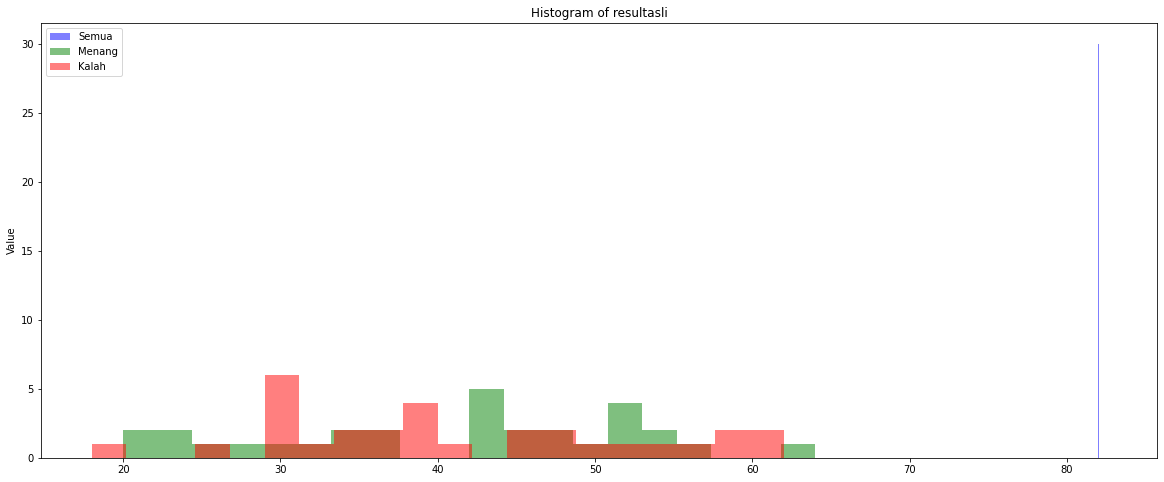

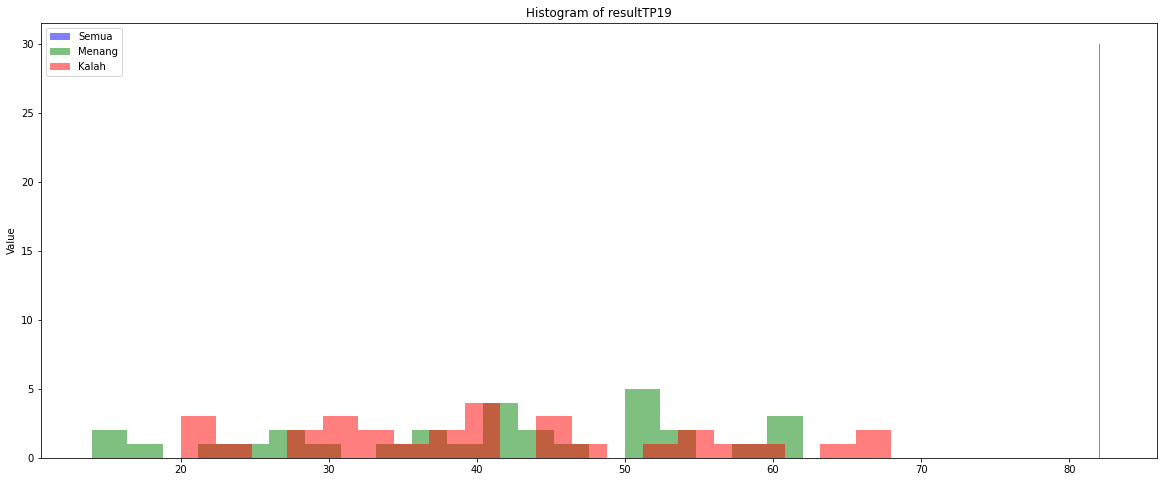

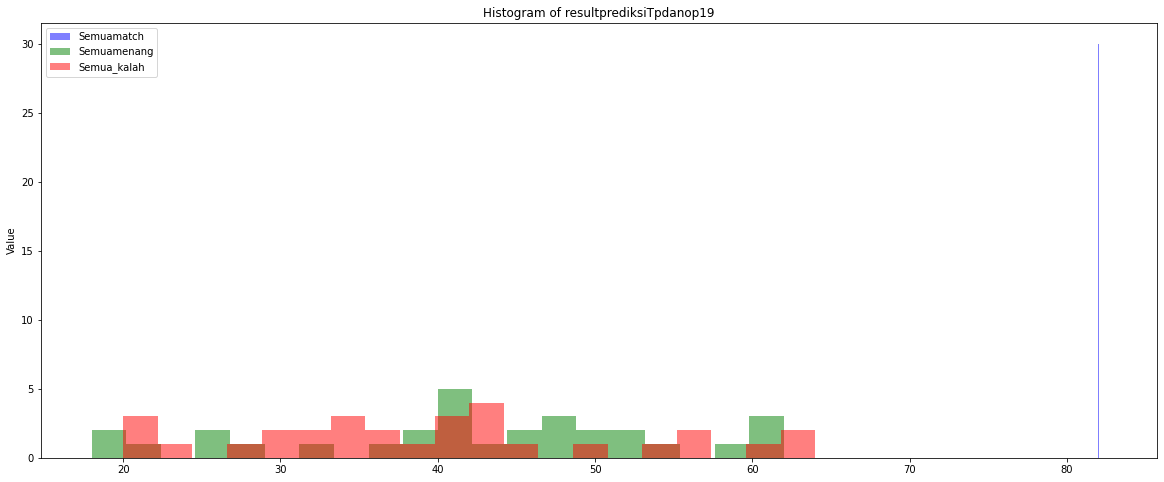

In [ ]:
import matplotlib.pyplot as plt

# Extract columns from df1
resultasli_Semua = resultasli['Semua']
resultasli_win = resultasli['Menang']
resultasli_lose = resultasli['Kalah']
resultasli_tim = resultasli['Team']

# Extract columns from df2
resultTP19_Semua = resultTP19['Semua']
resultTP19_semuawin = resultTP19['Menang']
resultTP19_semualose = resultTP19['Kalah']
resultTP19_timjumlah = resultTP19['Team']

# Extract columns from df3
resultprediksiTpdanop19_Semua = resultprediksiTpdanop19['Semuamatch']
resultprediksiTpdanop19_allwin = resultprediksiTpdanop19['Semuamenang']
resultprediksiTpdanop19_alllose = resultprediksiTpdanop19['Semua_kalah']
resultprediksiTpdanop19_tim = resultprediksiTpdanop19['Team']

# Plot histogram for resultasli dataframe
plt.hist(resultasli_Semua, bins=20, color='blue', alpha=0.5)
plt.hist(resultasli_win, bins=20, color='green', alpha=0.5)
plt.hist(resultasli_lose, bins=20, color='red', alpha=0.5)
plt.title("Histogram of resultasli")
plt.ylabel("Value")
plt.legend(["Semua", "Menang", "Kalah"])
plt.show()

# Plot histogram for resultTP19 dataframe
plt.hist(resultTP19_Semua, bins=20, color='blue', alpha=0.5)
plt.hist(resultTP19_semuawin, bins=20, color='green', alpha=0.5)
plt.hist(resultTP19_semualose, bins=20, color='red', alpha=0.5)
plt.title("Histogram of resultTP19")

plt.ylabel("Value")
plt.legend(["Semua", "Menang", "Kalah"])
plt.show()

# Plot histogram for resultprediksiTpdanop19 dataframe
plt.hist(resultprediksiTpdanop19_Semua, bins=20, color='blue', alpha=0.5)
plt.hist(resultprediksiTpdanop19_allwin, bins=20, color='green', alpha=0.5)
plt.hist(resultprediksiTpdanop19_alllose, bins=20, color='red', alpha=0.5)
plt.title("Histogram of resultprediksiTpdanop19")

plt.ylabel("Value")
plt.legend(["Semuamatch", "Semuamenang", "Semua_kalah"])
plt.show()



In [ ]:
GrafikTp19

,Prediksi_Totalpoint,Prediksi_Opponentt,Totalpoint,Opponent,Team,Opponent teamn,Tanggalhome,Tanggalaway,nilai_asli,nilai_prediksi,persen_model,percentage Tim,percentage_Opponent
0,111.649218,109.092529,104,127,4,7,2021-10-19,2021-10-19,False,True,False,50.579113,49.420887
1,112.791915,113.234192,121,114,14,9,2021-10-19,2021-10-19,True,False,False,49.902162,50.097838
2,113.332350,113.710824,122,123,18,19,2021-10-20,2021-10-20,False,False,True,49.916651,50.083349
3,113.410142,105.202445,94,88,21,29,2021-10-20,2021-10-20,True,True,True,51.877224,48.122776
4,108.382228,110.111980,134,138,16,12,2021-10-20,2021-10-20,False,False,True,49.604165,50.395835
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1318,103.897308,114.355359,88,107,16,14,2022-06-05,2022-06-05,False,False,True,47.604141,52.395859
1319,106.400890,109.171498,100,116,14,16,2022-06-08,2022-06-08,False,False,True,49.357383,50.642617
1320,109.408029,104.161784,107,97,14,16,2022-06-10,2022-06-10,True,True,True,51.228227,48.771773
1321,101.651081,109.652591,94,104,16,14,2022-06-13,2022-06-13,False,False,True,48.106632,51.893368


# Prediksi pertim & pemain

In [ ]:
Ambil_data=top_5_rows_per_group1.drop(['Tanggal','Team','Home/Visitor'], axis=1)
Ambil_data

,Starters,Position,MP,FGA,3PA,FTA,ORB,DRB,STL,BLK,TOV,PF,Total Point,Opponent,Opponent Pts
3,Nic Claxton,C,1450.0,9,0,3,0,7,0,0,0,3,104,7,127
2,Kevin Durant,PF,1815.0,25,7,6,0,11,0,2,1,2,104,7,127
0,Joe Harris,SF,1846.0,9,5,0,0,2,0,0,2,1,104,7,127
5,Patty Mills,SG,1762.0,11,7,0,0,2,1,1,0,1,104,7,127
1,James Harden,PG,1838.0,16,8,4,3,5,1,2,4,3,104,7,127
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33786,Al Horford,C,2353.0,8,5,3,3,11,2,1,3,1,90,14,103
33788,Robert Williams,C,1957.0,8,0,2,5,2,0,5,2,2,90,14,103
33784,Jaylen Brown,SF,2640.0,23,11,6,1,6,1,0,5,2,90,14,103
33785,Jayson Tatum,SF,2413.0,18,4,0,0,3,3,1,5,3,90,14,103


In [ ]:
grouped_df = Ambil_data.groupby('Starters').mean()

teams = ['Tyrese Maxey', 'James Harden', 'Joel Embiid', 'Tobias Harris', 'P.J. Tucker']
teamkolom = "team"
HomeVisitor = "Home"

# Filter the grouped dataframe based on the values in column 'Starters'
teamkolom = input("Input team names: ")
HomeVisitor = input("Input play (Home/Visitor): ")
filtered_df = grouped_df.loc[teams]
filtered_df['Team'] = teamkolom
filtered_df['Home/Visitor'] = HomeVisitor

# Reset the index to make 'Starters' a column in the filtered dataframe
filtered_df = filtered_df.reset_index()

# Print the filtered dataframe
print(filtered_df)


Input team names: 8
Input play (Home/Visitor): 1
        Starters           MP        FGA       3PA        FTA       ORB  \
0   Tyrese Maxey  2171.209302  13.511628  4.348837   3.360465  0.372093   
1   James Harden  2258.311688  14.935065  6.805195   7.935065  0.857143   
2    Joel Embiid  2066.389610  19.220779  3.688312  11.480519  2.116883   
3  Tobias Harris  2138.024096  14.048193  3.915663   2.674699  1.000000   
4    P.J. Tucker  1901.000000   6.509434  2.943396   1.264151  1.735849   

        DRB       STL       BLK       TOV        PF  Total Point   Opponent  \
0  2.883721  0.744186  0.395349  1.244186  2.069767   108.511628  16.360465   
1  6.519481  1.181818  0.571429  4.337662  2.363636   112.038961  17.324675   
2  9.493506  1.038961  1.389610  3.168831  2.753247   110.181818  17.298701   
3  5.963855  0.722892  0.638554  1.578313  2.277108   110.000000  16.903614   
4  4.528302  0.981132  0.301887  1.000000  2.433962   108.245283  13.188679   

   Opponent Pts Team Home

In [ ]:
filtered_df.rename(columns={'HomeVisitor': 'Home/Visitor'}, inplace=True)
filtered_df

,Starters,MP,FGA,3PA,FTA,ORB,DRB,STL,BLK,TOV,PF,Total Point,Opponent,Opponent Pts,Team,Home/Visitor
0,Tyrese Maxey,2171.209302,13.511628,4.348837,3.360465,0.372093,2.883721,0.744186,0.395349,1.244186,2.069767,108.511628,16.360465,106.906977,8,1
1,James Harden,2258.311688,14.935065,6.805195,7.935065,0.857143,6.519481,1.181818,0.571429,4.337662,2.363636,112.038961,17.324675,109.519481,8,1
2,Joel Embiid,2066.389610,19.220779,3.688312,11.480519,2.116883,9.493506,1.038961,1.389610,3.168831,2.753247,110.181818,17.298701,106.194805,8,1
3,Tobias Harris,2138.024096,14.048193,3.915663,2.674699,1.000000,5.963855,0.722892,0.638554,1.578313,2.277108,110.000000,16.903614,107.542169,8,1
4,P.J. Tucker,1901.000000,6.509434,2.943396,1.264151,1.735849,4.528302,0.981132,0.301887,1.000000,2.433962,108.245283,13.188679,104.603774,8,1


In [ ]:
grouped_df = Ambil_data.groupby('Starters').mean()

teams = ['Jayson Tatum', 'Jaylen Brown', 'Marcus Smart', 'Derrick White', 'Al Horford']
teamkolom = "team"
HomeVisitor = "Home"
teamkolom = input("Input team names: ")
HomeVisitor = input("Input play (Home/Visitor): ")
# Filter the grouped dataframe based on the values in column 'Starters'
filtered_dfhome = grouped_df.loc[teams]
filtered_dfhome['Team'] = teamkolom
filtered_dfhome['Home/Visitor'] = HomeVisitor

# Reset the index to make 'Starters' a column in the filtered dataframe
filtered_dfhome = filtered_dfhome.reset_index()

# Print the filtered dataframe
print(filtered_dfhome)


Input team names: 6
Input play (Home/Visitor): 0
        Starters           MP        FGA       3PA       FTA       ORB  \
0   Jayson Tatum  2228.390000  20.360000  8.470000  6.390000  1.090000   
1   Jaylen Brown  2123.625000  18.431818  7.034091  5.056818  0.977273   
2   Marcus Smart  2038.837209  11.186047  5.534884  2.709302  0.697674   
3  Derrick White  1900.565217  11.405797  5.289855  3.231884  0.478261   
4     Al Horford  1956.863014   8.726027  4.232877  1.575342  1.616438   

        DRB       STL       BLK       TOV        PF  Total Point   Opponent  \
0  6.610000  1.040000  0.700000  3.170000  2.460000   110.400000  14.220000   
1  5.454545  1.090909  0.306818  2.818182  2.602273   110.318182  14.068182   
2  3.325581  1.651163  0.244186  2.290698  2.511628   110.348837  13.767442   
3  3.173913  1.028986  0.840580  1.681159  2.492754   112.159420  13.057971   
4  6.863014  0.863014  1.520548  1.068493  2.178082   109.506849  14.041096   

   Opponent Pts Team Home/Visit

In [ ]:
filtered_dfhome

,Starters,MP,FGA,3PA,FTA,ORB,DRB,STL,BLK,TOV,PF,Total Point,Opponent,Opponent Pts,Team,Home/Visitor
0,Jayson Tatum,2228.390000,20.360000,8.470000,6.390000,1.090000,6.610000,1.040000,0.700000,3.170000,2.460000,110.400000,14.220000,103.540000,6,0
1,Jaylen Brown,2123.625000,18.431818,7.034091,5.056818,0.977273,5.454545,1.090909,0.306818,2.818182,2.602273,110.318182,14.068182,103.375000,6,0
2,Marcus Smart,2038.837209,11.186047,5.534884,2.709302,0.697674,3.325581,1.651163,0.244186,2.290698,2.511628,110.348837,13.767442,104.651163,6,0
3,Derrick White,1900.565217,11.405797,5.289855,3.231884,0.478261,3.173913,1.028986,0.840580,1.681159,2.492754,112.159420,13.057971,107.811594,6,0
4,Al Horford,1956.863014,8.726027,4.232877,1.575342,1.616438,6.863014,0.863014,1.520548,1.068493,2.178082,109.506849,14.041096,103.068493,6,0


In [ ]:
Musimini= pd.concat([filtered_df, filtered_dfhome], axis=0)
Musimini = Musimini.reset_index(drop=True)
Musimini['Tanggal'] = '2022-10-22'

Musimini = Musimini.drop(['Total Point', 'Opponent','Opponent Pts'],axis=1)
Musimini

,Starters,MP,FGA,3PA,FTA,ORB,DRB,STL,BLK,TOV,PF,Team,Home/Visitor,Tanggal
0,Tyrese Maxey,2171.209302,13.511628,4.348837,3.360465,0.372093,2.883721,0.744186,0.395349,1.244186,2.069767,8,1,2022-10-22
1,James Harden,2258.311688,14.935065,6.805195,7.935065,0.857143,6.519481,1.181818,0.571429,4.337662,2.363636,8,1,2022-10-22
2,Joel Embiid,2066.389610,19.220779,3.688312,11.480519,2.116883,9.493506,1.038961,1.389610,3.168831,2.753247,8,1,2022-10-22
3,Tobias Harris,2138.024096,14.048193,3.915663,2.674699,1.000000,5.963855,0.722892,0.638554,1.578313,2.277108,8,1,2022-10-22
4,P.J. Tucker,1901.000000,6.509434,2.943396,1.264151,1.735849,4.528302,0.981132,0.301887,1.000000,2.433962,8,1,2022-10-22
5,Jayson Tatum,2228.390000,20.360000,8.470000,6.390000,1.090000,6.610000,1.040000,0.700000,3.170000,2.460000,6,0,2022-10-22
6,Jaylen Brown,2123.625000,18.431818,7.034091,5.056818,0.977273,5.454545,1.090909,0.306818,2.818182,2.602273,6,0,2022-10-22
7,Marcus Smart,2038.837209,11.186047,5.534884,2.709302,0.697674,3.325581,1.651163,0.244186,2.290698,2.511628,6,0,2022-10-22
8,Derrick White,1900.565217,11.405797,5.289855,3.231884,0.478261,3.173913,1.028986,0.840580,1.681159,2.492754,6,0,2022-10-22
9,Al Horford,1956.863014,8.726027,4.232877,1.575342,1.616438,6.863014,0.863014,1.520548,1.068493,2.178082,6,0,2022-10-22


In [ ]:
Musimini['Opponent'] = [6, 6, 6, 6, 6, 8, 8, 8, 8, 8]

Musimini


,Starters,MP,FGA,3PA,FTA,ORB,DRB,STL,BLK,TOV,PF,Team,Home/Visitor,Tanggal,Opponent
0,Tyrese Maxey,2171.209302,13.511628,4.348837,3.360465,0.372093,2.883721,0.744186,0.395349,1.244186,2.069767,8,1,2022-10-22,6
1,James Harden,2258.311688,14.935065,6.805195,7.935065,0.857143,6.519481,1.181818,0.571429,4.337662,2.363636,8,1,2022-10-22,6
2,Joel Embiid,2066.389610,19.220779,3.688312,11.480519,2.116883,9.493506,1.038961,1.389610,3.168831,2.753247,8,1,2022-10-22,6
3,Tobias Harris,2138.024096,14.048193,3.915663,2.674699,1.000000,5.963855,0.722892,0.638554,1.578313,2.277108,8,1,2022-10-22,6
4,P.J. Tucker,1901.000000,6.509434,2.943396,1.264151,1.735849,4.528302,0.981132,0.301887,1.000000,2.433962,8,1,2022-10-22,6
5,Jayson Tatum,2228.390000,20.360000,8.470000,6.390000,1.090000,6.610000,1.040000,0.700000,3.170000,2.460000,6,0,2022-10-22,8
6,Jaylen Brown,2123.625000,18.431818,7.034091,5.056818,0.977273,5.454545,1.090909,0.306818,2.818182,2.602273,6,0,2022-10-22,8
7,Marcus Smart,2038.837209,11.186047,5.534884,2.709302,0.697674,3.325581,1.651163,0.244186,2.290698,2.511628,6,0,2022-10-22,8
8,Derrick White,1900.565217,11.405797,5.289855,3.231884,0.478261,3.173913,1.028986,0.840580,1.681159,2.492754,6,0,2022-10-22,8
9,Al Horford,1956.863014,8.726027,4.232877,1.575342,1.616438,6.863014,0.863014,1.520548,1.068493,2.178082,6,0,2022-10-22,8


In [ ]:
def combine_rows(group):
    # Create a new row with the desired format
    row = {
        'Tanggal': group['Tanggal'].iloc[0],
        'Team': group['Team'].iloc[0],
        'Opponent': group['Opponent'].iloc[0],
    }
    
    # Iterate through the group and add player information to the row
    for i in range(group.shape[0]):
        row[f'Home/Visitor{i+1}'] = group.iloc[i]['Home/Visitor']
        row[f'Starters{i+1}'] = group.iloc[i]['Starters']
        row[f'MP{i+1}'] = group.iloc[i]['MP']
        row[f'FGA{i+1}'] = group.iloc[i]['FGA']
        row[f'3PA{i+1}'] = group.iloc[i]['3PA']
        row[f'FTA{i+1}'] = group.iloc[i]['FTA']
        row[f'ORB{i+1}'] = group.iloc[i]['ORB']
        row[f'DRB{i+1}'] = group.iloc[i]['DRB']
        row[f'STL{i+1}'] = group.iloc[i]['STL']
        row[f'BLK{i+1}'] = group.iloc[i]['BLK']
        row[f'TOV{i+1}'] = group.iloc[i]['TOV']
        row[f'PF{i+1}'] = group.iloc[i]['PF']
        row[f'TOV{i+1}'] = group.iloc[i]['TOV']
      
    
    return pd.DataFrame(row, index=[0])
resultcekprediksi = Musimini.groupby(['Tanggal', 'Team']).apply(combine_rows)

# Reset the index of the resulting DataFrame
resultcekprediksi = resultcekprediksi.reset_index(drop=True)
resultcekprediksi

,Tanggal,Team,Opponent,Home/Visitor1,Starters1,MP1,FGA1,3PA1,FTA1,ORB1,...,MP5,FGA5,3PA5,FTA5,ORB5,DRB5,STL5,BLK5,TOV5,PF5
0,2022-10-22,6,8,0,Jayson Tatum,2228.390000,20.360000,8.470000,6.390000,1.090000,...,1956.863014,8.726027,4.232877,1.575342,1.616438,6.863014,0.863014,1.520548,1.068493,2.178082
1,2022-10-22,8,6,1,Tyrese Maxey,2171.209302,13.511628,4.348837,3.360465,0.372093,...,1901.000000,6.509434,2.943396,1.264151,1.735849,4.528302,0.981132,0.301887,1.000000,2.433962


In [ ]:
resultcekprediksi=resultcekprediksi.drop(['Tanggal'],axis=1)
import re

# Use a regular expression to select only the columns that do not match the pattern "posisi_*" or "pemain_*"
columns_to_keep = resultcekprediksi.columns.to_list()
columns_to_drop = [col for col in columns_to_keep if re.match(r'Position\d+|Starters\d+', col)]
columns_to_keep = [col for col in columns_to_keep if col not in columns_to_drop]

resultcekprediksi = resultcekprediksi.drop(columns=columns_to_drop)
resultcekprediksi

,Team,Opponent,Home/Visitor1,MP1,FGA1,3PA1,FTA1,ORB1,DRB1,STL1,...,MP5,FGA5,3PA5,FTA5,ORB5,DRB5,STL5,BLK5,TOV5,PF5
0,6,8,0,2228.390000,20.360000,8.470000,6.390000,1.090000,6.610000,1.040000,...,1956.863014,8.726027,4.232877,1.575342,1.616438,6.863014,0.863014,1.520548,1.068493,2.178082
1,8,6,1,2171.209302,13.511628,4.348837,3.360465,0.372093,2.883721,0.744186,...,1901.000000,6.509434,2.943396,1.264151,1.735849,4.528302,0.981132,0.301887,1.000000,2.433962


In [ ]:
resultcekprediksi=resultcekprediksi.astype(int)

In [ ]:
columns = list(resultcekprediksi.columns)

for i, col_name in enumerate(columns):
  for j in range(i,len(columns)):
    new_col_name = f"{col_name}_{columns[j]}"
    resultcekprediksi[new_col_name] = resultcekprediksi[col_name] * resultcekprediksi[columns[j]]
resultcekprediksi

<ipython-input-206-49be511d4a5f>:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  resultcekprediksi[new_col_name] = resultcekprediksi[col_name] * resultcekprediksi[columns[j]]


,Team,Opponent,Home/Visitor1,MP1,FGA1,3PA1,FTA1,ORB1,DRB1,STL1,...,STL5_STL5,STL5_BLK5,STL5_TOV5,STL5_PF5,BLK5_BLK5,BLK5_TOV5,BLK5_PF5,TOV5_TOV5,TOV5_PF5,PF5_PF5
0,6,8,0,2228,20,8,6,1,6,1,...,0,0,0,0,1,1,2,1,2,4
1,8,6,1,2171,13,4,3,0,2,0,...,0,0,0,0,0,0,0,1,2,4


In [ ]:

prediksimenang = resultcekprediksi[resultcekprediksi.columns.intersection(testTP19.columns)]
prediksimenang

,Opponent,Team_TOV3,Opponent_Opponent,Opponent_MP1,Opponent_FGA1,Opponent_FTA1,Opponent_MP2,Opponent_FTA2,Opponent_FGA4,Opponent_3PA4,...,FTA2_FTA5,FTA2_DRB5,3PA3_FTA5,TOV3_TOV4,FGA4_FTA4,3PA4_FTA4,3PA4_FTA5,FTA4_FGA5,FTA4_FTA5,FTA4_DRB5
0,8,12,64,17824,160,48,16984,40,88,40,...,5,30,5,2,33,15,5,24,3,18
1,6,24,36,13026,78,18,13548,42,84,18,...,7,28,3,3,28,6,3,12,2,8


In [ ]:
y = modeltp19.predict(prediksimenang)

resultpemaintim = pd.DataFrame(columns=["home total", "away total"])
resultpemaintim["home total"] = y[::2]
resultpemaintim["away total"] = y[1::2]
resultpemaintim

,home total,away total
0,136.22526,134.619905


# test

{'predictionsTotalPoint': array([0., 0.])}

In [ ]:
from sklearn.model_selection import train_test_split
X = modelOP22
y = medelakhir["Opponent Pts"]
# Split the data into a training set (70%) and a test set (30%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create the linear regression model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on the test set
predictions = model.predict(X_test)

# Calculate the R2 score
r2 = r2_score(y_test, predictions)
print("R2 score: ", r2)
print(model.intercept_)
print(model.coef_)


R2 score:  0.2278085440995311
0.7368523810483336
[-1.02444284e-03 -9.82522304e-01 -3.45720934e-01 -3.87405959e-01
 -4.05160421e-01 -5.00333247e-01  7.84330132e-05  2.62620943e-03
 -5.08456413e-03  5.99173937e-03 -1.66158190e-05  6.65121254e-03
  3.94672371e-04  2.62620943e-03 -8.96673952e-03  1.56169444e-03
  3.24637289e-03  2.62620943e-03  1.72608232e-03  1.58266531e-03
 -1.23984197e-03  2.62620943e-03  4.93431334e-03 -7.02204544e-04
 -9.82883652e-03  4.06517488e-05  4.02512867e-03  4.31134773e-04
 -1.73669725e-03 -3.83544821e-03  6.26173099e-04  9.85666624e-04
  8.58107482e-04  6.51830099e-03  1.97818574e-01 -4.59205641e-02
  1.43385709e-01  6.51830099e-03  6.51830099e-03  6.51830099e-03
  6.31344826e-03  2.17100422e-01 -1.04251108e-01  4.88829486e-01
  2.58993070e-01 -1.20888532e-01  2.27401766e-01  2.79345234e-01
 -8.87588968e-03  4.19471892e-02  4.57732316e-01 -4.90094231e-02
  4.19962686e-02  1.39218553e-01  3.00930894e-01  4.46430452e-01
  7.58716141e-02  2.33814926e-01 -8.32094

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
X = modelOP22
y = medelakhir["Opponent Pts"]
# Create a PolynomialFeatures object with degree 2
poly = PolynomialFeatures(degree=2)

# Transform the feature matrix X to include polynomial features
X_poly = poly.fit_transform(X)

# Split the data into a training set (70%) and a test set (30%)
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=42)

# Create the linear regression model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on the test set
predictions = model.predict(X_test)

# Calculate the R2 score
r2 = r2_score(y_test, predictions)
print("R2 score: ", r2)
print(model.intercept_)
print(model.coef_)


R2 score:  -32.95265865080532
19137436.733837433
[-1.91374346e+07 -1.15654386e-01  2.38511330e+00 ...  9.11390059e+00
  3.83862332e+00  7.12039703e-01]


In [ ]:
x_values = medelakhir.values
y_values = medelakhir["Total Point"].values

degree=2

# PolynomialFeatures will create a new matrix consisting of all polynomial combinations 
# of the features with a degree less than or equal to the degree we just gave the model (2)
poly_model = PolynomialFeatures(degree=degree)

# transform out polynomial features
poly_x_values = poly_model.fit_transform(x_values)

# should be in the form [1, a, b, a^2, ab, b^2]
print(f'initial values {x_values[0]}\nMapped to {poly_x_values[0]}')
print
# [1, a=5, b=2940, a^2=25, 5*2940=14700, b^2=8643600]

initial values [4.         0.34939759 7.         0.62650602 1.         0.38263359
 0.24324324 0.         0.11111111 0.         0.33333333 0.
 0.         0.         0.         0.5        1.         0.53698225
 0.78125    0.38888889 0.26086957 0.         0.55       0.26666667
 0.         0.33333333 0.11111111 0.33333333 1.         0.55120932
 0.25       0.29411765 0.         0.         0.11764706 0.16666667
 0.         0.         0.22222222 0.16666667 1.         0.31225469
 0.28571429 0.38888889 0.         0.         0.14285714 0.11764706
 0.14285714 0.25       0.         0.16666667 1.         0.53171896
 0.44117647 0.4        0.16       0.375      0.3125     0.42105263
 0.14285714 0.5        0.4        0.5       ]
Mapped to [1.         4.         0.34939759 ... 0.16       0.2        0.25      ]


<function print>

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
# let's fit the model
poly_model.fit(poly_x_values, y_values)

# we use linear regression as a base!!! ** sometimes misunderstood **
regression_model = LinearRegression()

regression_model.fit(poly_x_values, y_values)

y_pred = regression_model.predict(poly_x_values)

regression_model.coef_

mean_squared_error(y_values, y_pred, squared=False)
print(regression_model.coef_)

[-5.23124962e-03  2.76507875e-14  1.00000000e+00 ... -6.91080927e-13
 -1.32750148e-13  2.85369493e-13]


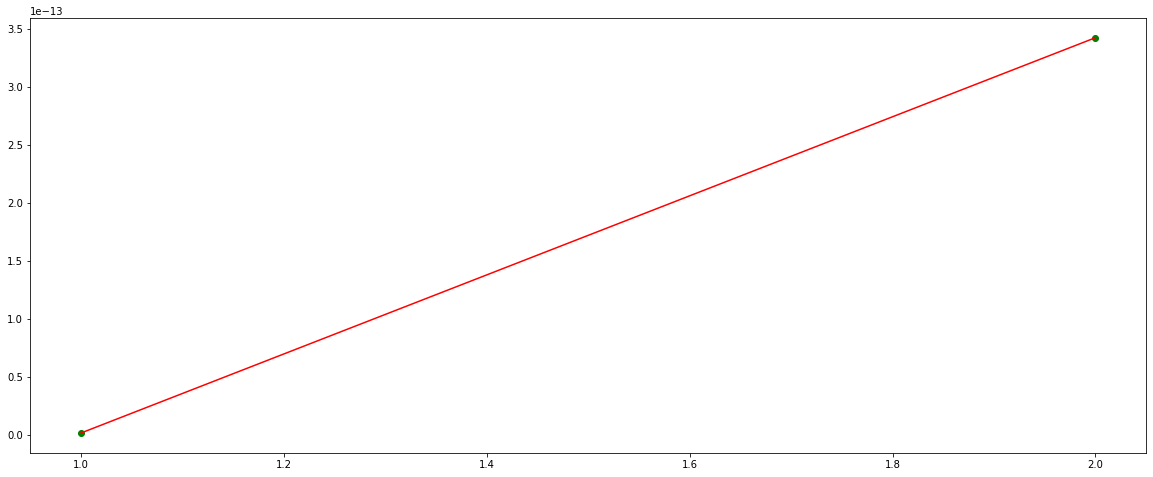

In [ ]:
# check our accuracy for each degree, the lower the error the better!
number_degrees = [1,2]
plt_mean_squared_error = []
for degree in number_degrees:

   poly_model = PolynomialFeatures(degree=degree)
  
   poly_x_values = poly_model.fit_transform(x_values)
   poly_model.fit(poly_x_values, y_values)
  
   regression_model = LinearRegression()
   regression_model.fit(poly_x_values, y_values)
   y_pred = regression_model.predict(poly_x_values)
  
   plt_mean_squared_error.append(mean_squared_error(y_values, y_pred, squared=False))
  
plt.scatter(number_degrees,plt_mean_squared_error, color="green")
plt.plot(number_degrees,plt_mean_squared_error, color="red") 

Coba **Test yang Sudah Mulit**

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import train_test_split

# Data
x = modelTP22
y = medelakhir["Opponent Pts"]

# Create polynomial features
poly = PolynomialFeatures(degree=2, include_bias=False)
x_poly = poly.fit_transform(x)

# Split the data into training and test sets
x_train, x_test, y_train, y_test = train_test_split(x_poly, y, test_size=0.2)

# Fit the polynomial of 2nd order model
model = LinearRegression()
model.fit(x_train, y_train)

# Predict the value for new x
y_pred = model.predict(x_test)

# Calculate and print error
error = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mean = y_pred.mean()
std = y_pred.std()
mae = mean_absolute_error(y_test, y_pred)

print("Mean Squared Error :", error)
print("R2 score :", r2)
print("mean :", mean)
print("std :", std)
print("Mean Absolute Error :", mae)


In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import train_test_split

# Data
x = modelTP22
y = medelakhir["Opponent Pts"]

# Create polynomial features
poly = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)
x_poly = poly.fit_transform(x)

# Split the data into training and test sets
x_train, x_test, y_train, y_test = train_test_split(x_poly, y, test_size=0.2)

# Fit the multivariate polynomial of 2nd order model
model = LinearRegression()
model.fit(x_train, y_train)

# Predict the value for new x
y_pred = model.predict(x_test)

# Calculate and print error
error = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mean = y_pred.mean()
std = y_pred.std()
mae = mean_absolute_error(y_test, y_pred)

print("Mean Squared Error :", error)
print("R2 score :", r2)
print("mean :", mean)
print("std :", std)
print("Mean Absolute Error :", mae)


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Load data
X = modeltestasli.drop(["Total Point","Opponent Pts"], axis=1)
Y = modeltestasli["Total Point"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Loop through different polynomial orders
for i in range(1, 3):
  # Create polynomial features
  poly = PolynomialFeatures(degree=i)
  X_train_poly = poly.fit_transform(X_train)
  X_test_poly = poly.fit_transform(X_test)

  # Fit and predict using linear regression
  model = LinearRegression()
  model.fit(X_train_poly, y_train)
  y_pred = model.predict(X_test_poly)
  
  # Calculate and print error
  error = mean_squared_error(y_test, y_pred)
  r2 = r2_score(y_test, y_pred)
  mean = y_pred.mean()
  std = y_pred.std()
  mae = mean_absolute_error(y_test, y_pred)
  print(f"Polynomial order {i}: MSE = {error:.8f}")
  print(f"Polynomial order R2 {i}: R2 = {r2:.8f}")
  print(f"Polynomial order mean {i}: mean = {mean:.8f}")
  print(f"Polynomial order std {i}: std = {std:.8f}")
  print(f"Polynomial order mae {i}: mae = {mae:.8f}")
  print(f"Polynomial order {i} coefficients: {model.coef_}")
  print(f"Polynomial order {i} intercept: {model.intercept_:.8f}")
  print("---------------------------")


In [ ]:
hasiltest = y,predictions


In [ ]:
import cupy as cp
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Create a PolynomialFeatures object with degree=2
poly = PolynomialFeatures(degree=2)

# Transform the input data
X_poly = poly.fit_transform(X)

# Convert the data to cupy arrays
X_poly_gpu = cp.asarray(X_poly)
y_gpu = cp.asarray(y)

# Create the linear regression model
model = LinearRegression()

# Fit the model to the polynomial features
model.fit(X_poly_gpu, y_gpu)

# Make predictions
predictions = model.predict(X_poly_gpu)

# Calculate the R2 score
r2 = r2_score(y, predictions.get())
print("R2 score: ", r2)


In [ ]:
predictions

In [ ]:
import numpy as np
import statsmodels.api as sm
# Create the 2nd order polynomial features
X2 = np.column_stack((X, X**2))

# Create a linear regression model
model = sm.OLS(y, X2)

# Fit the model to the data
results = model.fit()

# Print the summary
print(results.summary())

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Load data
X = modeltest
y = medelakhir["Total Point"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Loop through different polynomial orders
for i in range(1, 3):
  # Create polynomial features
  poly = PolynomialFeatures(degree=i)
  X_train_poly = poly.fit_transform(X_train)
  X_test_poly = poly.fit_transform(X_test)

  # Fit and predict using linear regression
  model = LinearRegression()
  model.fit(X_train_poly, y_train)
  y_pred = model.predict(X_test_poly)
  
  # Calculate and print error
  error = mean_squared_error(y_test, y_pred)
  r2 = r2_score(y_test, y_pred)
  mean = y_pred.mean()
  std = y_pred.std()
  mae = mean_absolute_error(y_test, y_pred)
  print(f"Polynomial order {i}: MSE = {error:.8f}")
  print(f"Polynomial order R2 {i}: R2 = {r2:.8f}")
  print(f"Polynomial order mean {i}: mean = {mean:.8f}")
  print(f"Polynomial order std {i}: std = {std:.8f}")
  print(f"Polynomial order mae {i}: mae = {mae:.8f}")
  print(f"Polynomial order {i} intercept: {model.intercept_:.8f}")
  print("---------------------------")


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Load data
X = medelakhir_low_corr.drop(["Total Point"], axis=1)
y = medelakhir_low_corr["Total Point"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Loop through different polynomial orders
for i in range(1, 5):
  # Create polynomial features
  poly = PolynomialFeatures(degree=i)
  X_train_poly = poly.fit_transform(X_train)
  X_test_poly = poly.fit_transform(X_test)

  # Fit and predict using linear regression
  model = LinearRegression()
  model.fit(X_train_poly, y_train)
  y_pred = model.predict(X_test_poly)
  
  # Calculate and print error
  error = mean_squared_error(y_test, y_pred)
  r2 = r2_score(y_test, y_pred)
  mean = y_pred.mean()
  std = y_pred.std()
  mae = mean_absolute_error(y_test, y_pred)
  print(f"Polynomial order {i}: MSE = {error:.8f}")
  print(f"Polynomial order R2 {i}: R2 = {r2:.8f}")
  print(f"Polynomial order mean {i}: mean = {mean:.8f}")
  print(f"Polynomial order std {i}: std = {std:.8f}")
  print(f"Polynomial order mae {i}: mae = {mae:.8f}")
  print(f"Polynomial order {i} intercept: {model.intercept_:.8f}")
  print("---------------------------")


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Load data
X = medelakhir_low_corrkecil
y = medelakhir_low_corr["Total Point"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Loop through different polynomial orders
for i in range(1, 3):
  # Create polynomial features
  poly = PolynomialFeatures(degree=i)
  X_train_poly = poly.fit_transform(X_train)
  X_test_poly = poly.fit_transform(X_test)

  # Fit and predict using linear regression
  model = LinearRegression()
  model.fit(X_train_poly, y_train)
  y_pred = model.predict(X_test_poly)
  
  # Calculate and print error
  error = mean_squared_error(y_test, y_pred)
  r2 = r2_score(y_test, y_pred)
  mean = y_pred.mean()
  std = y_pred.std()
  mae = mean_absolute_error(y_test, y_pred)
  print(f"Polynomial order {i}: MSE = {error:.8f}")
  print(f"Polynomial order R2 {i}: R2 = {r2:.8f}")
  print(f"Polynomial order mean {i}: mean = {mean:.8f}")
  print(f"Polynomial order std {i}: std = {std:.8f}")
  print(f"Polynomial order mae {i}: mae = {mae:.8f}")
  print(f"Polynomial order {i} intercept: {model.intercept_:.8f}")
  print("---------------------------")


In [ ]:
import numpy as np
from sklearn.linear_model import Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Load the data
X = medelakhir_low_corrkecil
Y = medelakhir_low_corr["Total Point"]

# Split the data into training and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Create the multivariate polynomial model
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

model = LinearRegression()
model.fit(X_train_poly, Y_train)

# Evaluate the model on the test set
Y_pred = model.predict(X_test_poly)
mse = mean_squared_error(Y_test, Y_pred)
mae = mean_absolute_error(Y_test, Y_pred)


# Calculate error for polynomial model
poly_error = mean_squared_error(Y_test, Y_pred)
poly_r2 = r2_score(Y_test, Y_pred)
poly_mae = mean_absolute_error(Y_test, Y_pred)


# Other models to compare
models = [('Lasso', Lasso()), ('Ridge', Ridge()), ('Decision Tree', DecisionTreeRegressor()), ('SVM', SVR()), ('Random Forest', RandomForestRegressor())]

# Loop through models and fit/predict
for name, model in models:
    model.fit(X, y)
    y_pred = model.predict(X)
    # Calculate error
    error = mean_squared_error(y, y_pred)
    r2 = r2_score(y, y_pred)
    mae = mean_absolute_error(y, y_pred)
    print(f"Model: {name}")
    print(f"MSE: {error:.8f}")
    print(f"R2: {r2:.8f}")
    print(f"MAE: {mae:.8f}")
    print("---------------------------")

# Compare the results of polynomial model to other models
print(f"Polynomial Model - MSE: {poly_error:.8f} R2: {poly_r2:.8f} MAE: {poly_mae:.8f}")


In [ ]:
for name, model in models:
    if name != 'Random Forest' and name != 'Decision Tree':
        model.fit(X, Y)
        y_pred = model.predict(X)
        # Calculate error
        error = mean_squared_error(Y, y_pred)
        r2 = r2_score(Y, y_pred)
        mae = mean_absolute_error(Y, y_pred)
        print(f"Model: {name}")
        print(f"MSE: {error:.8f}")
        print(f"R2: {r2:.8f}")
        print(f"MAE: {mae:.8f}")
        print(f"Intercept: {model.intercept_}")
        print("---------------------------")

In [ ]:
import numpy as np
from sklearn.linear_model import Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Load the data
X = medelakhir_low_corr.drop(["Total Point"], axis=1)
Y = medelakhir_low_corr["Total Point"]

# Split the data into training and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Create the multivariate polynomial model
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

model = LinearRegression()
model.fit(X_train_poly, Y_train)

# Evaluate the model on the test set
Y_pred = model.predict(X_test_poly)
mse = mean_squared_error(Y_test, Y_pred)
mae = mean_absolute_error(Y_test, Y_pred)


# Calculate error for polynomial model
poly_error = mean_squared_error(Y_test, Y_pred)
poly_r2 = r2_score(Y_test, Y_pred)
poly_mae = mean_absolute_error(Y_test, Y_pred)


# Other models to compare
models = [('Lasso', Lasso()), ('Ridge', Ridge()), ('Decision Tree', DecisionTreeRegressor()), ('SVM', SVR()), ('Random Forest', RandomForestRegressor())]

# Loop through models and fit/predict
for name, model in models:
    model.fit(X, y)
    y_pred = model.predict(X)
    # Calculate error
    error = mean_squared_error(y, y_pred)
    r2 = r2_score(y, y_pred)
    mae = mean_absolute_error(y, y_pred)
    print(f"Model: {name}")
    print(f"MSE: {error:.8f}")
    print(f"R2: {r2:.8f}")
    print(f"MAE: {mae:.8f}")
    print("---------------------------")

# Compare the results of polynomial model to other models
print(f"Polynomial Model - MSE: {poly_error:.8f} R2: {poly_r2:.8f} MAE: {poly_mae:.8f}")


In [ ]:
for name, model in models:
    if name != 'Random Forest' and name != 'Decision Tree':
        model.fit(X, Y)
        y_pred = model.predict(X)
        # Calculate error
        error = mean_squared_error(Y, y_pred)
        r2 = r2_score(Y, y_pred)
        mae = mean_absolute_error(Y, y_pred)
        print(f"Model: {name}")
        print(f"MSE: {error:.8f}")
        print(f"R2: {r2:.8f}")
        print(f"MAE: {mae:.8f}")
        print(f"Intercept: {model.intercept_}")
        print("---------------------------")


In [ ]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# select the columns to normalize
columns_to_normalize = ['Total Point','Opponent Pts', 'MP1', 'FGA1', '3PA1', 'FTA1', 'ORB1', 'DRB1', 'AST1', 'STL1', 'BLK1',
       'TOV1', 'PF1', 'Home/Visitor2', 'MP2', 'FGA2', '3PA2', 'FTA2', 'ORB2',
       'DRB2', 'AST2', 'STL2', 'BLK2', 'TOV2', 'PF2', 'Home/Visitor3', 'MP3',
       'FGA3', '3PA3', 'FTA3', 'ORB3', 'DRB3', 'AST3', 'STL3', 'BLK3', 'TOV3',
       'PF3', 'Home/Visitor4', 'MP4', 'FGA4', '3PA4', 'FTA4', 'ORB4', 'DRB4',
       'AST4', 'STL4', 'BLK4', 'TOV4', 'PF4', 'Home/Visitor5', 'MP5', 'FGA5',
       '3PA5', 'FTA5', 'ORB5', 'DRB5', 'AST5', 'STL5', 'BLK5', 'TOV5', 'PF5']

# create a MinMaxScaler object
scaler = MinMaxScaler()

# fit the scaler to the columns
scaler.fit(medelakhir[columns_to_normalize])

# normalize the columns
medelakhir[columns_to_normalize] = scaler.transform(medelakhir[columns_to_normalize])

In [ ]:
from sklearn.linear_model import Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Load data
X = medelakhir.drop(["Opponent Pts"], axis=1)
y = medelakhir["Opponent Pts"]

# Create polynomial features
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

# Fit and predict using linear regression
poly_model = LinearRegression()
poly_model.fit(X_poly, y)
poly_pred = poly_model.predict(X_poly)

# Calculate error for polynomial model
poly_error = mean_squared_error(y, poly_pred)
poly_r2 = r2_score(y, poly_pred)
poly_mae = mean_absolute_error(y, poly_pred)

# Other models to compare
models = [('Lasso', Lasso()), ('Ridge', Ridge()), ('Decision Tree', DecisionTreeRegressor()), ('SVM', SVR()), ('Random Forest', RandomForestRegressor())]

# Loop through models and fit/predict
for name, model in models:
    model.fit(X, y)
    y_pred = model.predict(X)
    # Calculate error
    error = mean_squared_error(y, y_pred)
    r2 = r2_score(y, y_pred)
    mae = mean_absolute_error(y, y_pred)
    print(f"Model: {name}")
    print(f"MSE: {error:.8f}")
    print(f"R2: {r2:.8f}")
    print(f"MAE: {mae:.8f}")
    print("---------------------------")

# Compare the results of polynomial model to other models
print(f"Polynomial Model - MSE: {poly_error:.8f} R2: {poly_r2:.8f} MAE: {poly_mae:.8f}")


In [ ]:
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Load the data
X = medelakhir.drop(["Total Point"], axis=1)
Y = medelakhir["Total Point"]

# Split the data into training and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Create the multivariate polynomial model
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

model = LinearRegression()
model.fit(X_train_poly, Y_train)

# Evaluate the model on the test set
Y_pred = model.predict(X_test_poly)
mse = mean_squared_error(Y_test, Y_pred)
mae = mean_absolute_error(Y_test, Y_pred)
print(f"MSE: {mse:.2f}")
print(f"MAE: {mae:.2f}")

# Compare the multivariate polynomial model to several other models
from sklearn.linear_model import Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor

models = [
    ('Lasso', Lasso()),
    ('Ridge', Ridge()),
    ('Decision Tree', DecisionTreeRegressor()),
    ('SVM', SVR()),
    ('Random Forest', RandomForestRegressor())
]

for name, model in models:
    model.fit(X_train, Y_train)
    Y_pred = model.predict(X_test)
    mse = mean_squared_error(Y_test, Y_pred)
    mae = mean_absolute_error(Y_test, Y_pred)
    print(f"{name}: MSE = {mse:.2f}, MAE = {mae:.2f}")


In [ ]:
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Load the data
X = medelakhir.drop(["Total Point"], axis=1)
Y = medelakhir["Total Point"]

# Split the data into training and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y)

# Create the multivariate polynomial model
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

model = LinearRegression()
model.fit(X_train_poly, Y_train)

# Evaluate the model on the test set
Y_pred = model.predict(X_test_poly)
mse = mean_squared_error(Y_test, Y_pred)
mae = mean_absolute_error(Y_test, Y_pred)
print(f"MSE: {mse:.2f}")
print(f"MAE: {mae:.2f}")

# Compare the multivariate polynomial model to several other models
from sklearn.linear_model import Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor

models = [
    ('Lasso', Lasso()),
    ('Ridge', Ridge()),
    ('Decision Tree', DecisionTreeRegressor()),
    ('SVM', SVR()),
    ('Random Forest', RandomForestRegressor())
]

for name, model in models:
    model.fit(X_train, Y_train)
    Y_pred = model.predict(X_test)
    mse = mean_squared_error(Y_test, Y_pred)
    mae = mean_absolute_error(Y_test, Y_pred)
    print(f"{name}: MSE = {mse:.2f}, MAE = {mae:.2f}")


In [ ]:
import pandas as pd
from scipy.stats import pearsonr



# define your target variable
y = medelakhir["Total Point"]

# create an empty list to store the selected features
selected_features = []

# iterate over all columns in the data
for col in medelakhir.columns:
    # calculate the Pearson correlation between the column and the target variable
    corr, _ = pearsonr(medelakhir[col], y)
    # if the correlation is above a threshold, add the column to the list of selected features
    if abs(corr) > 0.028039:
        selected_features.append(col)

# print the selected features
print(selected_features)


In [ ]:
cordata.mean()

In [ ]:
import numpy as np
import pandas as pd
import scipy.stats as stats

# Generate some random data


# Function to collapse a variable into a binary form
def collapse_variable(df, variable, threshold):
    df[variable + '_collapsed'] = np.where(df[variable] > threshold, 1, 0)
    return df

# Collapse variables A and B with threshold of 3
cordata = collapse_variable(cordata, 'Total Point', -0.028039)
cordata = collapse_variable(cordata, 'Opponent Pts', -0.024796)


# Calculate the correlation coefficients between original and collapsed variables
corr_coefs = []
for variable in ['Total Point', 'Opponent Pts']:
    corr_coefs.append(stats.pearsonr(cordata[variable], cordata[variable + '_collapsed'])[0])

# Print the correlation coefficients
print(corr_coefs)


In [ ]:
import matplotlib.pyplot as plt

# Plot the histogram of the correlation coefficients
plt.hist(corr_coefs, bins=20)
plt.xlabel('Correlation Coefficient')
plt.ylabel('Frequency')
plt.title('Histogram of Correlation Coefficients')
plt.show()


# Hapus baris yang kolom mp = 0

In [ ]:
filter2=data_modul['MP']== 0
data_modul=data_modul.drop(index=data_modul[filter2].index)
data_modul.reset_index(drop=True, inplace=True)
data_modul

In [ ]:
filter3=data_modul['MP']<1440
data_modul=data_modul.drop(index=data_modul[filter3].index)
data_modul.reset_index(drop=True, inplace=True)
data_modul

In [ ]:
data_modul['Position'].unique()

In [ ]:
data_modul['Team'] = pd.to_numeric(data_modul['Team'])

# Dibuat Tiap Dataframe Posisi

In [ ]:
data_modul_data_Sf =['SF']
data_sf = data_modul[data_modul.Position.isin(data_modul_data_Sf)]
data_sf.reset_index(drop=True, inplace=True)

data_modul_data_PG =['PG']
data_pg = data_modul[data_modul.Position.isin(data_modul_data_PG)]
data_pg.reset_index(drop=True, inplace=True)

data_modul_data_PF =['PF']
data_pf = data_modul[data_modul.Position.isin(data_modul_data_PF)]
data_pf.reset_index(drop=True, inplace=True)

data_modul_data_C =['C']
data_c = data_modul[data_modul.Position.isin(data_modul_data_C)]
data_c.reset_index(drop=True, inplace=True)

data_modul_data_SG =['SG']
data_sg = data_modul[data_modul.Position.isin(data_modul_data_SG)]
data_sg.reset_index(drop=True, inplace=True)


In [ ]:
data_sf

In [ ]:
data_pg

In [ ]:
data_pf

In [ ]:
data_c

In [ ]:
data_sg

In [ ]:
data_sg.corr()


In [ ]:
data_sg.info()

In [ ]:
corr1 = data_sg.corr()
corr1 = corr1.drop(['Home/Visitor', 'MP', 'FGA', '3PA', 'FTA', 'ORB', 'DRB', 'AST', 'STL',
       'BLK', 'TOV', 'PF', 'Team','Opponent'], axis=1)
corr1 = corr1.drop(['Total Point','Opponent Pts'], axis=0)
##corr1 =

sns.heatmap(corr1, cmap='RdBu', vmin=-1, vmax=1, annot=True)

In [ ]:
corr1

In [ ]:
cor2 = data_pf.corr()
cor2 = cor2.drop(['Home/Visitor', 'MP', 'FGA', '3PA', 'FTA', 'ORB', 'DRB', 'AST', 'STL',
       'BLK', 'TOV', 'PF', 'Team','Opponent'], axis=1)
cor2 = cor2.drop(['Total Point','Opponent Pts'], axis=0)
sns.heatmap(cor2, cmap='RdBu', vmin=-1, vmax=1, annot=True)

In [ ]:
cor2

In [ ]:
cor3 = data_sf.corr()
cor3 = cor3.drop(['Home/Visitor', 'MP', 'FGA', '3PA', 'FTA', 'ORB', 'DRB', 'AST', 'STL',
       'BLK', 'TOV', 'PF', 'Team','Opponent'], axis=1)
cor3 = cor3.drop(['Total Point','Opponent Pts'], axis=0)
sns.heatmap(cor3, cmap='RdBu', vmin=-1, vmax=1, annot=True)

In [ ]:
cor3

In [ ]:
cor4 = data_c.corr()
cor4 = cor4.drop(['Home/Visitor', 'MP', 'FGA', '3PA', 'FTA', 'ORB', 'DRB', 'AST', 'STL',
       'BLK', 'TOV', 'PF', 'Team','Opponent'], axis=1)
cor4 = cor4.drop(['Total Point','Opponent Pts'], axis=0)
sns.heatmap(cor4, cmap='RdBu', vmin=-1, vmax=1, annot=True)

In [ ]:
cor4

In [ ]:
cor5 = data_pg.corr()

cor5 = cor5.drop(['Home/Visitor', 'MP', 'FGA', '3PA', 'FTA', 'ORB', 'DRB', 'AST', 'STL',
       'BLK', 'TOV', 'PF', 'Team','Opponent'], axis=1)
cor5 = cor5.drop(['Total Point','Opponent Pts'], axis=0)
sns.heatmap(cor5, cmap='RdBu', vmin=-1, vmax=1, annot=True)

In [ ]:
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [ ]:
data_sg.corr()

In [ ]:
corr_features = correlation(data_sg, 0.7)


len(set(corr_features))


In [ ]:
corr_features1 = correlation(data_pg, 0.7)
len(set(corr_features1))

In [ ]:
corr_features

In [ ]:
corr_features1

In [ ]:
data_sg.iloc[:, 8].values 

In [ ]:
data_sg

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_regression

# Assume that X is a matrix of features and y is the target variable
X = data_sf.drop(["Total Point","Starters","Position"], axis=1)
y = data_sf["Total Point"]

# Use SelectKBest to select the top 10 features based on their mutual information with the target variable
selector = SelectKBest(mutual_info_regression, k=10)
X_selected = selector.fit_transform(X, y)

# Use the pandas library to compute the Pearson correlation coefficient between each feature and the target variable
import pandas as pd
df = pd.DataFrame(X)
df['Total Point'] = y
correlations = df.corr()['Total Point'].sort_values(ascending=False)

# Print the top 10 most correlated features
print(correlations[:10])


In [ ]:
y

In [ ]:
X

In [ ]:
y

In [ ]:
import numpy as np
import pandas as pd


X = data_sf.drop(["Total Point","Starters","Position"], axis=1)
y = data_sf["Total Point"]

# Use the pandas library to compute the Pearson correlation coefficient between each feature and the target variable
df = pd.DataFrame(X)
df['Total Point'] = y
correlations = df.corr()['Total Point'].sort_values(ascending=False)

# Select the top 3 features based on their correlation with the target variable
selected_features = correlations[:3].index
X_selected = df[selected_features].values

# Print the shape of the selected features
print(X_selected.shape)  # Output: (100, 3)

In [ ]:
X_selected